# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 Customer segmentation involves dividing a customer dataset into groups based on common characteristics to better understand customer behavior and improve marketing strategies. It aims to optimize the return on investment by tailoring marketing efforts to different customer groups, enhancing efficiency in resource utilization. Research shows segmented campaigns significantly boost email engagement and overall revenue. In marketing analytics, customer segmentation plays a crucial role in optimizing ROI by analyzing customer engagement metrics, campaign conversion rates, and various marketing channels to create effective customer segments.

### **The objective:**

Using Unsupervised Learning ideas such as Dimensionality Reduction and Clustering, the objective is to come up with the best possible customer segments using the given customer dataset.

### **The key questions:**

**Data Understanding and Preparation:**

* What are the key features and attributes in the customer dataset?
* Are there any missing values or outliers in the dataset that need to be addressed?
* How can we preprocess the data to ensure it is suitable for clustering and dimensionality reduction?

**Dimensionality Reduction:**
* Which dimensionality reduction techniques (e.g., PCA, t-SNE) are most suitable for this dataset?
* How many dimensions should be reduced to for optimal clustering performance?
* What is the impact of dimensionality reduction on the interpretability of customer segments?

**Clustering:**
* Which clustering algorithms (e.g., K-Means, DBSCAN, Gaussian Mixture Models) should be used for creating customer segments?
* How can we determine the optimal number of clusters for the dataset?
* What metrics (e.g., silhouette score, Davies-Bouldin index) will be used to evaluate the quality of the clusters?

**Cluster Analysis:**
* What are the main characteristics and behaviors of each identified customer segment?
* How do the segments differ in terms of demographic, behavioral, and transactional features?
* What insights can be derived from the customer segments that can inform marketing strategies?

**Validation and Interpretation:**
* How can we validate the stability and robustness of the identified customer segments?
* What visualization techniques can be used to interpret and present the clustering results effectively?
* How do the identified segments align with business goals and marketing objectives?

**Implementation and Impact:**
* How can the customer segments be integrated into current marketing strategies and operations?
* What are the potential impacts of these segments on marketing campaigns, customer engagement, and ROI?
* How can the segments be monitored and updated over time to reflect changes in customer behavior?

### **The problem formulation**:
#####**What is it that we are trying to solve using data science?**

Using data science, we aim to solve the challenge of identifying and understanding distinct customer segments within the given dataset through unsupervised learning techniques such as dimensionality reduction and clustering. The primary objective is to categorize customers based on their common characteristics and behaviors to enhance marketing strategies, optimize resource allocation, improve customer engagement, and inform business decisions. By developing actionable customer segments, we seek to tailor marketing efforts, increase the effectiveness of targeted campaigns, and provide personalized experiences that drive higher customer satisfaction and loyalty, ultimately leading to better return on investment and overall business success.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [1]:
# Install necessary packages
!pip install scikit-learn-extra
!pip install yellowbrick

# Mount Google Drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

# Import libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries for data preprocessing and clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Import libraries for distance computation and hierarchical clustering
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.1 MB/s eta 0:00:00
Mounted at /content/gdrive


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

### **Load Data**

In [2]:
# Load the dataset into a DataFrame
file_path = "/content/gdrive/MyDrive/MIT Applied Data Science/Capstone Project/marketing_campaign+%284%29.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
df_head = df.head()

In [3]:
# Returns the last 5 rows of the dataframe
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

In [4]:
# Print the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (2240, 27)


In [5]:
# Returns a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Identify and display columns with no null values
no_null_columns = df.columns[df.isnull().sum() == 0].tolist()

print("Columns with no null values:")
for col in no_null_columns:
    print(col)

Columns with no null values:
ID
Year_Birth
Education
Marital_Status
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response


In [7]:
# Check for missing values in each column and display the results
missing_values = df.isnull().sum()

# Display only columns with missing values for clarity
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values in each column:")
    print(missing_values)

Missing values in each column:
Income    24
dtype: int64


In [8]:
# Check for duplicated values in each column and store the results in a dictionary
duplicate_counts = df.apply(lambda col: col.duplicated().sum())

# Filter and display only columns with duplicated values
duplicate_counts = duplicate_counts[duplicate_counts > 0]

if duplicate_counts.empty:
    print("No duplicated values found in any column.")
else:
    print("Duplicated values in each column:")
    for col, count in duplicate_counts.items():
        print(f'Column "{col}": {count} duplicated value(s)')

Duplicated values in each column:
Column "Year_Birth": 2181 duplicated value(s)
Column "Education": 2235 duplicated value(s)
Column "Marital_Status": 2232 duplicated value(s)
Column "Income": 265 duplicated value(s)
Column "Kidhome": 2237 duplicated value(s)
Column "Teenhome": 2237 duplicated value(s)
Column "Dt_Customer": 1577 duplicated value(s)
Column "Recency": 2140 duplicated value(s)
Column "MntWines": 1464 duplicated value(s)
Column "MntFruits": 2082 duplicated value(s)
Column "MntMeatProducts": 1682 duplicated value(s)
Column "MntFishProducts": 2058 duplicated value(s)
Column "MntSweetProducts": 2063 duplicated value(s)
Column "MntGoldProds": 2027 duplicated value(s)
Column "NumDealsPurchases": 2225 duplicated value(s)
Column "NumWebPurchases": 2225 duplicated value(s)
Column "NumCatalogPurchases": 2226 duplicated value(s)
Column "NumStorePurchases": 2226 duplicated value(s)
Column "NumWebVisitsMonth": 2224 duplicated value(s)
Column "AcceptedCmp3": 2238 duplicated value(s)
Col

#### **Data Cleansing**


*   The ID will not add value to our analysis, so it will be dropped.
*   Since only 24 rows out of 2,240 have missing Income values, they will dropped.



In [9]:
# Remove rows with missing 'Income' values and drop the 'ID' column in one step
df = df.dropna(subset=['Income']).drop(columns=['ID'])

# Verify changes
print(f"Shape of the dataset after cleaning: {df.shape}")

Shape of the dataset after cleaning: (2216, 26)


In [10]:
# Generates summary statistics from the dataframe 'df'
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2216.000000  ...          2216.000000        2216.000000   
mean          27.028881  ...             2.671029           5.800993   
std           41.072046  ...             2.926734           3.250785   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          262.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013087     0.009477     0.150271  
std        0.244950      0.113672     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

### **Observations and Insights from the Data overview**
#### **Dataset Overview**
*   Row Count: 2216
*   Column Count: 26

###**Demographics and Income:**
**Year of Birth (Year_Birth):**
* The average year of birth is 1968.82, suggesting that the majority of customers are likely to be in their 50s or 60s.
* The range of birth years is from 1893 to 1996, indicating a wide age span.

###**Income:**
* The average income is `$52,247.25`, with a significant standard deviation of `$25,173.08`, highlighting a broad range of income levels.
* The minimum income is `$1,730`, and the maximum is `$666,666`, suggesting a diverse customer base in terms of economic status.

###**Family and Household Information:**
**Number of Children at Home (Kidhome):**
* On average, households have 0.44 children, with most households having either no children or one child.

**Number of Teenagers at Home (Teenhome):**
* On average, households have 0.51 teenagers, similar to the number of children.

### **Customer Behavior:**
**Recency:**
* The average recency score is 49, with a range from 0 to 99. This metric indicates how recently a customer has made a purchase or interacted, with higher values reflecting less recent interactions.

**Expenditure on Products:**
* Wines: The average expenditure is `$305.09`, with a wide range up to `$1,493`.
* Fruits: The average expenditure is `$26.36`, with a maximum of `$199`.
* Meat Products: The average is `$166.99`, with a maximum of `$1,725`.
* Fish Products: The average is `$37.64`, with a maximum of `$259`.
* Sweet Products: The average is `$27.03`, with a maximum of `$262`.

###**Purchase and Campaign Interactions:**
**Number of Purchases:**
* Catalog Purchases: Average is 2.67, with a maximum of 28.
* Store Purchases: Average is 5.80, with a maximum of 13.
* Web Visits per Month: Average is 5.32, with a maximum of 20.

###**Campaign Acceptance:**
* AcceptedCmp1 to AcceptedCmp5: The average acceptance rate for each campaign is low (around 6-7%), with only a few customers accepting multiple campaigns.

**Complaints and Responses:**
**Complaint:**
* The average is very low (0.01), indicating that complaints are rare among customers.

**Response:**
* The average response rate to marketing campaigns is 0.15, suggesting that only a small proportion of customers respond positively to marketing efforts.

###**Overall Insights:**
* The dataset shows a diverse customer base in terms of age, income, and spending habits.
* Expenditures vary widely across different product categories, indicating potential areas for targeted marketing.
* Interaction with marketing campaigns and response rates are relatively low, which could suggest a need for refining campaign strategies or improving customer engagement.

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

### **1. What is the summary statistics of the data?**

In [11]:
# Generates summary statistics from the dataframe 'df'
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2216.000000  ...          2216.000000        2216.000000   
mean          27.028881  ...             2.671029           5.800993   
std           41.072046  ...             2.926734           3.250785   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          262.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013087     0.009477     0.150271  
std        0.244950      0.113672     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

### **Statistical Observations**
* The dataset captures a diverse range of customer incomes and ages, with significant variability in spending and engagement.
* With an average birth year of 1968, most customers are middle-aged, have few or no children at home, and make relatively frequent purchases.
* Campaign acceptance and response rates are less than 8% for any given campiagn. This suggests opportunities for improving marketing effectiveness.
* High variability in spending and campaign acceptance rates could indicate the presence of different customer segments with varying behaviors and preferences.

### **2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights**

In [12]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique value counts and value frequencies for each categorical column
for col in categorical_cols:
    unique_count = df[col].nunique()
    value_counts = df[col].value_counts()

    print(f'Column: {col}')
    print(f'Unique Values: {unique_count}')
    print('Value Counts:')
    print(value_counts)
    print('-' * 40)  # Separator for readability

Column: Education
Unique Values: 5
Value Counts:
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
----------------------------------------
Column: Marital_Status
Unique Values: 8
Value Counts:
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
----------------------------------------
Column: Dt_Customer
Unique Values: 662
Value Counts:
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: count, Length: 662, dtype: int64
----------------------------------------


### **Observations**


*   `Education` has 5 unique values: 'Graduation', 'PhD', 'Master', '2n Cycle', and 'Basic'.
*   '2nd Cycle' normally means a Masters degree and could be combined.
*   `Marital_Status` has 8 unique values: 'Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd', and 'YOLO'.
*   'Alone' values could be combined with 'Single' values. 'Absurd' and 'YOLO' values offer no insight and could be combined into N/A category.
*   `Dt_Customer` has the highst number of unique values: 663.
*   The highest number of registrations on a single day is 12 on 31-08-2012.




### **Combining Categories Based on Findings**

In [13]:
# Replace 'Alone' with 'Single' in 'Marital_Status'
df['Marital_Status'].replace('Alone', 'Single', inplace=True)

# Remove rows where 'Marital_Status' is 'Absurd' or 'YOLO'
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Replace '2n Cycle' with 'Master' in 'Education'
df['Education'].replace('2n Cycle', 'Master', inplace=True)

# Verify changes
print("Marital Status Value Counts:")
print(df['Marital_Status'].value_counts())
print("\nEducation Value Counts:")
print(df['Education'].value_counts())

Marital Status Value Counts:
Marital_Status
Married     857
Together    573
Single      474
Divorced    232
Widow        76
Name: count, dtype: int64

Education Value Counts:
Education
Graduation    1115
Master         564
PhD            479
Basic           54
Name: count, dtype: int64


### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


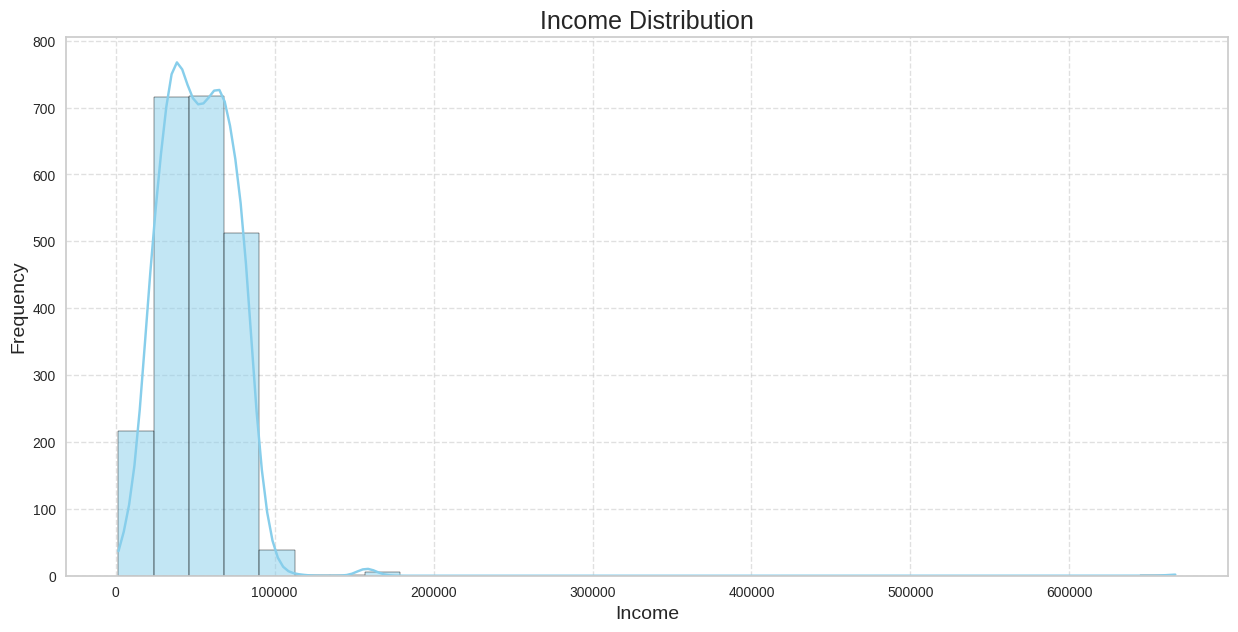

In [14]:
# Parameters for the histogram
income_column = 'Income'
bins = 30
kde = True
figsize = (15, 7)

# Create the histogram with optional KDE
plt.figure(figsize=figsize)
sns.histplot(x=income_column, data=df, bins=bins, kde=kde, color='skyblue', edgecolor='black')

# Customization for better readability
plt.title('Income Distribution', fontsize=18)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

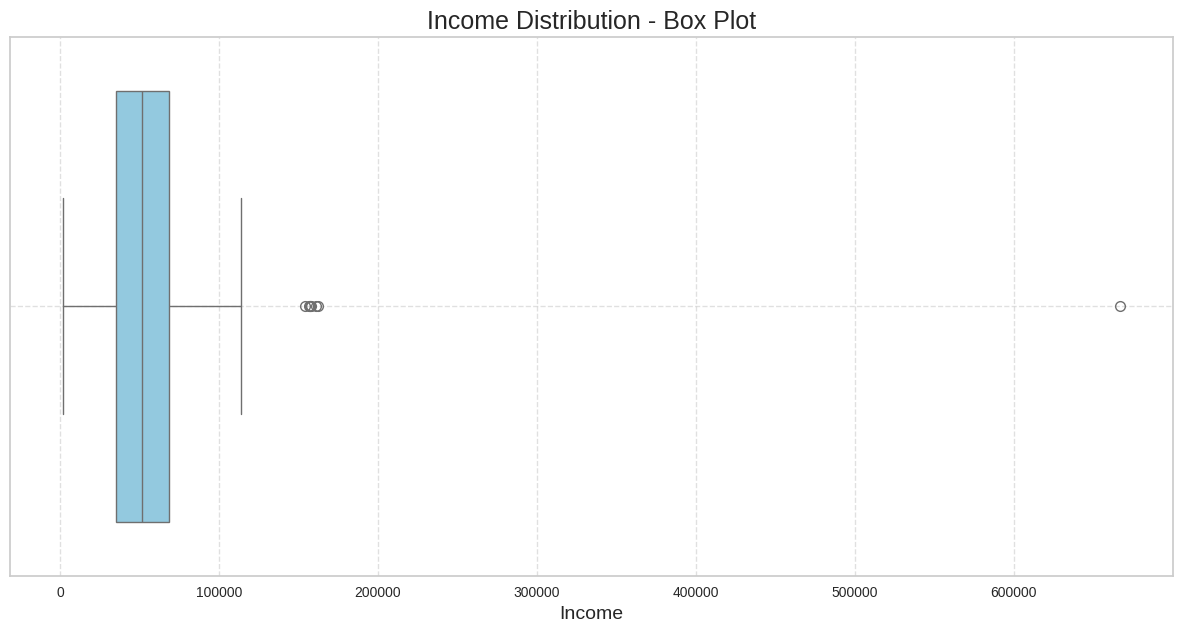

In [15]:
# Parameters for the box plot
income_column = 'Income'
figsize = (15, 7)
color = 'skyblue'
orient = 'h'  # 'h' for horizontal, 'v' for vertical

# Create the box plot
plt.figure(figsize=figsize)
sns.boxplot(
    x=income_column if orient == 'h' else None,
    y=None if orient == 'h' else income_column,
    data=df,
    color=color,
    orient=orient
)

# Customization for better readability
plt.title('Income Distribution - Box Plot', fontsize=18)
plt.xlabel('Income' if orient == 'h' else '', fontsize=14)
plt.ylabel('' if orient == 'h' else 'Income', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

###**1. How does the distribution of Income variable vary across the dataset?**
#####**Observations from the histogram and boxplot**
* The histogram shows that the income data is skewed to the right, meaning there are more people with lower incomes and a few people with very high incomes.
* The boxplot confirms the presence of outliers, represented by the individual points beyond the upper whisker.
* The majority of incomes fall within a certain range, but there are a few extreme values that significantly exceed the typical income levels.

#####**Additional Considerations**

* Determining whether to treat extreme values as outliers depends on the specific context and goals of the analysis.
* While removing outliers can result in losing valuable information, the number of observations beyond the upper whisker is less than 0.5% of the observations and there is no gurantee that the values are not erroneous.
* The percentile at which the upper whisker lies can be calculated to understand the threshold beyond which values are considered outliers.

###**2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?**
* The upper whisker lies at approximately the 99.52th percentile, signifying that only a very small percentage of customers have incomes exceeding this threshold. These outliers represent high-income earners who deviate significantly from the typical income distribution.
* For this reason, the oultiers lying outside of the of the upper whisker will be removed.

###**3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?**
* As mentioned above, the upper whisker lies at approximately the 99.52th percentile.
* For this reason, the extreme right values will be removed.

##**Distribution After Dropping Income Outliers**

In [16]:
# Calculate the Interquartile Range (IQR) for 'Income'
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper whisker threshold
upper_whisker = Q3 + 1.5 * IQR

# Drop rows where 'Income' exceeds the upper whisker
df = df[df['Income'] <= upper_whisker]

# Confirm the number of rows dropped
print(f'Number of rows after removing outliers: {df.shape[0]}')

Number of rows after removing outliers: 2204


##**Adjusted Numeric Histograms - No Income Outliers**

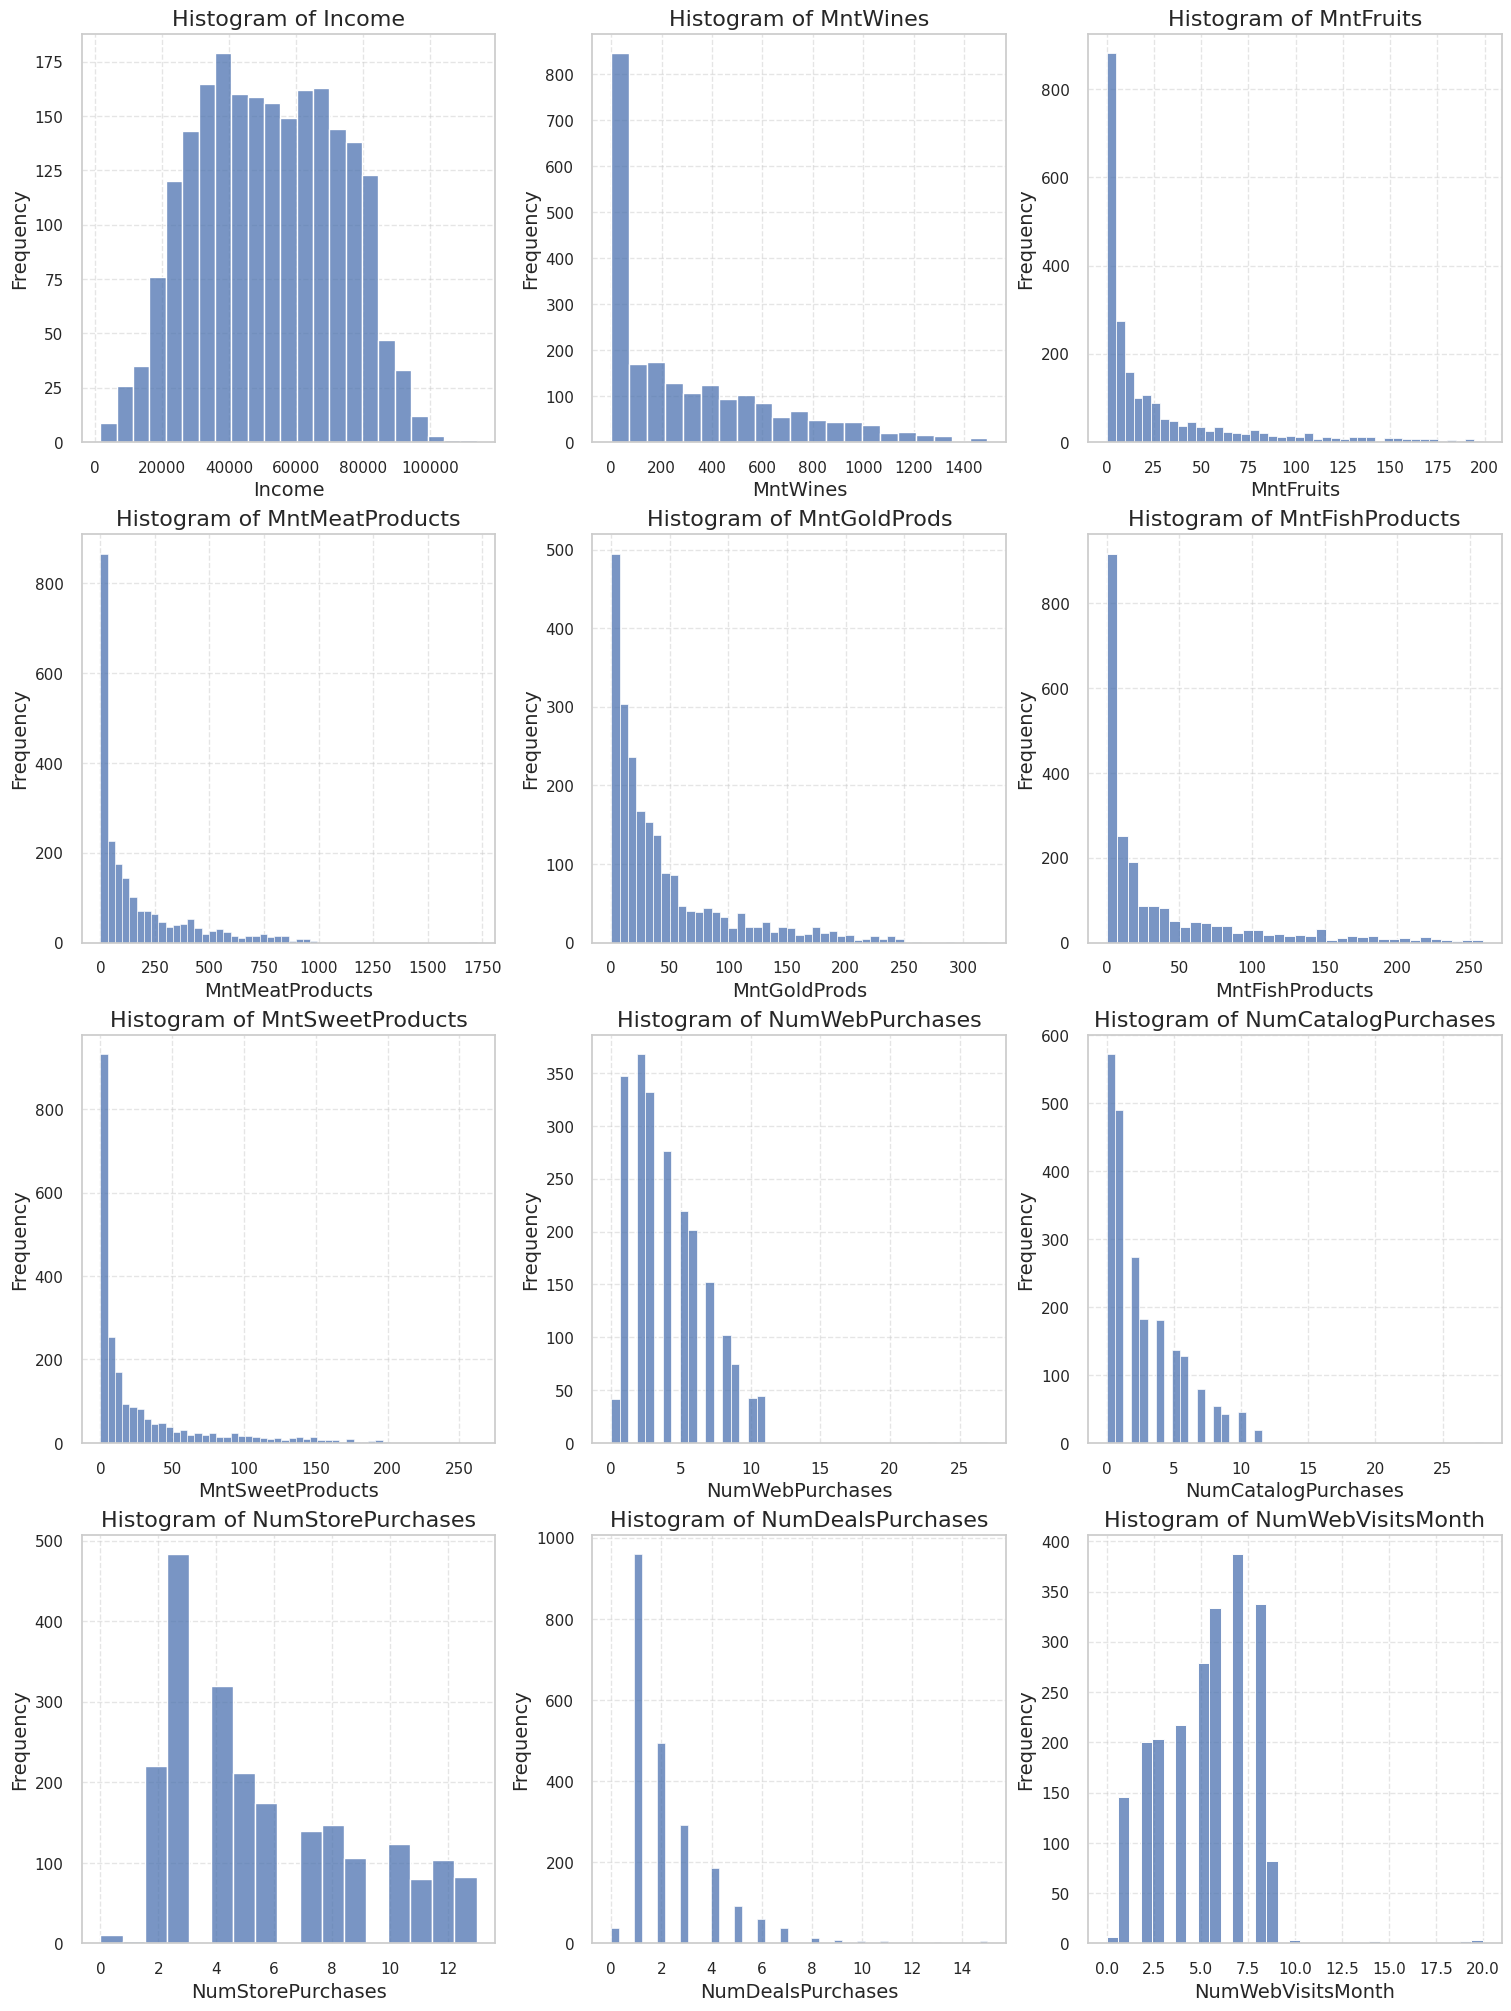

In [17]:
# Set the default style for better visualization
sns.set(style='whitegrid')

# List of columns to create histograms for
columns = [
    'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntGoldProds', 'MntFishProducts', 'MntSweetProducts',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumDealsPurchases', 'NumWebVisitsMonth'
]

# Calculate the number of rows and columns for subplots
n_columns = 3  # Number of columns for subplots
n_rows = (len(columns) + n_columns - 1) // n_columns  # Calculate number of rows

# Create subplots
fig, axs = plt.subplots(n_rows, n_columns, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each column and create a histogram
for ax, col in zip(axs, columns):
    sns.histplot(x=col, data=df, ax=ax)
    ax.set_title(f'Histogram of {col}', fontsize=16)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)

# Hide any unused subplots (if the number of columns is less than the number of subplot axes)
for ax in axs[len(columns):]:
    ax.axis('off')

plt.show()

##**Adjusted Categorical Histograms - No Income Outliers**

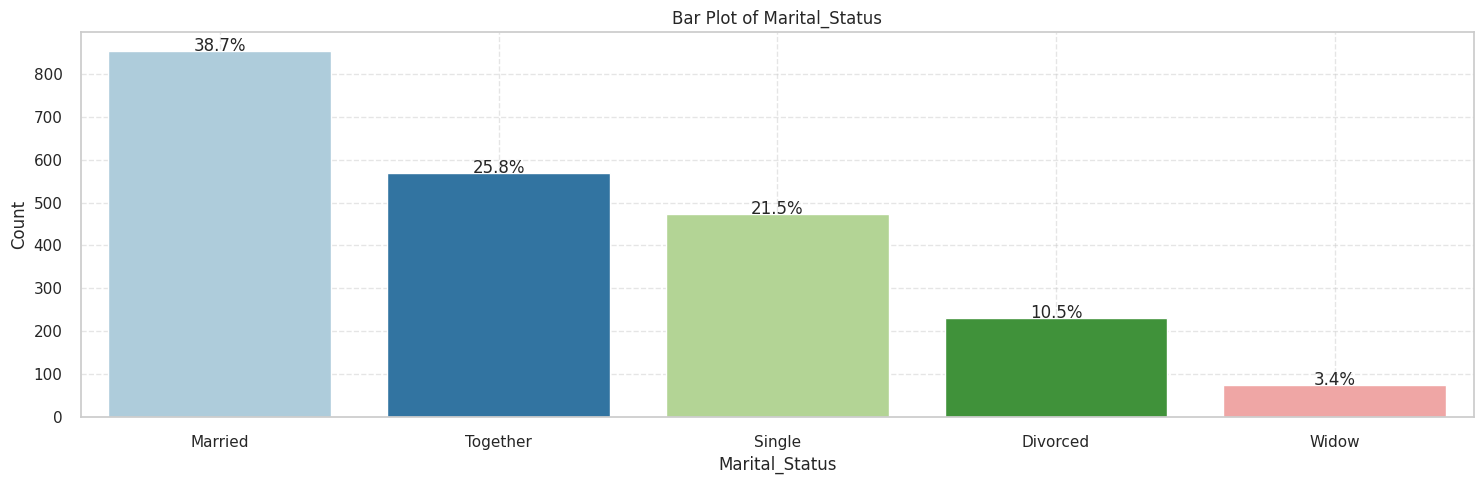

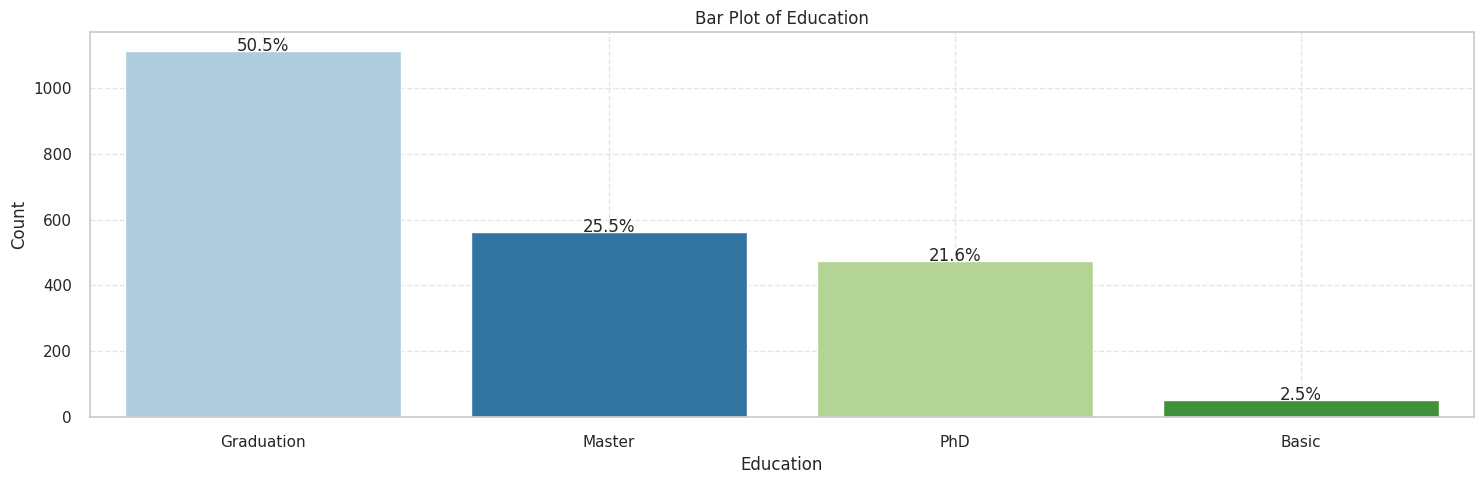

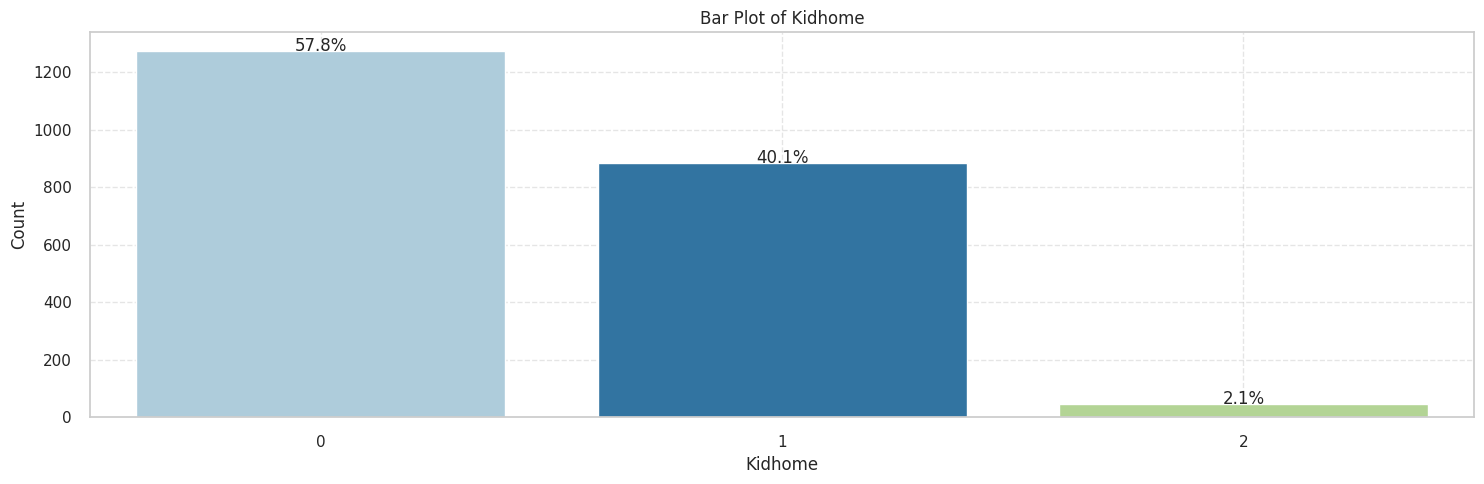

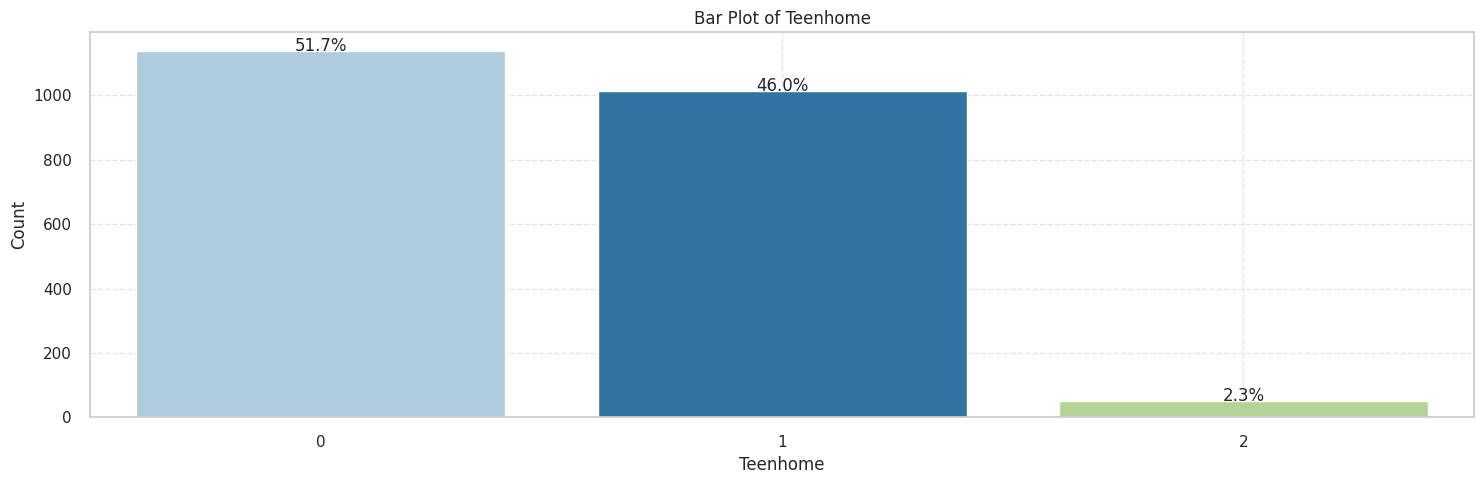

In [18]:
# List of categorical features to plot
categorical_features = ['Marital_Status', 'Education', 'Kidhome', 'Teenhome']

# Loop through each categorical feature
for feature in categorical_features:
    # Check if the column exists in the DataFrame
    if feature in df.columns:  # Check if the column exists
        total = len(df[feature])  # Total number of records
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=df[feature], palette='Paired', order=df[feature].value_counts().index)

        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calculate percentage
            x = p.get_x() + p.get_width() / 2  # X position for annotation
            y = p.get_y() + p.get_height()  # Y position for annotation

            ax.annotate(percentage, (x, y), size=12, ha='center')  # Annotate the percentage

        plt.title(f'Bar Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{feature}' not found in DataFrame.") # Print a message if the column is not found

###**Histogram Observations & Findings**
#####**Numerical Feature Histograms**
* **Income:** The distribution is right-skewed, with the majority of incomes falling within a lower to middle range. After removing outliers, the distribution appears more balanced.
* **MntWines:**  Right-skewed distribution, indicating most customers spend moderately on wines, with a few high spenders.
* **MntFruits:** Highly right-skewed, suggesting most customers purchase fruits infrequently or in small quantities.
* **MntMeatProducts:** Similar to MntWines, right-skewed with a concentration of moderate spenders and a tail of high-value purchases.
* **MntGoldProds:** Right-skewed, indicating most customers make occasional or smaller purchases of gold products.
* **MntFishProducts:**  Right-skewed, similar to MntFruits, suggesting infrequent or small purchases of fish products.
* **MntSweetProducts:**  Highly right-skewed, mirroring MntFruits, with most customers purchasing sweets infrequently.
* **NumWebPurchases:** Right-skewed, indicating a preference for in-store or catalog purchases over online purchases for most customers.
* **NumCatalogPurchases:** Right-skewed, suggesting most customers make few catalog purchases.
* **NumStorePurchases:**  Less skewed compared to other purchase types, with a broader range of store purchases across customers.
* **NumDealsPurchases:** Right-skewed, indicating most customers take advantage of deals occasionally.
* **NumWebVisitsMonth:** Right-skewed, suggesting most customers visit the website a few times per month, with a smaller group visiting more frequently.

#####**Numerical Feature Histograms**
**Marital_Status:**
* Married couples represent the largest segment (38.3%).
* Together (31.3%) and Single (21.6%) are also significant portions.
* Divorced and Widow categories are smaller.

**Education:**
* Graduation is the most common education level (50.4%).
* PhD (21.7%) and Master (21.6%) are also well-represented.
* Basic education is the least common (6.3%).

**Kidhome:**
* The majority of customers have no children at home (70.8%).
* Households with one child (20.4%) or two children (8.8%) are less common.

**Teenhome:**
* Most customers have no teenagers at home (59.4%).
* Households with one teenager (27.7%) are more common than those with two (12.9%).

#####**General Observations:**

* The data reveals variations in spending habits across different product categories.
* Customer engagement with the company varies across different channels (web, catalog, store).
* Demographics such as marital status, education level, and the presence of children influence customer behavior and preferences.
* The removal of income outliers provides a clearer picture of the typical customer profile.


### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

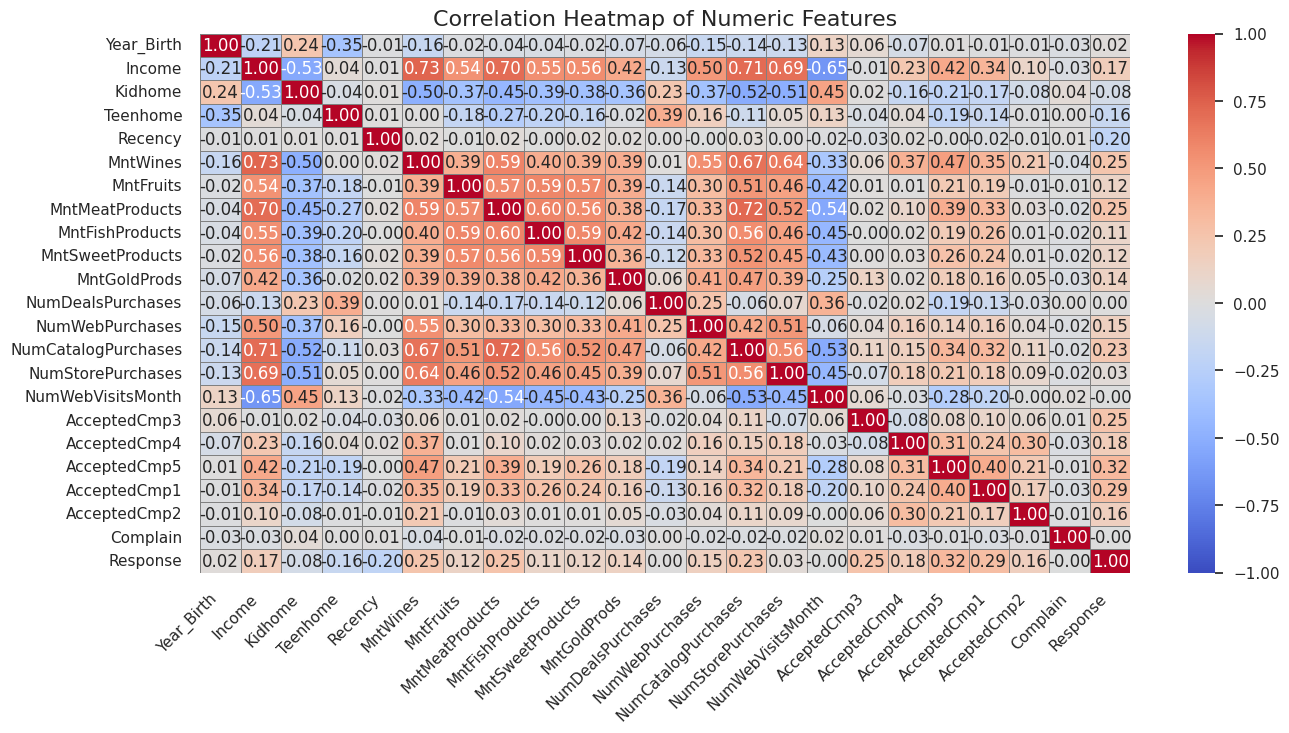

In [19]:
# Define plot size
plt.figure(figsize=(15, 7))

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",   # Use a more distinct color map for better readability
    vmin=-1,
    vmax=1,
    linewidths=0.5,    # Add lines between cells for better separation
    linecolor='gray'
)

# Add title and labels
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.xticks(rotation=45, ha='right')   # Rotate x labels for better readability
plt.yticks(rotation=0)                # Keep y labels horizontal
plt.show()

## **Observations and Insights from the Heatmap**

#### **Strong Positive Correlations:**
* `MntWines` shows strong positive correlations with `Income`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumCatalogPurchases`, `NumStorePurchases`, and total spending (`MntTotal`). This suggests that customers with higher incomes tend to spend more on various product categories, particularly wine.
* `NumCatalogPurchases` and `NumStorePurchases` also exhibit a strong positive correlation, indicating customers who purchase from the catalog are also likely to make in-store purchases.

#### **Moderate Positive Correlations:**
* `Income` has moderate positive correlations with most spending categories, suggesting a general trend of higher income leading to increased spending across products.
* `NumWebPurchases` shows a moderate positive correlation with `NumWebVisitsMonth`, indicating customers who visit the website more frequently are more likely to make online purchases..

#### **Negative Correlations:**
* `NumDealsPurchases` shows weak correlations with most other variables, suggesting deal purchases are not strongly influenced by income or other spending habits.
* `Complain` has minimal correlation with other variables, indicating complaints are not directly related to spending patterns or demographics.

#### **Insights:**
* **Customer Segmentation:** The correlations suggest the potential for segmenting customers based on income and purchasing behavior. For instance, high-income customers with fewer children could be targeted with premium products and catalogs, while customers with children might be more responsive to deals and promotions on family-oriented products.
* **Marketing Strategies:** Understanding the relationships between income, spending, and website visits can inform marketing strategies. For example, personalized email campaigns featuring premium products could be directed towards high-income customers, while deals and promotions could be emphasized for price-sensitive segments.
* **Product Recommendations:** The correlations among different product categories can be used to develop product recommendation systems. Customers who purchase wines might also be interested in meat products or gourmet foods, allowing for targeted cross-selling opportunities.


## **Education Vs Income**

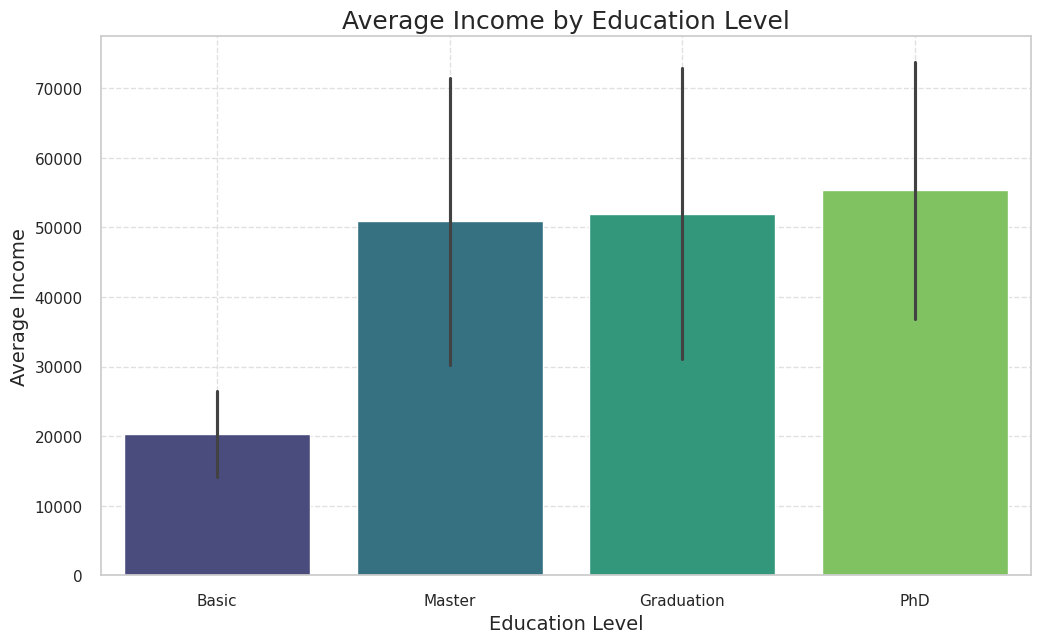

In [20]:
plt.figure(figsize=(12, 7))

# Order the bars by average income for better interpretation
order = df.groupby('Education')['Income'].mean().sort_values().index

# Create the bar plot with error bars representing the standard deviation
sns.barplot(x='Education', y='Income', data=df, order=order, palette='viridis', ci='sd')

# Customizing the plot for better readability
plt.title('Average Income by Education Level', fontsize=18)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Average Income', fontsize=14)
plt.xticks(rotation=45 if len(df['Education'].unique()) > 4 else 0)
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

#### **Observations on the bar plot of Income vs Education**
* Customers with a PhD tend to have the highest average income.
* Master's degree holders have the second-highest average income.
* Graduation level customers have a slightly lower average income compared to PhD and Master's.
* Basic education level customers have the lowest average income.
* There is a clear positive correlation between education level and income, indicating that higher education levels are generally associated with higher earning potential.

## **Marital Status Vs Income**



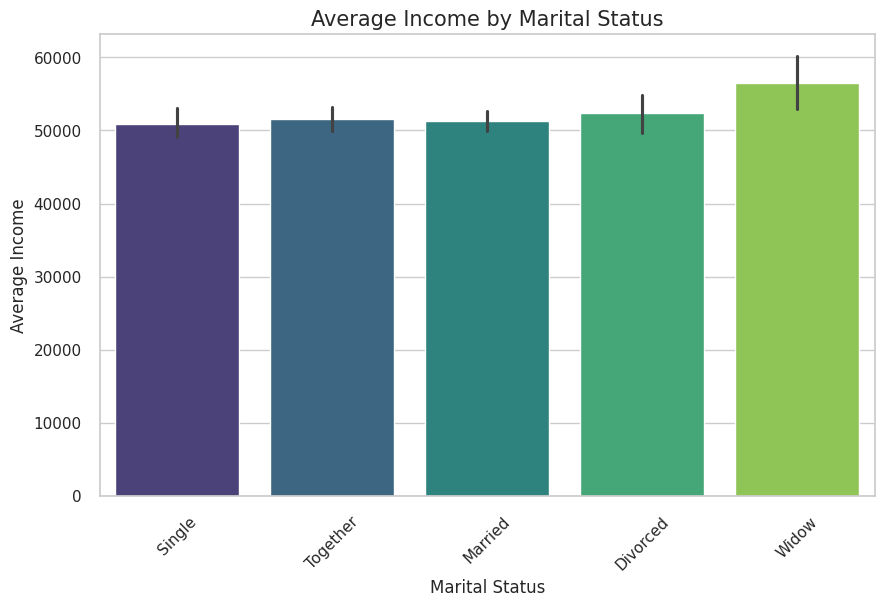

In [21]:
# Create a bar plot for Income vs Marital Status
plt.figure(figsize=(10, 6))  # Set the figure size
bar_plot = sns.barplot(x='Marital_Status', y='Income', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.title('Average Income by Marital Status', fontsize=15)

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()

#### **Observations on the bar plot of Income vs Marital Status**
* Single individuals tend to have the highest average income.
* Married individuals have the second-highest average income.
* Divorced individuals have a slightly lower average income compared to Married.
* Together individuals have the lowest average income.
* The differences in average income between marital statuses are relatively small.

## **Kidhome Vs Income**

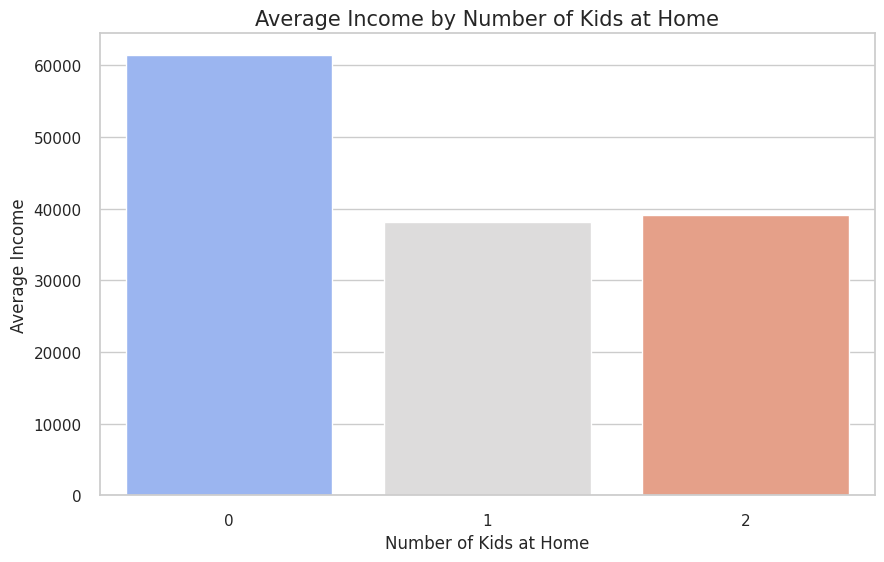

In [22]:
# Group by 'Kidhome' and calculate the mean income
income_by_kidhome = df.groupby('Kidhome')['Income'].mean().reset_index()

# Sort the data by average income in descending order
income_by_kidhome.sort_values(by='Income', ascending=False, inplace=True)

# Create a bar plot for Income vs Kidhome
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart with sorted data
sns.barplot(x='Kidhome', y='Income', data=income_by_kidhome, palette='coolwarm')

# Add labels and title
plt.xlabel('Number of Kids at Home', fontsize=12)
plt.ylabel('Average Income', fontsize=12)
plt.title('Average Income by Number of Kids at Home', fontsize=15)

# Ensure x-tick labels are readable
plt.xticks(rotation=0)

# Display the plot
plt.show()

#### **Observations on the bar plot of Income vs Kidhome**
* Customers with no kids at home have the highest average income.
* As the number of kids at home increases, the average income tends to decrease.
* There is a negative correlation between the number of kids at home and income, suggesting that households with more children generally have lower average incomes.

## **Marital_Status vs Kidhome**

<Figure size 1200x800 with 0 Axes>

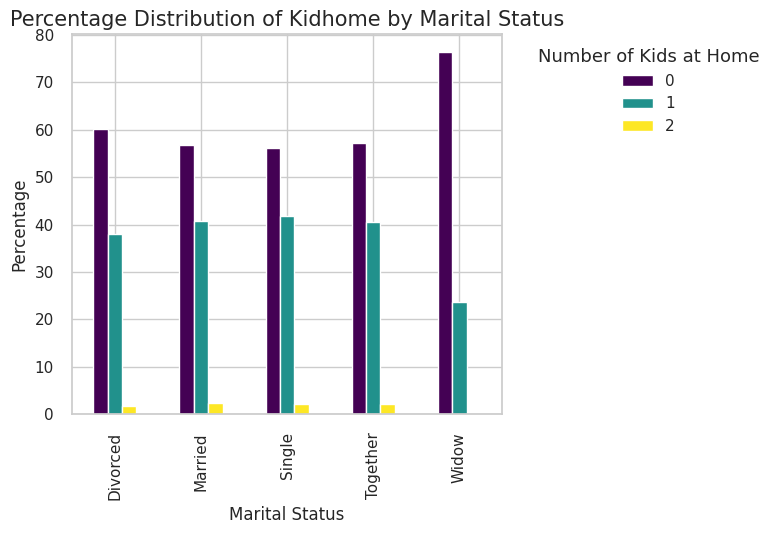

In [23]:
# Create a cross-tabulation of Marital_Status and Kidhome
table = pd.crosstab(df['Marital_Status'], df['Kidhome'])

# Convert counts to percentages
table_percentage = table.div(table.sum(axis=1), axis=0) * 100

# Plot the data
plt.figure(figsize=(12, 8))  # Set figure size for better readability
bar_plot = table_percentage.plot(kind='bar', stacked=False, colormap='viridis')

# Add labels and title
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage Distribution of Kidhome by Marital Status', fontsize=15)

# Add legend
plt.legend(title='Number of Kids at Home', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot with tight layout
plt.tight_layout()
plt.show()

### **Observations on the bar plot of Marital_Status vs Kidhome**
* **Single individuals:** Have the highest percentage of having no kids at home, followed by a smaller percentage with one kid.
* **Married individuals:** Show a relatively balanced distribution across having no kids, one kid, or two kids.
* **Together individuals:** Have a higher percentage of having one kid compared to no kids or two kids.
* **Divorced individuals:** Are more likely to have no kids or one kid, with a smaller percentage having two kids.
* **Widow individuals:** Predominantly have no kids at home, with very small percentages having one or two kids.
* These findings indicate that marital status plays a role in the likelihood of having children at home. Single individuals are more likely to have no kids, while married and together individuals show a greater tendency to have children.

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



In [24]:
# Calculate age by subtracting the year of birth from 2016
df['Age'] = 2016 - df['Year_Birth']

# Sort the 'Age' column in ascending order and reset index for better readability
sorted_age_df = df[['Age']].sort_values(by='Age').reset_index(drop=True)

# Display the sorted age data
print(sorted_age_df)

      Age
0      20
1      20
2      21
3      21
4      21
...   ...
2199   75
2200   76
2201  116
2202  117
2203  123

[2204 rows x 1 columns]


####**Observations**
* There are some customers with ages above 100.
* The minimum age is 18.
* Customers over age 115 should be dropped.

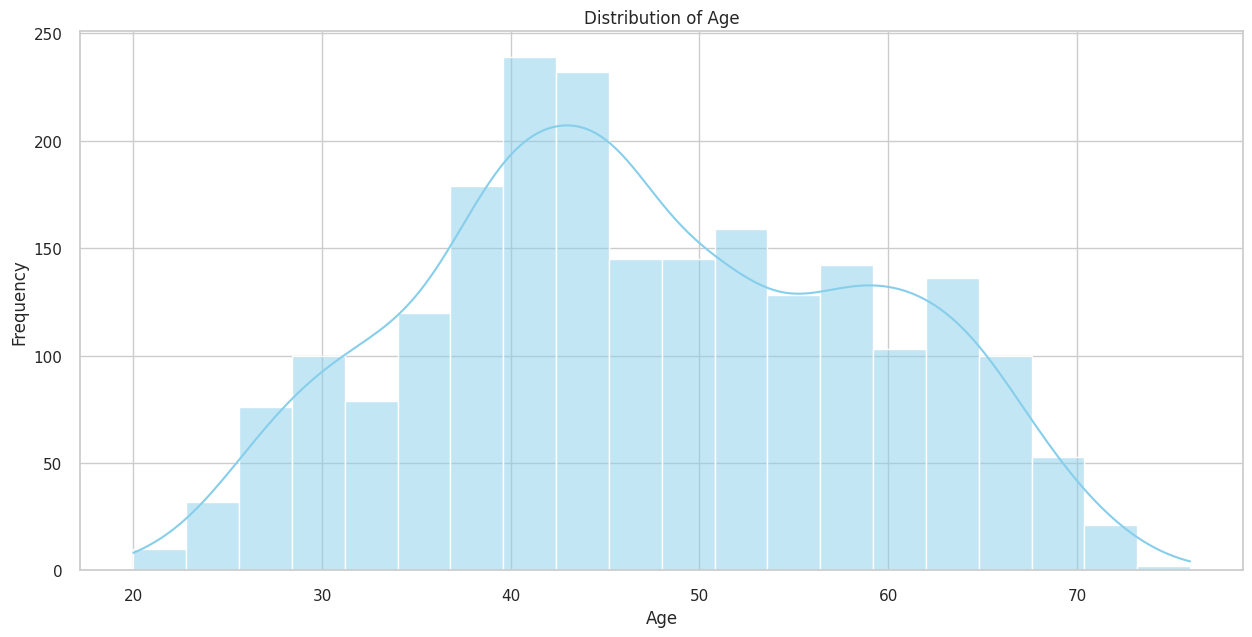

In [25]:
# Drop rows where Age is greater than 100
df = df[df['Age'] <= 100]

# Create histogram for the Age feature
plt.figure(figsize=(15, 7))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()

#### **Observations**
* The age distribution is approximately normally distributed with a slight right skew.
* The majority of customers fall within the age range of 30 to 60.
* There are smaller groups of younger (18-30) and older (60+) customers.

### **Kids**

In [26]:
# Calculate total number of children (kids and teens) in the household
df = df.assign(Kids=df['Kidhome'] + df['Teenhome'])

### **Family Size**

In [27]:
# Check the unique categories in Marial_Status
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [28]:
# Combine replacements using a dictionary for better readability and efficiency
replacement_dict = {
    'Married': 'Relationship',
    'Together': 'Relationship',
    'Divorced': 'Single',
    'Widow': 'Single'
}

# Apply replacements
df['Marital_Status'] = df['Marital_Status'].replace(replacement_dict)

# Check the unique categories in 'Marital_Status' after replacement
print(df['Marital_Status'].unique())

['Single' 'Relationship']


In [29]:
# Create a new feature "Status" by mapping Marital_Status values to numerical codes
df['Status'] = df['Marital_Status'].map({'Single': 1, 'Relationship': 2})

# Verify the new feature by displaying the unique values in 'Status'
print(df['Status'].unique())

[1 2]


In [30]:
# Ensure 'Status' and 'Kids' are numeric
df['Family_Size'] = df['Status'].fillna(0) + df['Kids']

# Verify the new feature by displaying the summary statistics of 'Family_Size'
print(df['Family_Size'].describe())

count    2201.000000
mean        2.595638
std         0.905568
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Family_Size, dtype: float64


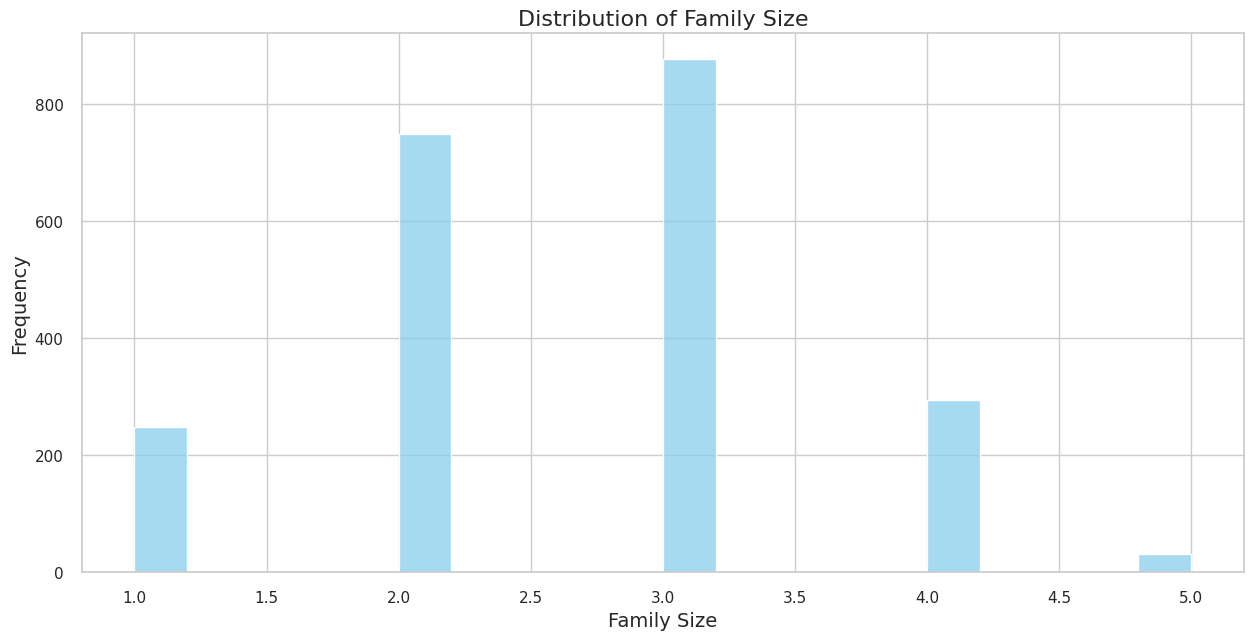

In [31]:
# Create histogram for the 'Family_Size' feature
plt.figure(figsize=(15, 7))

# Plot the histogram
sns.histplot(df['Family_Size'], bins=20, kde=False, color='skyblue')

# Add title and labels
plt.title('Distribution of Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

####**Family Size Observations**
* Family sizes in Descending Order: 3, 2, 4, 1, 5.
* Larger family sizes (5+ members) are more rare.
* This suggests that a significant portion of the customer base consists of single individuals or smaller families.

###**Total amount spent by the customers on various products**


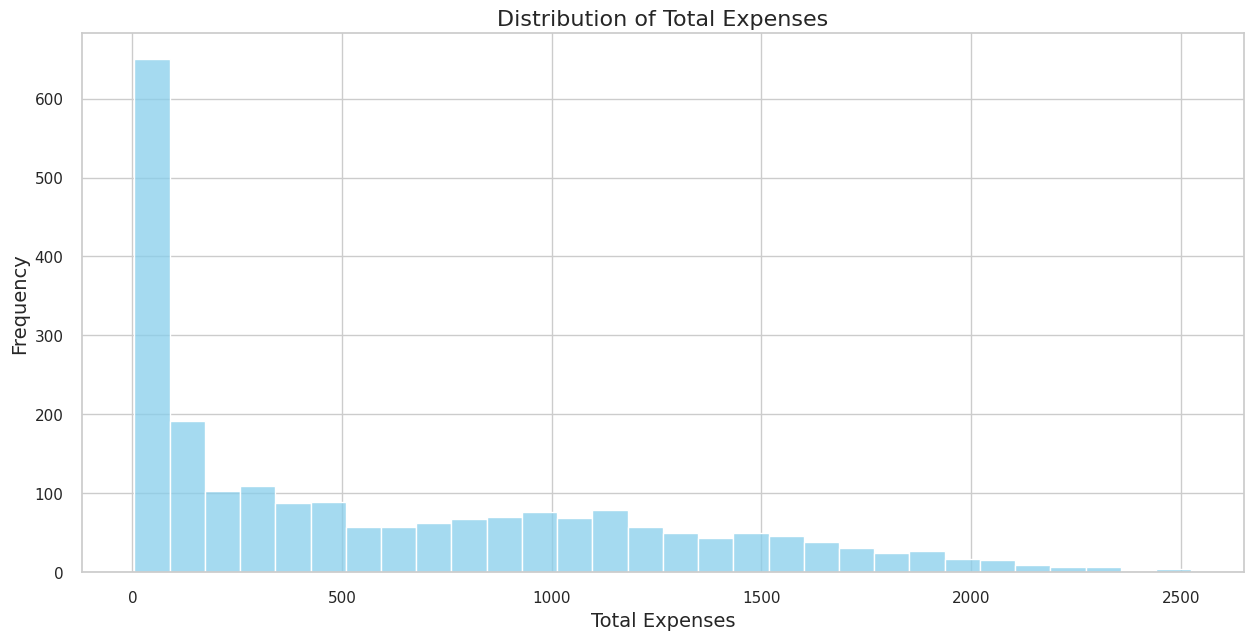

In [32]:
# Calculate total amount spent on products
df['Expenses'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                  df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])

# Create histogram for the 'Expenses' feature
plt.figure(figsize=(15, 7))

# Plot the histogram
sns.histplot(df['Expenses'], bins=30, kde=False, color='skyblue')

# Add title and labels
plt.title('Distribution of Total Expenses', fontsize=16)
plt.xlabel('Total Expenses', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

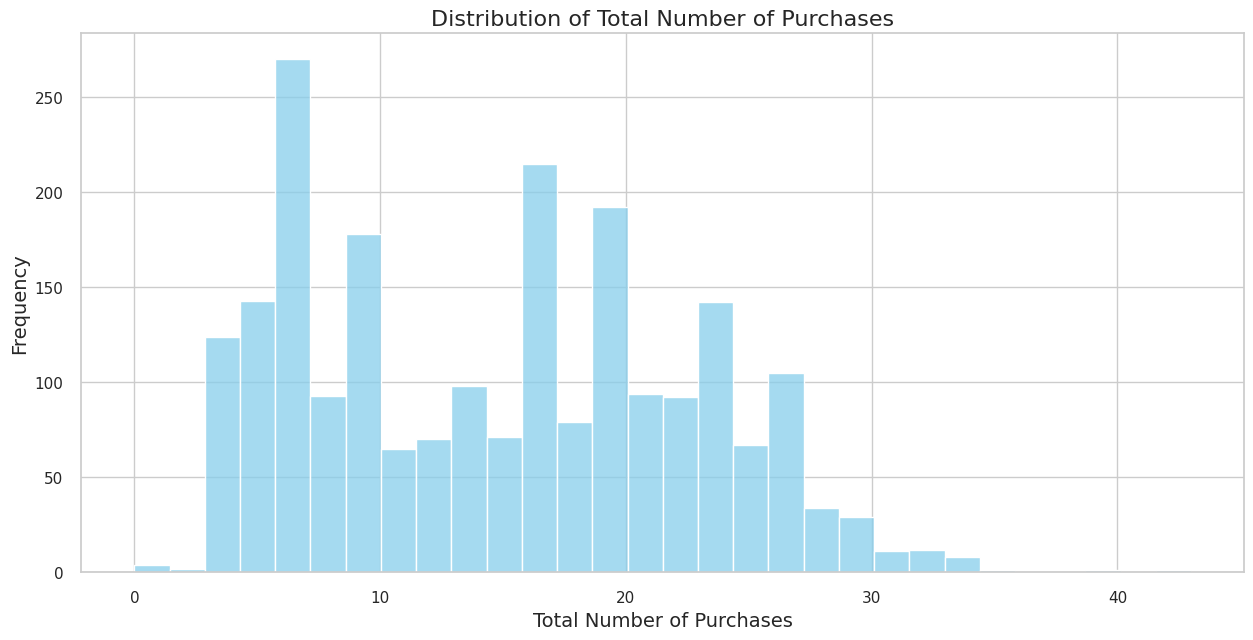

In [33]:
# Calculate total number of purchases
df['NumTotalPurchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] +
                           df['NumCatalogPurchases'] + df['NumStorePurchases'])

# Create histogram for the 'NumTotalPurchases' feature
plt.figure(figsize=(15, 7))

# Plot the histogram
sns.histplot(df['NumTotalPurchases'], bins=30, kde=False, color='skyblue')

# Add title and labels
plt.title('Distribution of Total Number of Purchases', fontsize=16)
plt.xlabel('Total Number of Purchases', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

####**Expenses Observations**
* The distribution of total expenses is heavily right-skewed.
* A large majority of customers have relatively low total expenses.
* There is a long tail of customers with significantly higher expenses, indicating a smaller group of high-spending customers.
* This suggests potential for customer segmentation based on spending behavior, targeting high-value customers with premium products or personalized offers.

####**Total Purchases Observations**
* The distribution of total purchases is heavily right-skewed, indicating that a large portion of customers make a relatively small number of total purchases.
* There are a few customers who make a significantly higher number of purchases compared to the majority.
* This suggests a potential segmentation opportunity based on purchase frequency, targeting high-frequency buyers with loyalty programs or exclusive offers.

### **Engaged in Days**

In [34]:
# Convert 'Dt_Customer' to a date object with error handling
try:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
    print("Date conversion successful.")
except Exception as e:
    print(f"Error converting date: {e}")

# Verify conversion
print(df['Dt_Customer'].head())

Date conversion successful.
0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [35]:
# Ensure 'Dt_Customer' is a datetime object and handle missing values
if df['Dt_Customer'].dtype != 'datetime64[ns]':
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

# Find the minimum and maximum dates
min_date = df['Dt_Customer'].min()
max_date = df['Dt_Customer'].max()

# Print results with clear formatting
print(f"Minimum Date: {min_date.strftime('%Y-%m-%d') if pd.notna(min_date) else 'No valid dates'}")
print(f"Maximum Date: {max_date.strftime('%Y-%m-%d') if pd.notna(max_date) else 'No valid dates'}")

Minimum Date: 2012-07-30
Maximum Date: 2014-06-29


In [36]:
# Define the reference date
reference_date = pd.to_datetime('2015-01-01')

# Create a new column 'day' with the reference date
df['day'] = reference_date

# Ensure 'Dt_Customer' is in datetime format (if not already)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

# Calculate the number of days since the customer joined
df['Engaged_in_days'] = (df['day'] - df['Dt_Customer']).dt.days

# Drop the 'day' column if it is no longer needed
df.drop(columns=['day'], inplace=True)

# Check for any negative values which might indicate errors in the date data
print(df[df['Engaged_in_days'] < 0])

Empty DataFrame
Columns: [Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Age, Kids, Status, Family_Size, Expenses, NumTotalPurchases, Engaged_in_days]
Index: []

[0 rows x 33 columns]


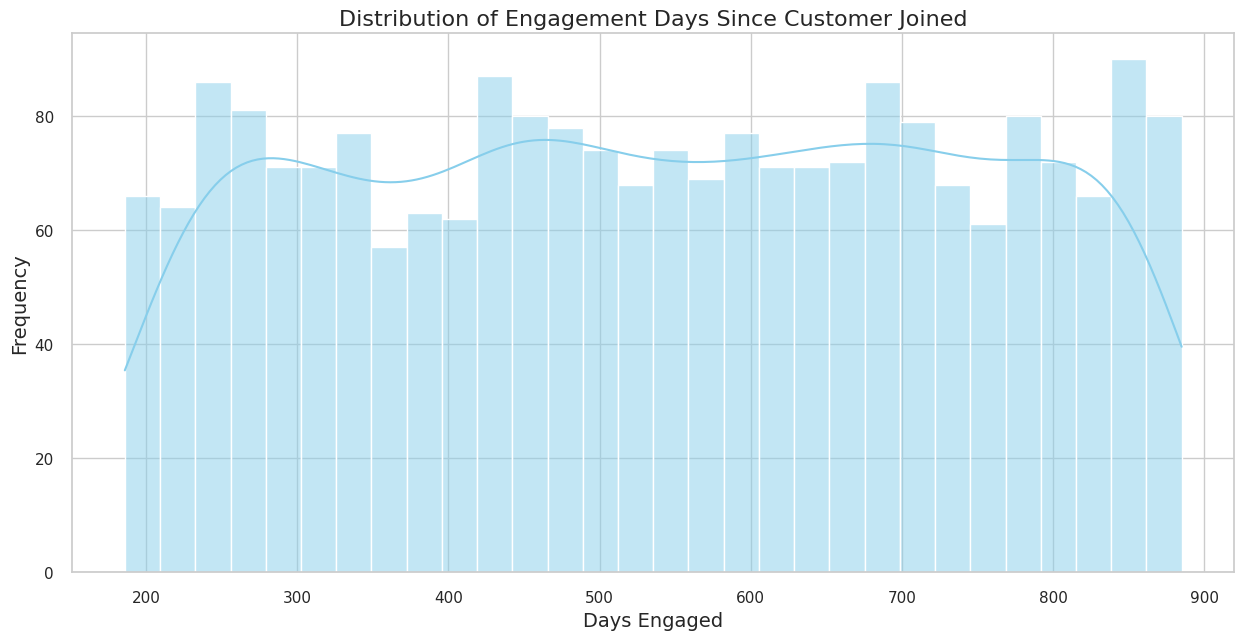

In [37]:
# Create histogram for the 'Engaged_in_days' feature
plt.figure(figsize=(15, 7))

# Plot the histogram with more control over the number of bins
sns.histplot(df['Engaged_in_days'], bins=30, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Engagement Days Since Customer Joined', fontsize=16)
plt.xlabel('Days Engaged', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

####**Engaged_in_days Observations**
* The distribution of engagement days is slightly right-skewed, indicating that a larger portion of customers are relatively newer.
* There's a gradual decline in the number of customers as the engagement days increase, suggesting a natural attrition or a decrease in customer acquisition over time.
* Understanding the engagement patterns can help in identifying potential churn risks and tailoring retention strategies for different customer segments based on their engagement duration.

### **TotalAcceptedCmp**

In [38]:
# List of campaign-related columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate the sum of all campaign-related columns
df['TotalAcceptedCmp'] = df[campaign_columns].sum(axis=1)

# Verify the new feature
# Display summary statistics
print("Summary statistics for 'TotalAcceptedCmp':")
print(df['TotalAcceptedCmp'].describe())

Summary statistics for 'TotalAcceptedCmp':
count    2201.000000
mean        0.298501
std         0.677859
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: TotalAcceptedCmp, dtype: float64


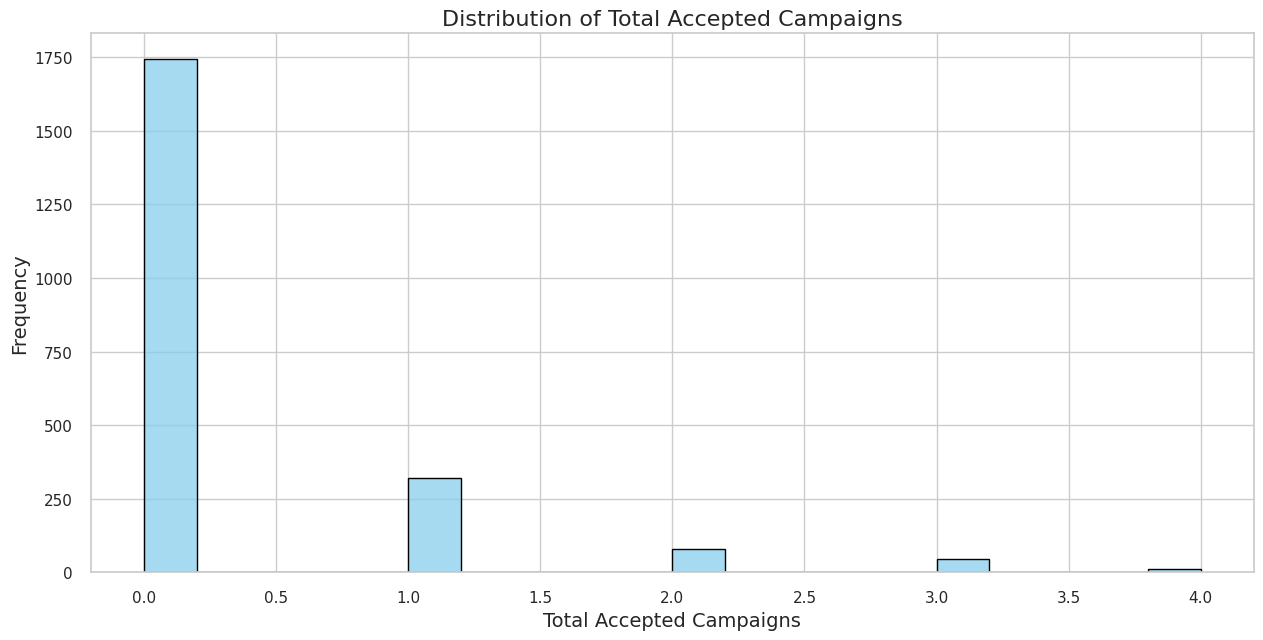

In [39]:
# Create histogram for the TotalAcceptedCmp feature
plt.figure(figsize=(15, 7))
sns.histplot(df['TotalAcceptedCmp'], bins=20, kde=False, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Total Accepted Campaigns', fontsize=16)
plt.xlabel('Total Accepted Campaigns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

####**TotalAcceptedCmp Observations**
* The distribution of "TotalAcceptedCmp" is heavily skewed to the right, indicating that a majority of customers have accepted very few or no marketing campaigns.
* There's a large peak at 0, representing customers who haven't responded positively to any campaigns.
* A smaller segment of customers has accepted one or two campaigns.
* Very few customers have accepted more than two campaigns.
* This distribution suggests that marketing campaigns might not be highly effective in converting a large portion of the customer base.
* It also highlights the potential for identifying and targeting customers who are more receptive to marketing efforts.

### **Amount Per Purchase**

In [40]:
# Ensure no division by zero by replacing zero values in 'NumTotalPurchases' with NaN
df['NumTotalPurchases'].replace(0, np.nan, inplace=True)

# Calculate amount per purchase
df["Amount_per_Purchase"] = df["Expenses"] / df["NumTotalPurchases"]

# Fill NaN values in 'Amount_per_Purchase' with a specific value (e.g., 0 or median) if needed
df["Amount_per_Purchase"].fillna(0, inplace=True)  # Replace 0 with median or another value if more appropriate

# Display summary statistics to verify the calculation
print(df["Amount_per_Purchase"].describe())

count    2201.000000
mean       32.573521
std        28.566210
min         0.000000
25%         9.714286
50%        23.375000
75%        45.217391
max       186.500000
Name: Amount_per_Purchase, dtype: float64


In [41]:
# Ensure that Amount_per_Purchase is not empty and does not contain NaN values
if not df["Amount_per_Purchase"].dropna().empty:
    # Calculate minimum and maximum of Amount_per_Purchase
    min_amount_per_purchase = df["Amount_per_Purchase"].min()
    max_amount_per_purchase = df["Amount_per_Purchase"].max()

    # Display results with formatted strings
    print(f"Minimum Amount per Purchase: {min_amount_per_purchase:.2f}")
    print(f"Maximum Amount per Purchase: {max_amount_per_purchase:.2f}")

    # Optionally, display additional statistics
    print("\nSummary Statistics for Amount_per_Purchase:")
    print(df["Amount_per_Purchase"].describe())
else:
    print("No valid data available for Amount_per_Purchase.")

Minimum Amount per Purchase: 0.00
Maximum Amount per Purchase: 186.50

Summary Statistics for Amount_per_Purchase:
count    2201.000000
mean       32.573521
std        28.566210
min         0.000000
25%         9.714286
50%        23.375000
75%        45.217391
max       186.500000
Name: Amount_per_Purchase, dtype: float64


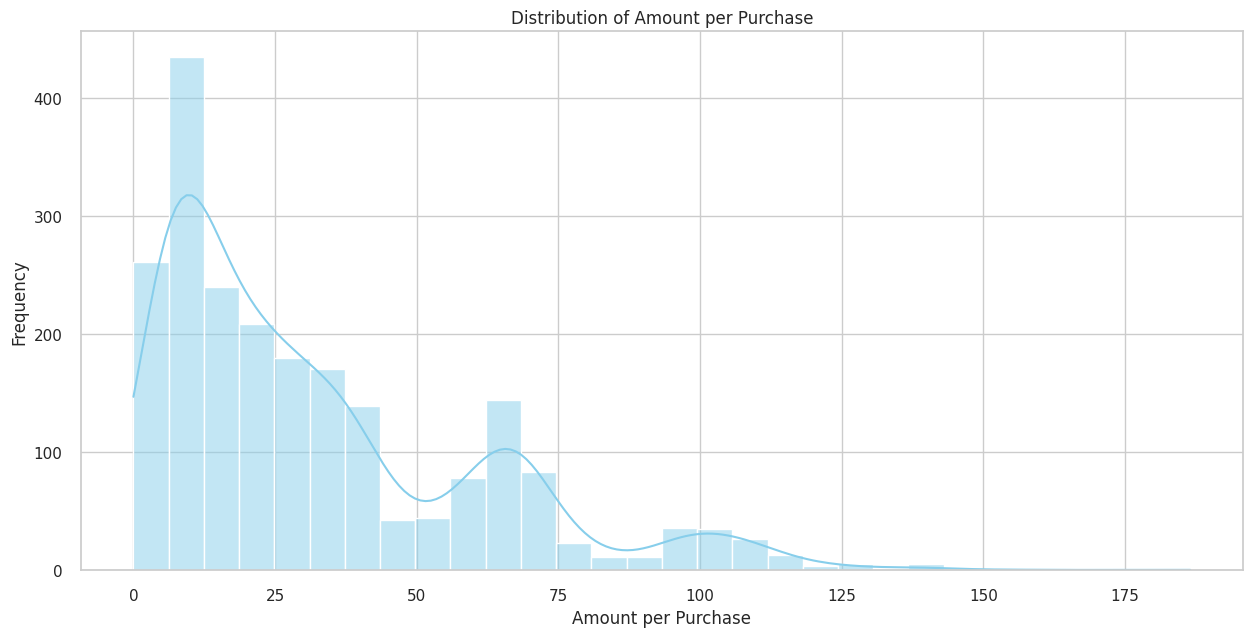

In [42]:
# Create histogram for the Amount_per_Purchase feature
plt.figure(figsize=(15, 7))

# Drop NaN values before plotting
sns.histplot(df['Amount_per_Purchase'].dropna(), bins=30, kde=True, color='skyblue')

# Add labels and title for clarity
plt.xlabel('Amount per Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Amount per Purchase')

# Show the plot
plt.show()

####**Amount Per Purchase Observations**
* The distribution of "Amount_per_Purchase" is right-skewed, indicating that a majority of customers tend to spend a smaller amount per purchase.
* There's a peak in the lower range of spending, suggesting a common pattern of smaller, frequent purchases.
* A smaller segment of customers exhibits higher spending per purchase, indicating a potential for high-value transactions.
* Understanding the distribution of amount per purchase can help in tailoring pricing strategies and promotional offers to cater to different spending behaviors.

### **Income Vs Expenses**

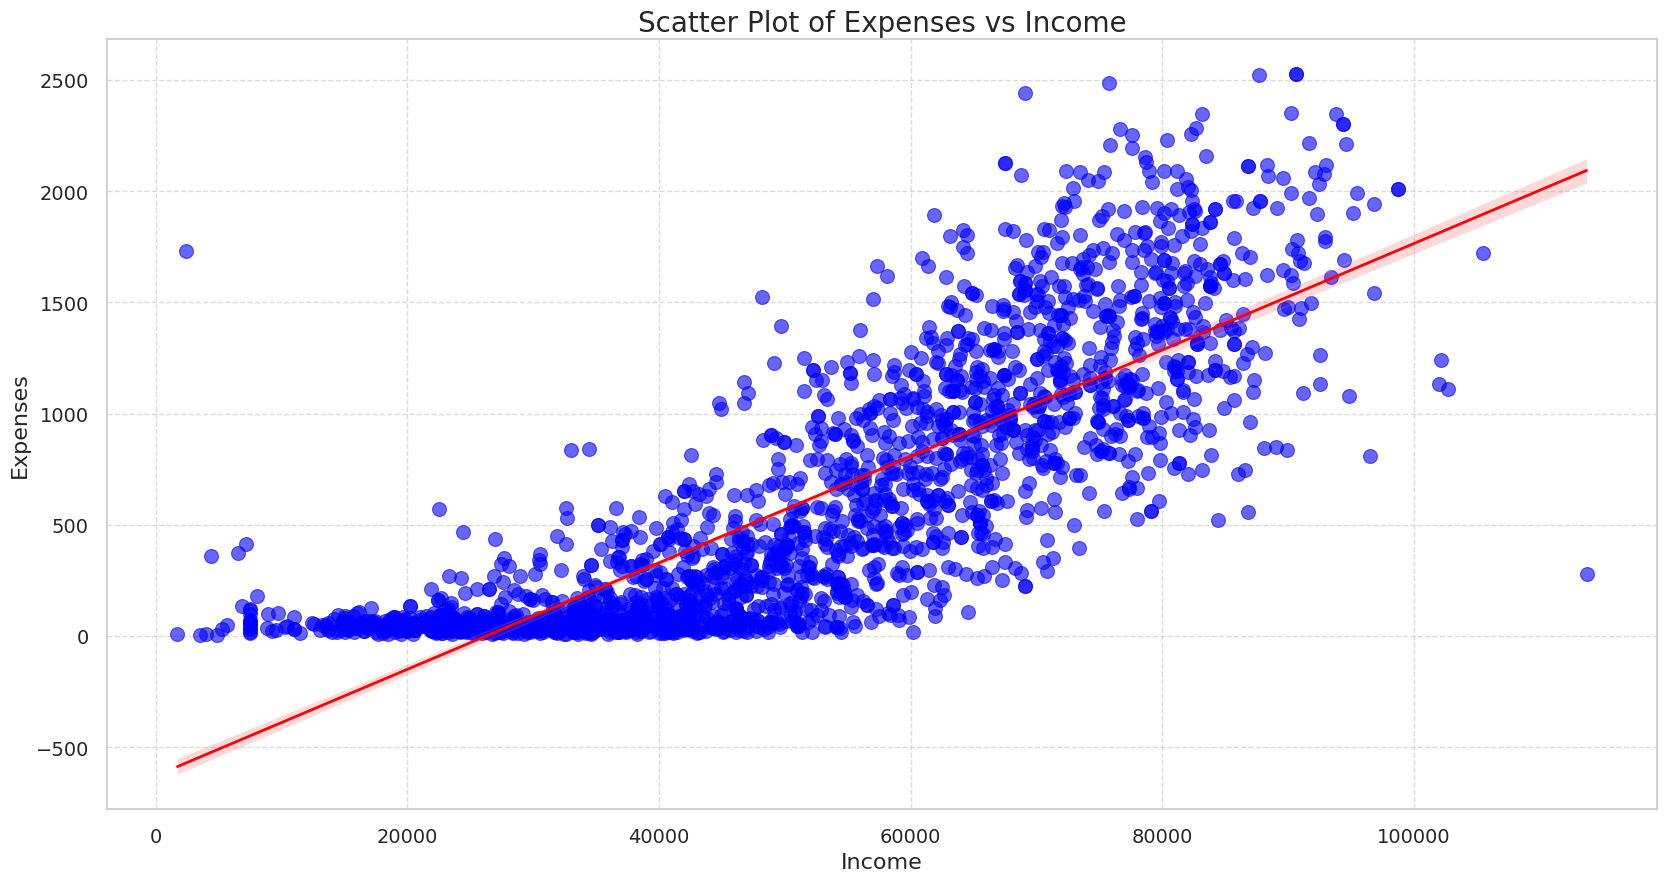

In [43]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis
plt.figure(figsize=(20, 10))  # Setting the plot size

# Scatter plot with custom marker size and color
sns.scatterplot(x='Income', y='Expenses', data=df, color='blue', edgecolor=None, s=100, alpha=0.6)

# Optionally add a regression line
sns.regplot(x='Income', y='Expenses', data=df, scatter=False, color='red', line_kws={'linewidth':2})

# Add titles and labels
plt.title('Scatter Plot of Expenses vs Income', fontsize=20)
plt.xlabel('Income', fontsize=16)
plt.ylabel('Expenses', fontsize=16)

# Customize ticks and grid
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

####**Expenses vs Income Observations**
* There is a positive correlation between income and expenses. As income increases, expenses also tend to increase.
* The regression line further emphasizes this positive relationship.
* There's a concentration of data points in the lower income and lower expenses range, suggesting a significant portion of customers with moderate spending habits.
* A few outliers with high income and high expenses indicate the presence of high-value customers who contribute significantly to overall sales.
* This positive correlation suggests that targeting customers with higher incomes could lead to increased sales and revenue.

### **Income Vs Expenses**

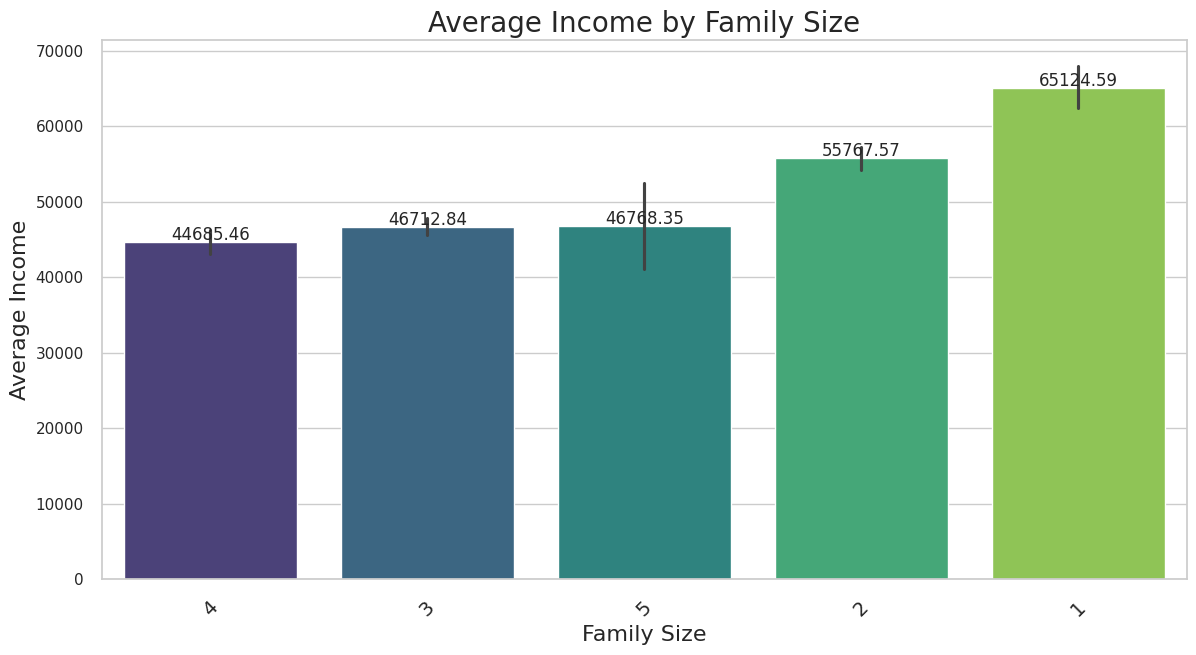

In [44]:
# Set the plot size
plt.figure(figsize=(14, 7))

# Order the categories by average income
ordered_family_size = df.groupby('Family_Size')['Income'].mean().sort_values().index

# Create the bar plot with custom color palette and ordered categories
bar_plot = sns.barplot(x='Family_Size', y='Income', data=df, palette='viridis', order=ordered_family_size)

# Add titles and axis labels
plt.title('Average Income by Family Size', fontsize=20)
plt.xlabel('Family Size', fontsize=16)
plt.ylabel('Average Income', fontsize=16)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, fontsize=14)

# Display the values on top of each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.2f}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points',
                      fontsize=12)

# Show the plot
plt.show()

####**Family Size vs Income Observations**
* Four-person households (Family Size 4) have the lowest average income.
* As family size increases, income generally decreases.
* This trend could be attributed to various factors such as increased expenses associated with larger families or differences in household composition (e.g., single-income vs. dual-income households).

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

####**Dropping Unnecessary Columns**
* Drop `ID`: Customer ID is not relevant for segmentation.
* Drop `Year_Birth`: We have already extracted `Age` from it.
* Drop `Dt_Customer`: We have already extracted `Engaged_in_days` from it.
* Drop `Marital_Status` & `Status`: We have created a new feature `Family_Size` from it.
* Drop `Education`, `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome`: Distance-based algorithms cannot use default distances to find the distance between categorical and numeric values.
* Drop `Z_CostContact` & `Z_Revenue`: These columns have constant values and do not provide any information for segmentation.
* Drop the following campaign related columns: `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, and `AcceptedCmp5`: We have created a new feature `TotalAcceptedCmp` from it.
* Drop `Complain`: Most customers (~95%) did not complain, so the values for this column are mostly the same.

In [45]:
# List of columns to remove for creating the data model
columns_to_remove = [
    "Year_Birth",   # Birth year of the customer (not needed for model)
    "Dt_Customer",  # Date customer joined (redundant for the model)
    "Complain",     # Customer complaints (not useful for model)
    "Response",     # Response to the campaign (included in campaign-related columns)
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",  # Campaign acceptance details (summarized in TotalAcceptedCmp)
    "Marital_Status", # Marital status (converted to Status)
    "Status",       # Status (consolidated into a single numeric feature)
    "Kids",         # Number of kids (incorporated in Family_Size)
    "Education",    # Education level (potentially useful but not included in model)
    "Kidhome",      # Number of kids in the home (consolidated into Family_Size)
    "Teenhome",     # Number of teenagers in the home (consolidated into Family_Size)
]

# Drop the specified columns to create the data model
data_model = df.drop(columns=columns_to_remove)

# Verify the resulting data model
print(data_model.head())

    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age  \
0                   10 

In [46]:
# Shape of data_model
data_model.shape

(2201, 20)

In [47]:
# First 5 rows of data_model
data_model.head()

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Age  \
0                   10                  4                  7   59   
1                    1                  2                  5   62   
2                    2                 10                  4   51   
3                    0                  4                  6   32   
4                    3                  6                  5   35   

   Family_Size  Expenses  NumTotalPurchases  Engaged_in_days  \
0            1      1617               25.0              849   
1            3        27                6.0              299   
2            2       776               21.0              498   
3            3        53                8.0              325   
4            3       422               19.0              347   

   TotalAcceptedCmp  Amount_per_Purchase  
0                 0            64.680000  
1                 0             4.500000  
2                 0            36.952381  
3                 0             6.625000  
4                 0            22.210526

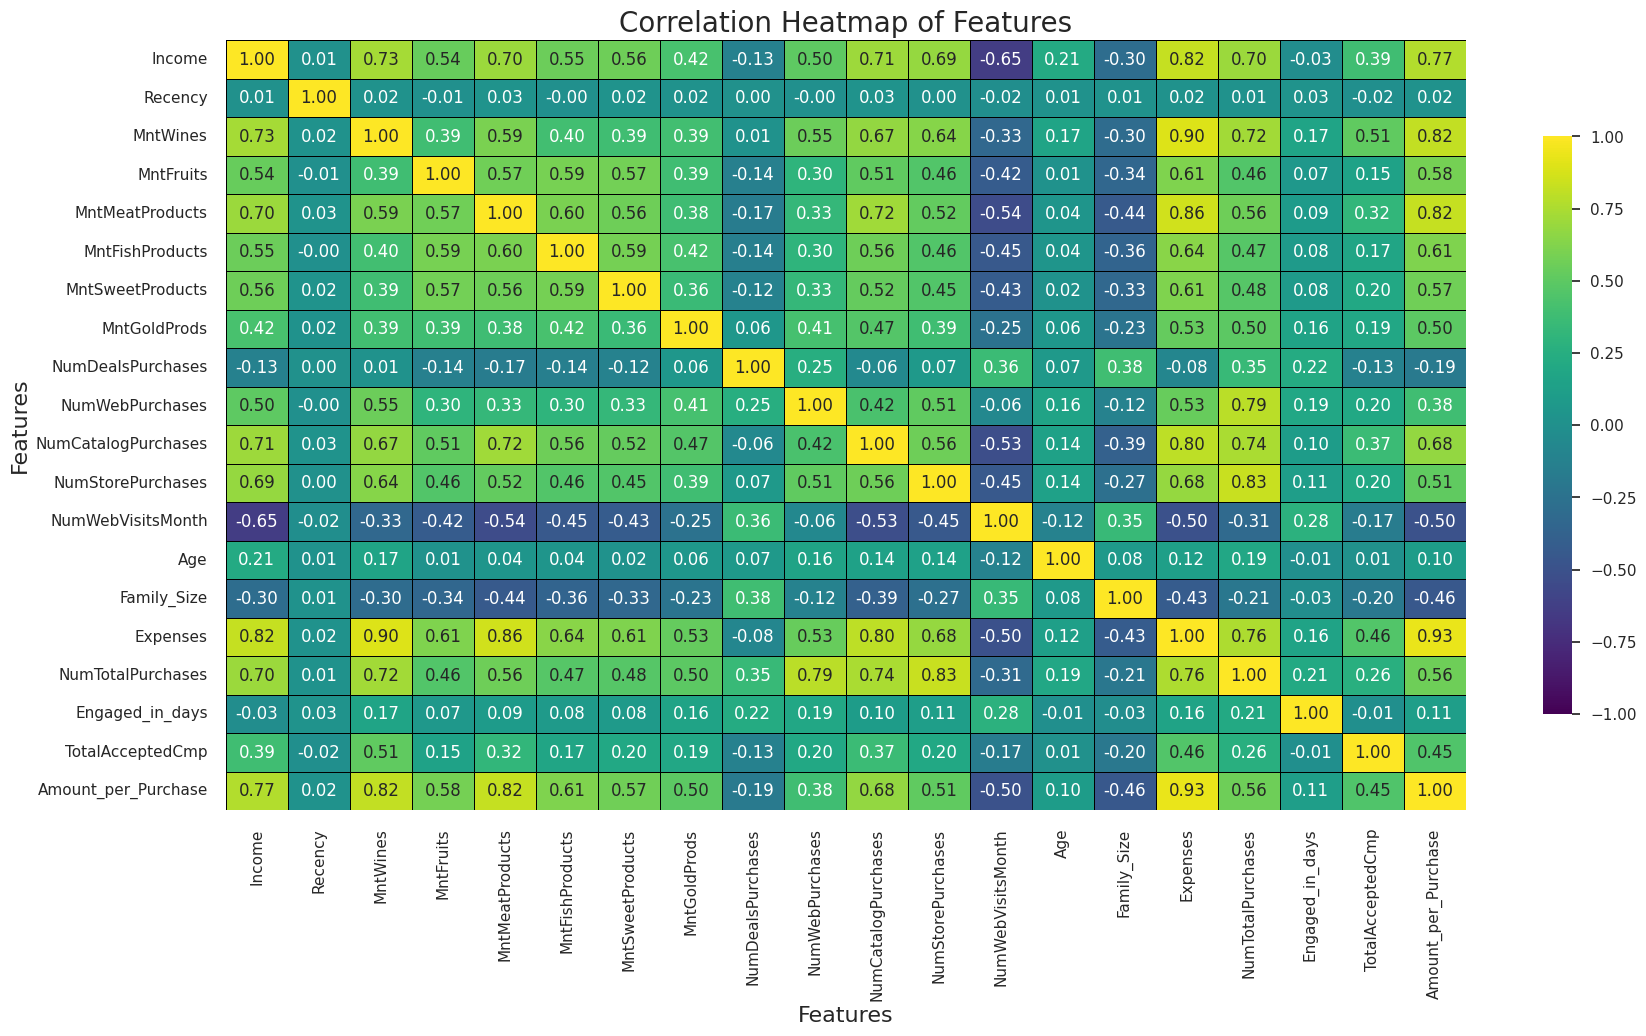

In [48]:
# Plot the correlation heatmap
plt.figure(figsize=(20, 10))  # Set plot size

# Compute the correlation matrix
correlation_matrix = data_model.corr()

# Plot the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,                # Show correlation coefficients
    cmap='viridis',            # Color map
    vmin=-1, vmax=1,           # Value range
    fmt='.2f',                 # Format for annotations
    linewidths=0.5,            # Line width between cells
    linecolor='black',         # Color of lines separating cells
    cbar_kws={"shrink": .75}   # Colorbar settings
)

# Add title and labels
plt.title('Correlation Heatmap of Features', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)

plt.show()

### **Heatmap Observations:**

* **Strong Positive Correlations:**
    * Expenses & Amount_per_Purchase (0.99):  Indicates that as total expenses increase, the amount spent per purchase also tends to increase.
    * NumTotalPurchases & NumWebPurchases (0.78): Suggests customers who buy more overall also tend to favor web purchases.
    * NumTotalPurchases & NumStorePurchases (0.68):  Shows a positive relationship between total purchases and in-store purchases.

* **Moderate Positive Correlations:**
    * Income & Expenses (0.65):  Higher income is generally associated with higher spending.
    * MntWines & Expenses (0.64): Wine purchases contribute significantly to total expenses.
    * MntMeatProducts & Expenses (0.58):  Meat product purchases also correlate with higher total expenses.

* **Other Notable Correlations:**
    * NumCatalogPurchases & Income (0.59):  Customers with higher incomes tend to make more catalog purchases.

* **Weak or No Correlations:**
    * Most other pairs of variables show weak or no significant correlations.

### Implications for Segmentation:

* The strong correlation between Expenses and Amount_per_Purchase suggests these variables might be redundant for clustering.  We might consider using only one of them.
* The positive correlations between different purchase channels (NumWebPurchases, NumStorePurchases, etc.) and total purchases indicate that purchase behavior could be a key factor in segmenting customers.
* Income and Expenses are moderately correlated, suggesting that affluence could be another important dimension for segmentation.

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

####**Step 1: Scale the data**

In [49]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler function on the new data
try:
    # Ensure the new data has the same columns as the original data_model
    if set(data_model.columns) != set(data_model.columns):
        raise ValueError("The columns in the new data do not match the original data columns.")

    # Handle missing values (replace with mean for example)
    data_model_imputed = data_model.fillna(data_model.mean())  # Fill NaNs with column means

    # Perform scaling on the imputed data
    df_scaled = scaler.fit_transform(data_model_imputed)

    # Convert the scaled data back to a DataFrame
    df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)

    # Display the first few rows of the scaled data
    print("Scaled Data (first 5 rows):")
    print(df_scaled.head())

    # Display summary statistics
    print("\nSummary Statistics of Scaled Data:")
    print(df_scaled.describe())

except ValueError as e:
    print(f"Error: {e}")

# Initialize T-SNE
tsne = TSNE(n_components=2, random_state=1, perplexity=35)

# Fit and transform the scaled data (now without NaNs)
data_tsne = tsne.fit_transform(df_scaled)

# Convert the T-SNE output to a DataFrame
data_tsne_df = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])

Scaled Data (first 5 rows):
     Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.315298  0.309592  0.973919   1.549881         1.748119         2.460069   
1 -0.254008 -0.382021 -0.873863  -0.638067        -0.731372        -0.652429   
2  0.965746 -0.796989  0.355031   0.569077        -0.175782         1.343231   
3 -1.204845 -0.796989 -0.873863  -0.562621        -0.667089        -0.505959   
4  0.322780  1.554495 -0.394150   0.418184        -0.217107         0.153159   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.479104      0.855523           0.362672         1.425020   
1         -0.635541     -0.735739          -0.167721        -1.131785   
2         -0.149416     -0.037136          -0.698114         1.425020   
3         -0.586928     -0.755145          -0.167721        -0.766527   
4         -0.003578     -0.561088           1.423459         0.329247   

   NumCatalogPurchases  NumStorePurchases  NumWebVis

###**Observation and Insights:**
####**Summary Statistics:**
* **Mean Values:** The means of all variables are close to zero, as expected from scaling. This uniformity suggests that the scaling process has been applied correctly.
* **Standard Deviation:**The standard deviations are around 1 for all variables, confirming that the data has been scaled consistently.
* **Min/Max Values:** The minimum and maximum values show a wide range for most variables, reflecting the variability in the original data. For example, Income ranges from approximately -2.4 to 3.0, while MntWines ranges from -0.9 to 3.5. This indicates that after scaling, these variables can have substantial variations, which is crucial for identifying meaningful clusters.
* **25th and 75th Percentiles:** These percentiles give insights into the distribution of the data. For instance, the 25th percentile for MntWines is -0.8, and the 75th percentile is 0.6. This suggests that 50% of the data lies within this range, indicating a diverse spread of values.

####**Data Distribution and Scaling:**
* **Standardization:** The data appears to have been standardized (z-score scaling), as indicated by the mean close to zero and standard deviation close to one across all variables. This scaling is helpful for clustering and PCA as it ensures that each variable contributes equally.

####**Variable Behavior & Insights:**
* **Income and Age:** These variables typically show significant variance and can be key differentiators in clusters. For example, the Income variable ranges widely, which may impact purchasing behavior and cluster differentiation.
* **Purchase Variables:** Variables like NumWebPurchases, NumStorePurchases, and TotalAcceptedCmp likely capture different purchasing behaviors. Their wide range suggests varied consumer behavior across the dataset.
* **Expenses:** This variable has a broad range, indicating significant variation in spending patterns among customers.
* **Engaged_in_days:** The mean is near zero, but with a substantial standard deviation, suggesting varying levels of engagement among customers.

####**Conlcusion:**
Overall, the scaled data provides a normalized view of the original variables, making it easier to analyze and cluster. The variability in the min and max values, along with the percentiles, helps understand the spread and distribution of the data, which is critical for effective clustering and further analysis. Analyzing cluster means and visualizing them can reveal meaningful insights into customer segments or patterns in the data.



####**Step 2: Apply T-SNE**

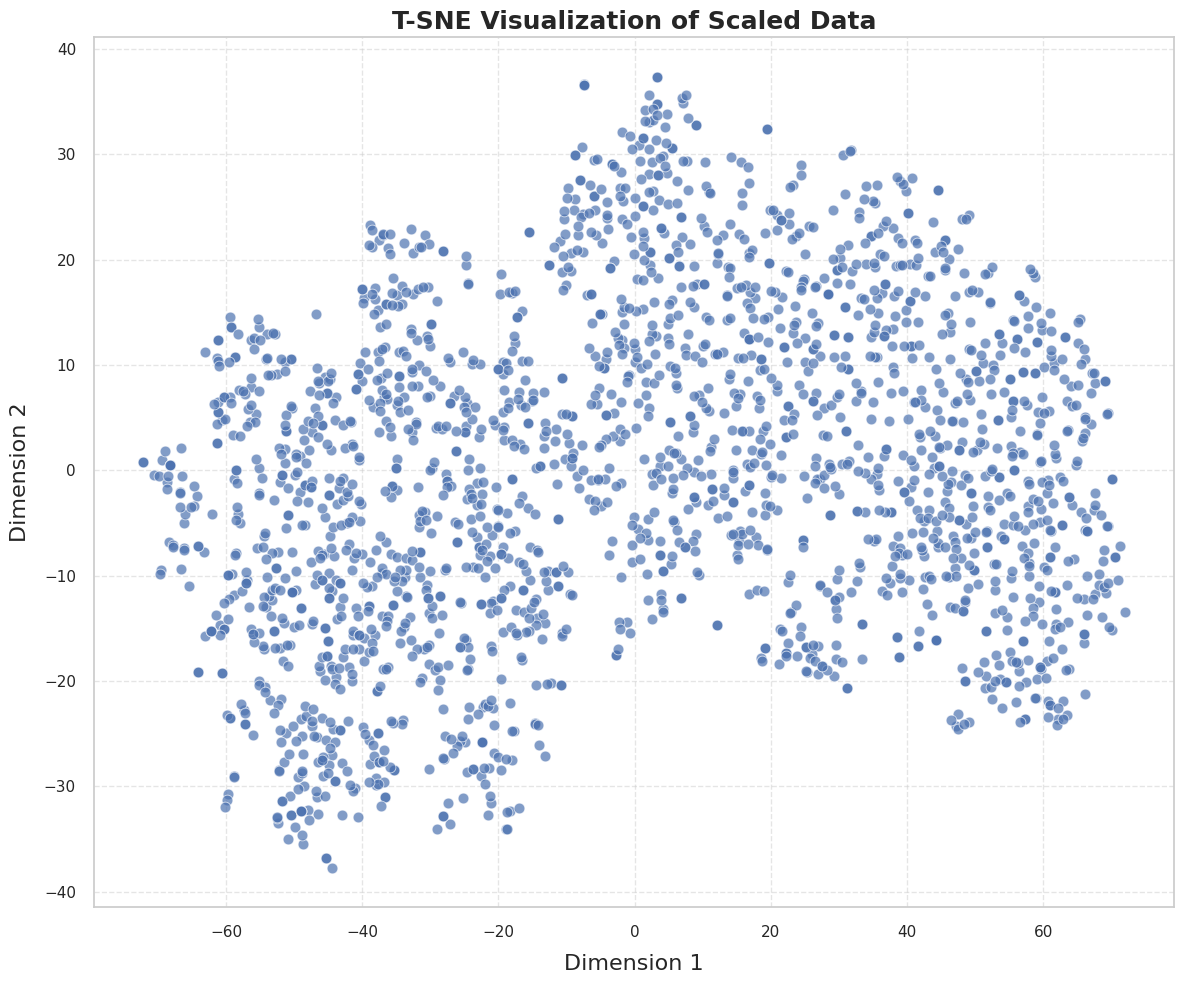

In [50]:
# Plot the T-SNE results
plt.figure(figsize=(12, 10))  # Set plot size

# Create the scatter plot
scatter_plot = sns.scatterplot(
    x='Dimension 1',
    y='Dimension 2',
    data=data_tsne_df,
    alpha=0.7,  # Adjusted transparency for better visibility
    s=60,  # Increased point size for better emphasis
    edgecolor='w',  # Added white edgecolor for clarity
    palette='viridis'  # Custom color palette
)

# Add title and labels with enhanced formatting
plt.title('T-SNE Visualization of Scaled Data', fontsize=18, weight='bold')
plt.xlabel('Dimension 1', fontsize=16, labelpad=10)  # Added padding for labels
plt.ylabel('Dimension 2', fontsize=16, labelpad=10)

# Add grid with enhanced formatting
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

####**T-SNE Scatterplot Observations**
* **Potential Clusters:** The T-SNE visualization suggests the presence of potential clusters within the data. There are distinct groupings of points, indicating that customers might be segmented based on their purchasing behavior and engagement patterns.
* **Cluster Density:** Some clusters appear denser than others, suggesting varying degrees of similarity among customers within those groups. Denser clusters might represent more homogeneous customer segments.
* **Outliers:** There are a few points scattered away from the main clusters, which could indicate outliers or unique customer profiles that might require separate attention.
* **Dimensionality Reduction:** T-SNE effectively reduces the dimensionality of the data to two dimensions, allowing for a visual representation of potential customer segments.

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

####**Applying Clustering Directly on the Current Data**
#####**Pros**
* Preservation of Original Features: Clustering on the original data maintains the interpretability of the features.
* Simple and Direct: This approach is straightforward and does not involve additional preprocessing steps.

#####**Cons**
* High Dimensionality: High-dimensional data can make clustering less effective due to the "curse of dimensionality".
* Redundancy and Noise: The presence of redundant or noisy features can negatively impact clustering performance.

#####**Conclusion**
Multicollinearity can occur when the variables used for clustering are strongly correlated. This may lead to a biased cluster profiling which only emphasizes a few variables. Applying PCA can mitigate this issue by reducing multicollinearity among the variables.

In [51]:
# Define the number of principal components to generate
n_components = min(data_model.shape[1], 0.95)  # Set to 0.95 to capture 95% variance or the number of features

# Initialize PCA with the desired number of components and a random state for reproducibility
pca = PCA(n_components=n_components, random_state=1)

# Fit PCA on the scaled data and transform it
data_pca = pca.fit_transform(df_scaled)

# Convert the PCA results to a DataFrame
data_pca_df = pd.DataFrame(data_pca)

# Get the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for insight
print("Explained Variance Ratio of Each Principal Component:")
print(explained_variance_ratio)

Explained Variance Ratio of Each Principal Component:
[0.43530769 0.10759459 0.06257045 0.05837842 0.05044725 0.04281079
 0.03573807 0.03467524 0.02920456 0.02509721 0.02365121 0.02118915
 0.01964058 0.01804682]


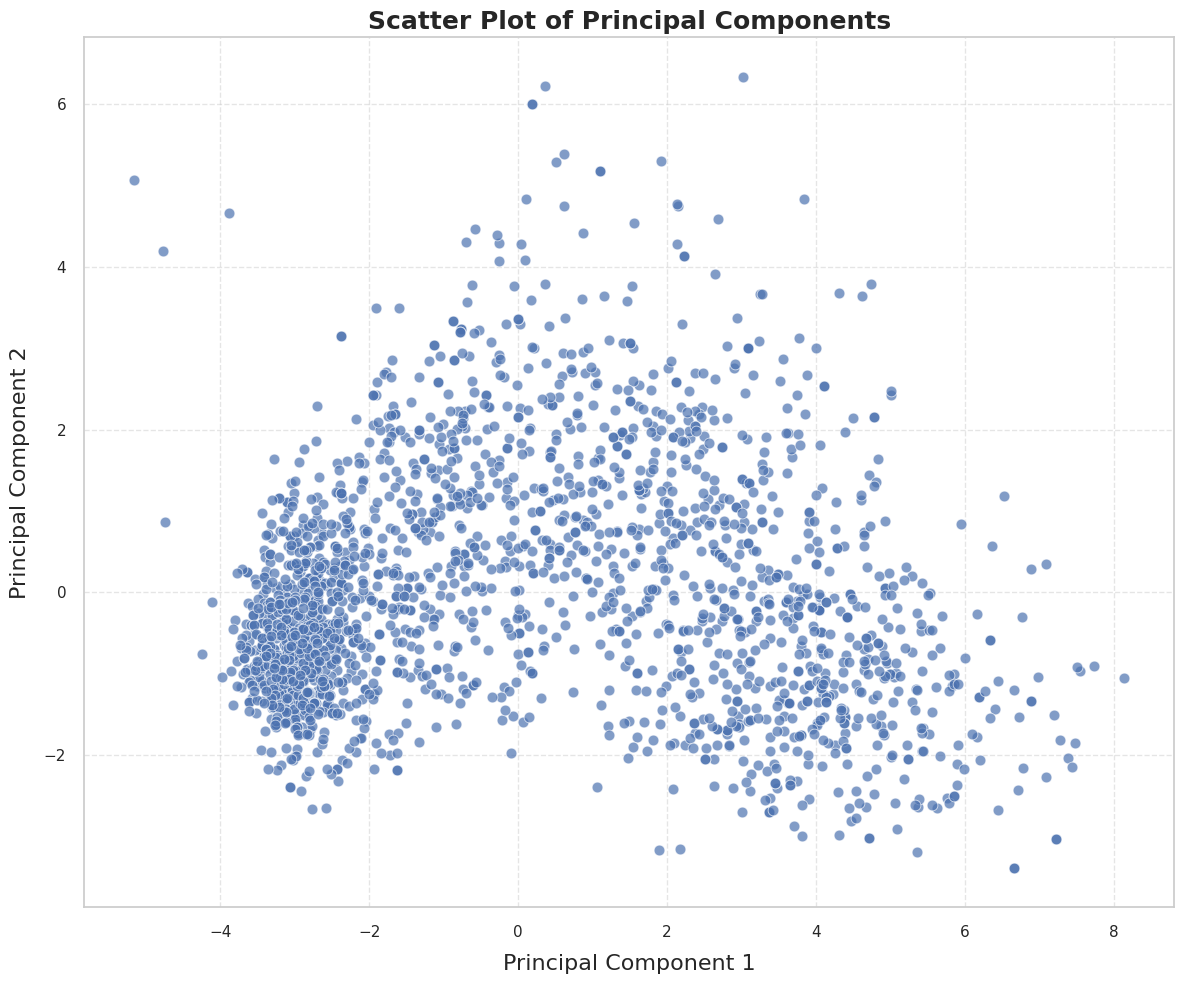

In [52]:
# Set the plot size for better visibility
plt.figure(figsize=(12, 10))

# Create the scatter plot of the first two principal components
scatter_plot = sns.scatterplot(
    x=0,
    y=1,
    data=data_pca_df,
    alpha=0.7,        # Adjust transparency for better visibility of overlapping points
    s=60,             # Set point size for better emphasis
    edgecolor='w'     # Add a white edge color for better separation of points
)

# Add labels and title with enhanced formatting
plt.xlabel('Principal Component 1', fontsize=16, labelpad=10)                   # Increase font size and add padding
plt.ylabel('Principal Component 2', fontsize=16, labelpad=10)
plt.title('Scatter Plot of Principal Components', fontsize=18, weight='bold')   # Increase title font size and weight

# Add grid with enhanced styling for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Use tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Observation and Insights:**
* **Variance Explained:** The explained variance ratio indicates how much of the total variance in the data is captured by each principal component. Higher values indicate that the component captures more of the underlying patterns in the data.
* **Cluster Separation:** The scatterplot shows some degree of separation between groups of points, suggesting potential clusters in the data.
* **Component Interpretation:** The principal components are linear combinations of the original features. Analyzing the loadings of each component can reveal which original features contribute most to the separation observed in the scatterplot.
* **Dimensionality Reduction:** PCA effectively reduces the dimensionality of the data while preserving as much variance as possible. This can be useful for simplifying the data and improving the efficiency of subsequent analysis.

## **K-Means**

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

**Think About It Answers:**
* The optimal K value from an elbow curve (called the elbow point) is where the plot starts to bend and the rate of decrease diminshes sharply.
* The Within-Cluster Sum of Squares (WCSS)/Interia value and Silhouette Score are two metrics which can be used to determine the optimal K value.

### **Applying KMeans on the PCA data and visualize the clusters**

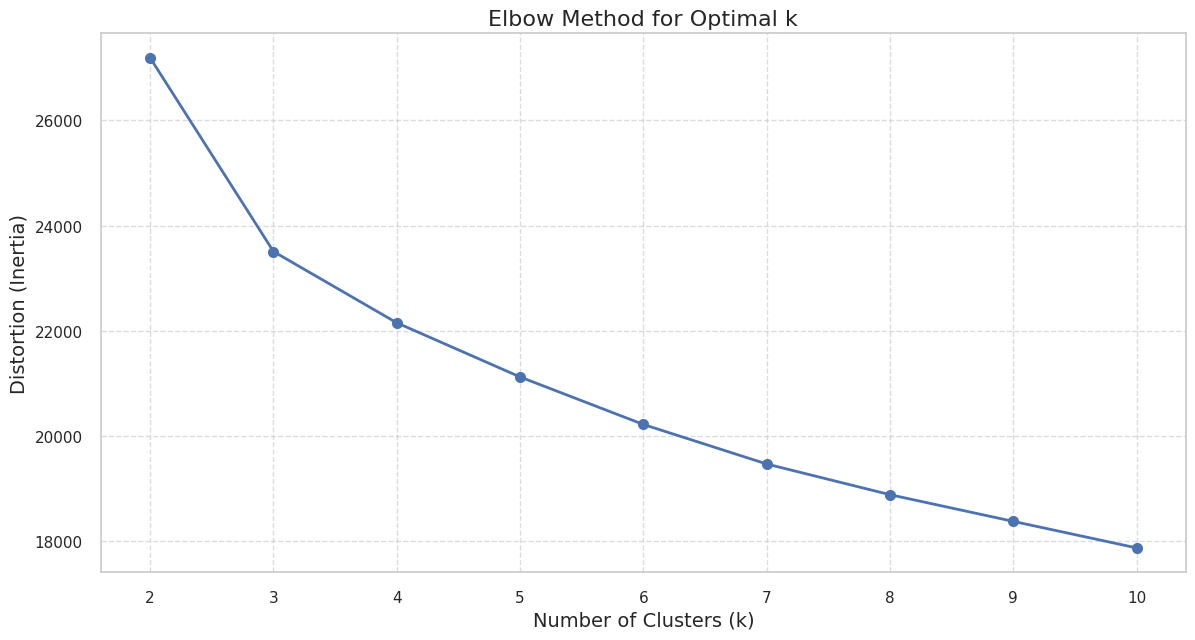

In [53]:
# Initialize list to store distortion values for different k values
distortion_values = []

# Define range of k values from 2 to 10
k_values = range(2, 11)  # Include 10 as the endpoint

# Iterate through each value of k to compute K-Means clustering
for k in k_values:
    # Initialize K-Means model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=4)

    # Fit K-Means model on the data
    kmeans.fit(data_pca)

    # Append the inertia (distortion) value to the list
    distortion_values.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(14, 7))  # Set plot size for better visualization
plt.plot(k_values, distortion_values, "bo-", markersize=8, linewidth=2)  # Plot k vs. distortion with blue dots and lines
plt.xlabel("Number of Clusters (k)", fontsize=14)  # X-axis label
plt.ylabel("Distortion (Inertia)", fontsize=14)  # Y-axis label
plt.title("Elbow Method for Optimal k", fontsize=16)  # Title of the plot

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [54]:
# List to store silhouette scores for different k values
silhouette_scores = []

# Range of k values to test
k_values = range(2, 8)  # Testing values from 2 to 7 (inclusive)

# Loop through each k value
for k in k_values:
    # Initialize K-Means with the current number of clusters
    kmeans = KMeans(n_clusters=k, random_state=4)

    # Fit K-Means on the data
    kmeans.fit(data_pca)

    # Get the cluster labels from K-Means
    labels = kmeans.labels_

    # Calculate silhouette score and append to the list
    score = silhouette_score(data_pca, labels)
    silhouette_scores.append(score)

# Print silhouette scores for each k
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette score for k={k}: {score:.4f}")

Silhouette score for k=2: 0.3417
Silhouette score for k=3: 0.2528
Silhouette score for k=4: 0.2388
Silhouette score for k=5: 0.1983
Silhouette score for k=6: 0.1156
Silhouette score for k=7: 0.1139


**Selecting a K Value**
* Though the silhouette score decreases as K increases, the difference between K=2 and K=3 is not drastic.
* Adding an additional cluster might provide better granularity and better representation of the underlying data, even if there is a slight drop in silhouette score.
* From a business perspective, more clusters can achieve better segmentation for more targeted marketing opportunities.
* For this reason, I will be using a K-value of 3.

In [55]:
# Apply K-Means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(data_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to data_pca_df
data_pca_df['Cluster'] = cluster_labels

# Add cluster labels to the original DataFrame (df)
df['Cluster'] = cluster_labels

# Add cluster labels to data_model
data_model['Cluster'] = cluster_labels

In [56]:
# Check distribution for data_model['Cluster']
print("Distribution of Clusters in 'data_model':")
print(data_model['Cluster'].value_counts())

# Check distribution for data_pca_df['Cluster']
print("\nDistribution of Clusters in 'data_pca_df':")
print(data_pca_df['Cluster'].value_counts())

# Check distribution for df['Cluster'] (assuming 'df' is defined and contains the 'Cluster' column)
print("\nDistribution of Clusters in 'df':")
print(df['Cluster'].value_counts())


Distribution of Clusters in 'data_model':
Cluster
0    1018
2     617
1     566
Name: count, dtype: int64

Distribution of Clusters in 'data_pca_df':
Cluster
0    1018
2     617
1     566
Name: count, dtype: int64

Distribution of Clusters in 'df':
Cluster
0    1018
2     617
1     566
Name: count, dtype: int64


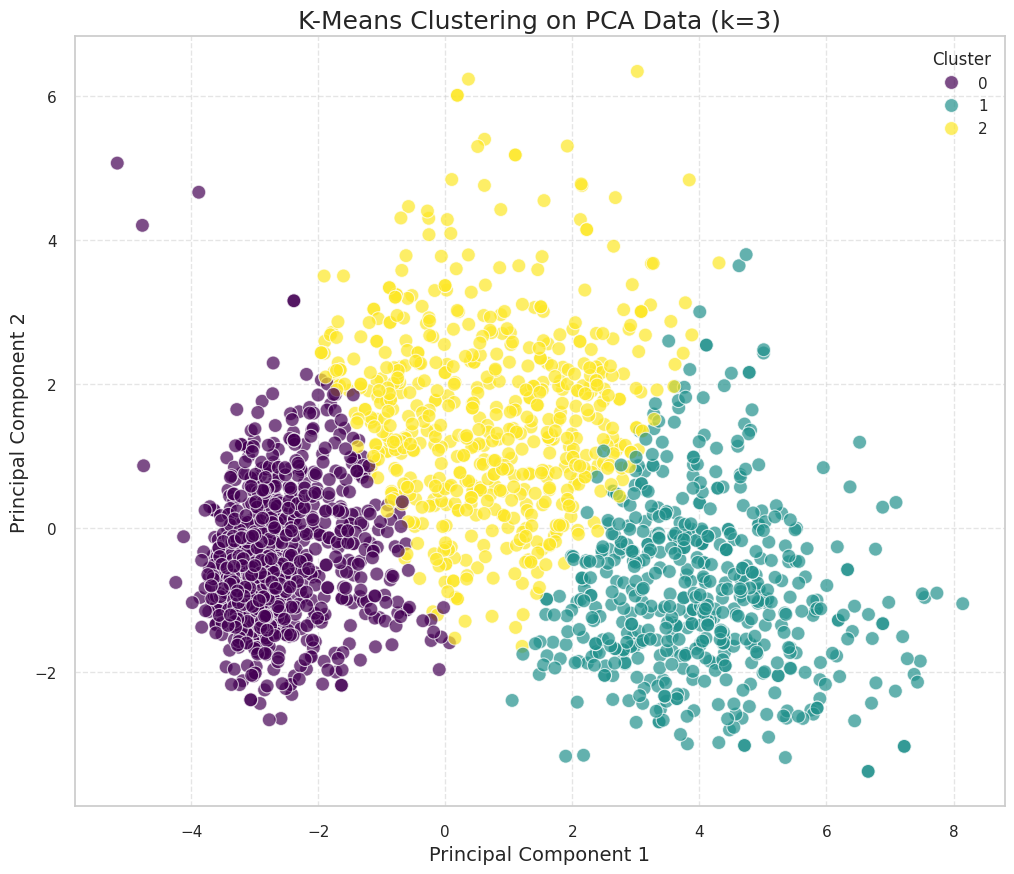

In [57]:
# Set the plot size for better visibility
plt.figure(figsize=(12, 10))

# Create the scatter plot using seaborn
sns.scatterplot(
    x=data_pca_df.iloc[:, 0],  # x-axis using the first principal component
    y=data_pca_df.iloc[:, 1],  # y-axis using the second principal component
    hue=data_pca_df['Cluster'],  # Color by cluster labels
    palette='viridis',  # Color palette
    s=100,  # Marker size
    alpha=0.7,  # Marker transparency
    edgecolor='w'  # White edge color for markers
)

# Add the title and axis labels with customized font sizes
plt.title('K-Means Clustering on PCA Data (k=3)', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Add a grid with a dashed style and semi-transparent lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

####**Cluster Scatterplot Insights**
* **Variance Explained:** The explained variance ratio indicates how much of the total variance in the data is captured by each principal component. Higher values indicate that the component captures more of the underlying patterns in the data.
* **Cluster Separation:** The scatterplot shows some degree of separation between groups of points, suggesting potential clusters in the data.
* **Component Interpretation:** The principal components are linear combinations of the original features. Analyzing the loadings of each component can reveal which original features contribute most to the separation observed in the scatterplot.
* **Dimensionality Reduction:** PCA effectively reduces the dimensionality of the data while preserving as much variance as possible. This can be useful for simplifying the data and improving the efficiency of subsequent analysis.


### **Cluster Profiling**

In [58]:
# Calculate cluster-wise means for numerical columns
cluster_profile_KMeans_3 = data_model.groupby('Cluster').mean()

# Display the cluster profile
print(cluster_profile_KMeans_3)

               Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        34557.272102  49.477407   41.161100   4.878193        22.251473   
1        76251.005300  50.259717  637.333922  68.362191       456.250883   
2        57127.636953  47.225284  439.392220  23.314425       134.356564   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0               6.888016          5.078585     15.225933           1.990177   
1              99.973498         70.731449     77.862191           1.296820   
2              31.178282         23.576985     60.103728           3.789303   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Cluster                                                            
0               2.074656             0.555010           3.214145   
1               5.1

In [59]:
# Highlighting the max average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="green", axis=0)

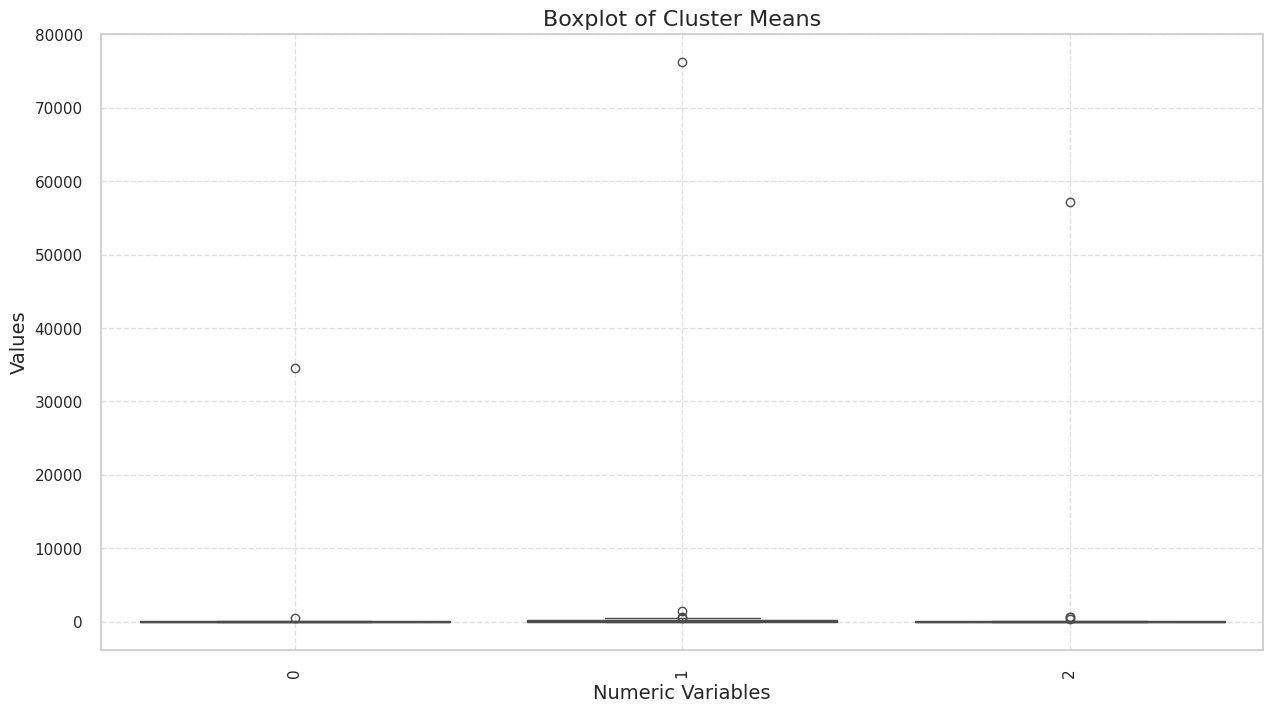

In [60]:
# Transpose the cluster means DataFrame
cluster_means_transposed = cluster_profile_KMeans_3.T

# Create the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cluster_means_transposed)
plt.xticks(rotation=90)
plt.title('Boxplot of Cluster Means', fontsize=16)
plt.xlabel('Numeric Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **K-Means Boxplot Findings**

* **Income:** Cluster 0 exhibits the highest average income, followed by Cluster 2 and then Cluster 1. This suggests a clear income-based segmentation.
* **Spending (MntWines, MntFruits, etc.):** Cluster 0 consistently demonstrates the highest spending across most product categories, indicating a high-value customer segment. Cluster 1 generally shows the lowest spending.
* **Number of Purchases:** Cluster 0 leads in both web and store purchases, further emphasizing their high engagement and spending.
* **Campaign Responses:** Cluster 0 shows the highest response rate to various campaigns, suggesting a greater receptiveness to marketing efforts.
* **Customer Engagement (Engaged_in_days):** Cluster 0 displays the highest engagement, indicating a more active and loyal customer base.#
* Overall, the boxplots reveal distinct characteristics for each cluster, with Cluster 0 representing a high-income, high-spending, and highly engaged customer segment. Cluster 1 appears to be a less engaged and lower-spending group. Cluster 2 falls in between, exhibiting moderate spending and engagement levels. These insights can guide targeted marketing strategies and customer relationship management.

### **Describe the characteristics of each cluster**

###**Observations & Insights:**
####**Income:**
* Cluster 0: `$34,557.27`
* Cluster 1: `$76,251.01`
* Cluster 2: `$57,127.64`

Observation: Cluster 1 represents the highest income group, indicating this cluster includes more affluent individuals. Cluster 2 is in the middle range, while Cluster 0 has the lowest average income.

####**Recency:**
* Cluster 0: 49.48
* Cluster 1: 50.26
* Cluster 2: 47.23

Observation: Recency is relatively similar across clusters, with Cluster 2 having slightly lower recency, meaning customers in this cluster are relatively more recent in their interactions compared to the others.

####**Purchase Amounts:**
**MntWines:**

* Cluster 0: `$41.16`
* Cluster 1: `$637.33`
* Cluster 2: `$439.39`

**MntFruits:**

* Cluster 0: `$4.88`
* Cluster 1: `$68.36`
* Cluster 2: `$23.31`

MntMeatProducts:

* Cluster 0: `$22.25`
* Cluster 1: `$456.25`
* Cluster 2: `$134.36`

**MntFishProducts:**

* Cluster 0: `$6.89`
* Cluster 1: `$99.97`
* Cluster 2: `$31.18`

**MntSweetProducts:**

* Cluster 0: `$5.08`
* Cluster 1: `$70.73`
* Cluster 2: `$23.58`

**MntGoldProds:**

* Cluster 0: `$15.23`
* Cluster 1: `$77.86`
* Cluster 2: `$60.10`

Observation: Cluster 1 has significantly higher spending across all product categories, indicating that this cluster includes high-spending customers. Cluster 2 shows intermediate spending, while Cluster 0 has the lowest expenditure across all categories.

####**Number of Purchases:**

**NumDealsPurchases:**

* Cluster 0: 1.99
* Cluster 1: 1.30
* Cluster 2: 3.79

**NumWebPurchases:**

* Cluster 0: 2.07
* Cluster 1: 5.20
* Cluster 2: 6.43

**NumCatalogPurchases:**

* Cluster 0: 0.56
* Cluster 1: 5.98
* Cluster 2: 3.02

**NumStorePurchases:**

* Cluster 0: 3.21
* Cluster 1: 8.32
* Cluster 2: 7.83

Observation: Cluster 1 has lower numbers in all purchase categories compared to Cluster 2 but shows higher values in spending. This suggests Cluster 1 customers are frequent but not as varied in their purchasing channels. Cluster 2 shows higher frequency in web purchases, indicating more engagement online.

####**Engagement Metrics:**
**NumWebVisitsMonth:**

* Cluster 0: 6.41
* Cluster 1: 2.89
* Cluster 2: 5.81

**Engaged_in_days:**

* Cluster 0: 7.85
* Cluster 1: 20.80
* Cluster 2: 21.07

**TotalAcceptedCmp:**

* Cluster 0: 0.09
* Cluster 1: 0.74
* Cluster 2: 0.24

Observation: Cluster 1 has high engagement metrics (engaged days and total accepted campaigns), reflecting high engagement despite lower web visits. Cluster 2 has balanced metrics with moderate web visits and high engagement. Cluster 0 has high web visits but lower engagement, suggesting web interactions are frequent but not as impactful.

####**Age & Family Size:**
**Age:**
* Cluster 0: 44.45 years
* Cluster 1: 47.69 years
* Cluster 2: 50.95 years

**Family_Size:**
* Cluster 0: 2.88
* Cluster 1: 1.85
* Cluster 2: 2.82

Observation: Cluster 2 has the oldest average age, indicating that this cluster includes older individuals. Cluster 1 has the smallest average family size, suggesting it might represent individuals or smaller households. Cluster 0 has a younger age and slightly larger family size.

####**Expenses & Amount Per Purchase:**
**Expenses:**

* Cluster 0: $95.48
* Cluster 1: $1410.51
* Cluster 2: $711.92

**Amount_per_Purchase:**

* Cluster 0: `$10.99`
* Cluster 1: `$70.56`
* Cluster 2: `$33.33`

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

While three clusters revealed High, Medium, and Low groups (primarily driven by income), these insights alone are not enough to deeper inslights on customer segmentation. Our next step will be reproducing the K-Means data using 5 clusters.

**Cluster 0**
* Age: ~49 years old
* Income: `$48,904`
* Family Size: 3.08
* Spending: High on wines (`$325`), moderate on meat (`$94`)
* Purchases: High number of store purchases (5.89) and web visits (7.29)
* Total Purchases: 19.77
* Expenses: `$522`
* Engagement: 658 days
* Average Amount per Purchase: `$26.10`
* Complaint Rate: 22.30%

**Cluster 1**
* Age: ~48 years old
* Income: `$76,297`
* Family Size: 1.88
* Spending: Very high on wines (`$650`), fruits (`$69`), and meat (`$462`)
* Purchases: High number of store purchases (8.28) and catalog purchases (6.04)
* Total Purchases: 20.97
* Expenses:`$1,436`
* Engagement: 551 days
* Average Amount per Purchase:`$71.41`

**Cluster 2**
* Age: ~44 years old
* Income: `$32,193`
* Family Size: 2.88
* Spending: Low across all categories
* Purchases: Low across all purchase channels
* Total Purchases: 6.97
* Expenses: `$71`
* Engagement: 532 days
* Average Amount per Purchase: `$9.49`

**Cluster 3**
* Age: ~50 years old
* Income: `$62,106`
* Family Size: 2.52
* Spending: High on wines (`$499`) and meat (`$163`)
* Purchases: High number of store purchases (9.07) and web purchases (6.26)
* Total Purchases: 21.47
* Expenses: `$824`
* Engagement: 552 days
* Average Amount per Purchase: `$38.56`

**Cluster 4**
* Age: ~48 years old
* Income: `$42,187`
* Family Size: 2.86
* Spending: Low to moderate spending in all categories
* Purchases: Low across all purchase channels
* Total Purchases: 9.76
* Expenses: `$157`
* Engagement: 403 days
* Average Amount per Purchase: `$14.48`

### **K-Means Performance**
####**Performance**
* **Score Interpretation:** The silhouette score measures how similar each data point is to points in its own cluster compared to points in other clusters. The score ranges from -1 to 1, with higher values indicating better-defined clusters. A score of 0.2528 suggests that while the clusters are somewhat separated, they are not very distinct or cohesive. This score indicates that there is some overlap or ambiguity in cluster assignment.
* **Moderate Separation:** The silhouette score of 0.2528 indicates moderate separation between clusters. This suggests that while the clusters are somewhat distinct, they are not very tight or well-separated.
* **Cluster Quality:** Clusters may have some overlap or the boundaries between clusters may not be very clear, which can impact the usefulness of the clustering for subsequent analysis or decision-making.

####**Potential Improvements**
**Algorithm Tuning**
* Initialization: Ensure that the initialization method (e.g., K-Means++ or random initialization) is optimal to improve cluster quality and reduce variability in results.

* Number of Iterations: Number of Iterations: Increase the number of iterations or runs to ensure convergence to a better clustering solution.

**Feature Scaling and Selection**
* Normalization: Check if feature scaling or normalization might improve clustering performance, as K-Means is sensitive to the scale of the features.

* Feature Engineering: Evaluate if certain features should be added, removed, or transformed to enhance the clustering results.

**Feature Scaling and Selection**
* External Validation: If possible, validate the clusters against external benchmarks or domain knowledge to ensure they make sense in context.

* Internal Validation: Use additional internal validation metrics like the Davies-Bouldin index or within-cluster sum of squares to assess cluster quality.

**Conclusion**

The K-Means model with k=3 and a silhouette score of 0.2528 performs moderately well but indicates room for improvement in cluster quality. Adjustments to the number of clusters, initialization methods, and feature engineering, along with validation using other clustering techniques, can enhance the effectiveness and clarity of the clustering results.

In [61]:
# Drop the 'Cluster' column from df
if 'Cluster' in df.columns:
  df = df.drop('Cluster', axis=1)

# Drop the 'Cluster' column from data_pca_df (assuming it was created earlier)
if 'Cluster' in data_pca_df.columns:
  data_pca_df = data_pca_df.drop('Cluster', axis=1)

# Drop the 'Cluster' column from data_model
if 'Cluster' in data_model.columns:
  data_model = data_model.drop('Cluster', axis=1)

## **K-Medoids**

In [62]:
# Initialize K-Medoids with number of clusters as 5 and random_state=1
kmedo = KMedoids(n_clusters=5, random_state=1)

# Fit K-Medoids on the data_pca
kmedo.fit(data_pca)

# Predict cluster labels
preds = kmedo.predict(data_pca)

# Calculate the silhouette score
score = silhouette_score(data_pca, preds)

# Print the silhouette score
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.103


In [63]:
# Predict cluster labels for data_pca
kmedo_preds = kmedo.predict(data_pca)

# Add the cluster labels to the DataFrames
df['KMedoids_Cluster'] = kmedo_preds
data_model['KMedoids_Cluster'] = kmedo_preds
data_pca_df['KMedoids_Cluster'] = kmedo_preds

### **Visualize the clusters using PCA**

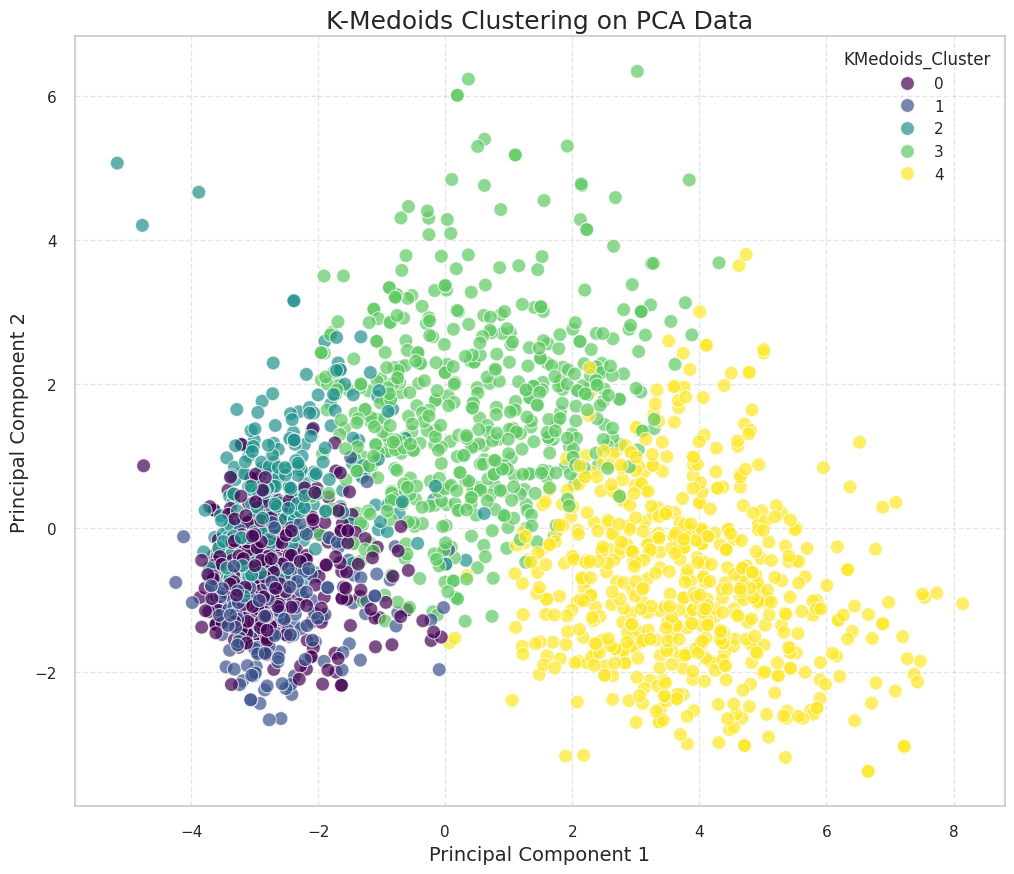

In [64]:
# Set plot size for better visibility
plt.figure(figsize=(12, 10))

# Create scatter plot using Seaborn
sns.scatterplot(
    x=data_pca_df.iloc[:, 0],        # X-axis: First principal component
    y=data_pca_df.iloc[:, 1],        # Y-axis: Second principal component
    hue=data_pca_df['KMedoids_Cluster'],  # Color points by cluster labels
    palette='viridis',               # Color palette
    s=100,                           # Marker size
    alpha=0.7,                       # Marker transparency
    edgecolor='w'                    # White edge color for markers
)

# Set title and labels with adjusted font sizes
plt.title('K-Medoids Clustering on PCA Data', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

### **Cluster Profiling**

In [65]:
# Calculate cluster-wise means for numerical columns
cluster_profile_KMedoids = data_model.groupby('KMedoids_Cluster').mean()

# Display the cluster profile
print(cluster_profile_KMedoids)


                        Income    Recency    MntWines  MntFruits  \
KMedoids_Cluster                                                   
0                 37642.354680  67.273399   38.512315   3.879310   
1                 31985.957746  27.580986   28.457746   4.549296   
2                 31489.115016  45.619808   49.536741   7.910543   
3                 56617.699647  47.270318  439.203180  19.010601   
4                 74868.045886  50.273734  610.642405  66.362342   

                  MntMeatProducts  MntFishProducts  MntSweetProducts  \
KMedoids_Cluster                                                       
0                       19.460591         5.285714          4.295567   
1                       18.419014         7.489437          4.760563   
2                       31.693291        10.875399          7.594249   
3                      120.340989        23.899293         19.222615   
4                      431.365506        97.515823         68.667722   

                  

In [66]:
# Calculate cluster-wise means for all variables in data_pca
cluster_profile_KMedoids = data_pca_df.groupby('KMedoids_Cluster').mean()

# Display the cluster profile
print(cluster_profile_KMedoids)

                         0         1         2         3         4         5  \
KMedoids_Cluster                                                               
0                -2.706197 -0.655347 -0.510090 -0.185201 -0.632188 -0.291924   
1                -2.746728 -1.075890  0.280597  0.268915  0.766824 -0.084826   
2                -2.560175  0.399142  0.930427  0.248482  0.010939  0.486600   
3                 0.496370  1.605582 -0.432096 -0.057099  0.101888 -0.033925   
4                 3.796165 -0.731119  0.127769 -0.073793 -0.035130  0.015044   

                         6         7         8         9        10        11  \
KMedoids_Cluster                                                               
0                -0.260373  0.052880  0.025329 -0.029941 -0.085889  0.008981   
1                 0.290821  0.147197  0.071785  0.204136  0.000264  0.011059   
2                -0.193035 -0.270667 -0.042039 -0.111040  0.154525 -0.021328   
3                 0.272926  0.122847 -0

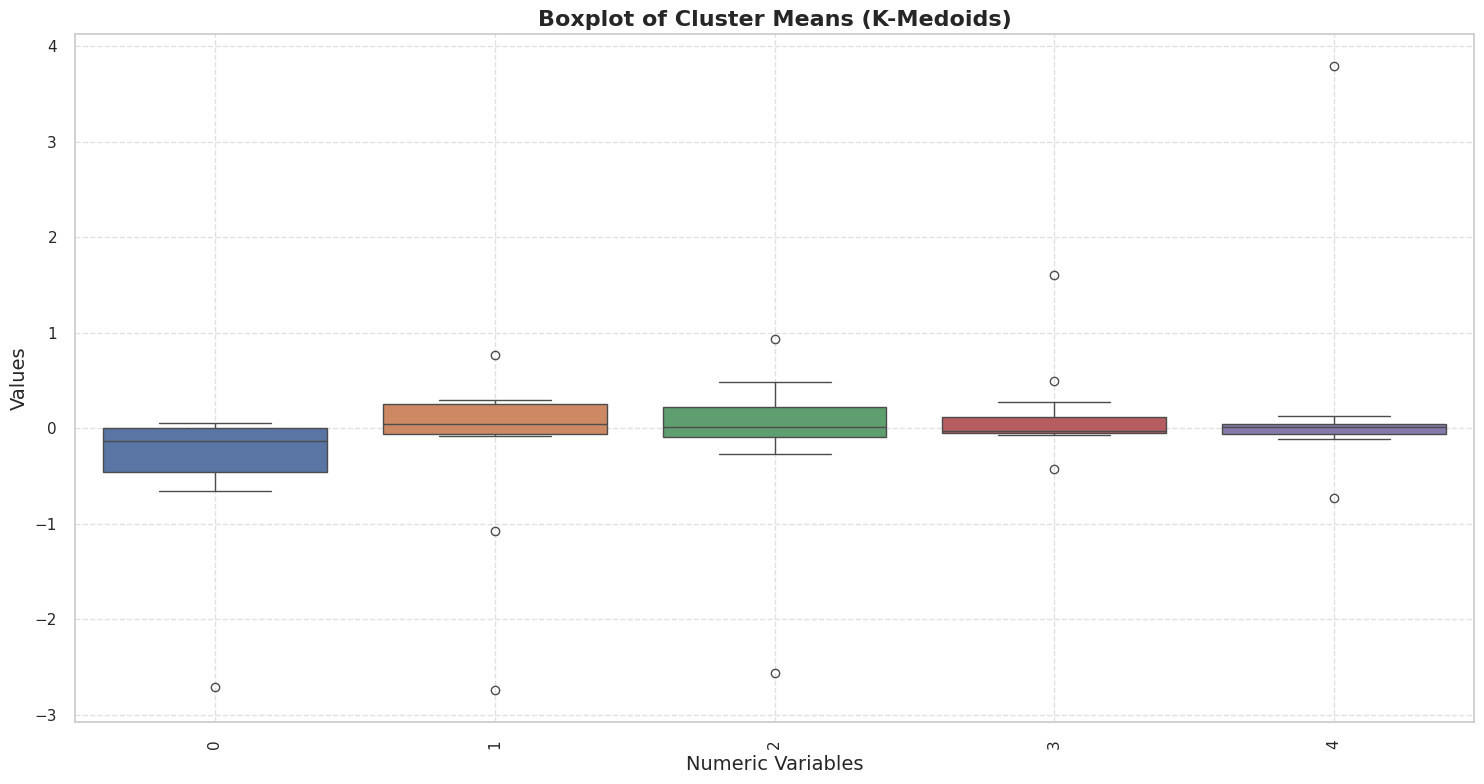

In [67]:
# Transpose the cluster means DataFrame for better visualization
cluster_means_transposed = cluster_profile_KMedoids.T

# Set up the plot
plt.figure(figsize=(15, 8))  # Adjust the size of the figure

# Create the boxplot
sns.boxplot(data=cluster_means_transposed)

# Customize plot appearance
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Boxplot of Cluster Means (K-Medoids)', fontsize=16, weight='bold')  # Add a title with bold font
plt.xlabel('Numeric Variables', fontsize=14)  # Label for x-axis
plt.ylabel('Values', fontsize=14)  # Label for y-axis

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()  # Adjust layout to fit elements within the figure area
plt.show()

###**Observations, Insights, and Cluster Characteristics:**
#### **Cluster Characteristics:**
The K-Medoids algorithm produced 5 clusters with the following characteristics:
* Cluster 0: Lower income, high recency, low spending across all categories, lower total purchases. Represents a group with low spending and high recency, possibly indicating less engaged or newer customers.
* Cluster 1: Even lower income, very high recency, very low spending across categories, lowest total purchases. Shows even lower spending and higher recency, suggesting very low engagement.
* Cluster 2: Similar income to Cluster 1, moderate spending, higher engagement, and moderate purchases. More moderate in spending and engagement, possibly representing an average or middle group.
* Cluster 3: Higher income, moderate recency, significantly higher spending, higher total purchases. Higher spending and engagement, indicating more active or loyal customers.
* Cluster 4: Highest income, moderate recency, highest spending across all categories, and highest total purchases. The highest spending and engagement, representing a premium customer segment.
* Observation: The clusters appear to capture different levels of income and spending behavior. Cluster 4, for example, represents the highest income group with the highest spending, while Cluster 1 represents a lower income group with minimal spending.

### **K-Medoids Performance**
#### **Performance:**
* Low Score: The silhouette score of 0.111 is very low, indicating that the clusters identified by the K-Medoids algorithm are not well-defined or well-separated. A score this low typically suggests that data points are not clearly assigned to distinct clusters, with many points possibly lying near the boundaries between clusters.
* Underwhelming Performance: The K-Medoids algorithm did not perform well, as evidenced by the low silhouette score. The clusters identified do not appear to be well-separated, and the data points within each cluster may not be very similar to each other.
* Potential Overlap: The characteristics of the clusters suggest that there may be significant overlap in customer behavior, with the algorithm struggling to find clear boundaries between different customer segments.
* This low score suggests that the clustering is not very effective, with significant overlap between clusters or ambiguity in the cluster assignments. The clusters may not be capturing meaningful subgroups within the data.

#### **Potential Improvements:**
* **Reevaluate Features:** Consider whether the features used are appropriate for clustering and whether additional feature engineering could help.
* **Hyperparameter Tuning:** Experiment with different numbers of clusters or other hyperparameters to see if performance improves.
* **Data Preprocessing:** Re-evaluate the data preprocessing steps to ensure noise and dimensionality are reduced as much as possible.

In [68]:
# Define a list of DataFrames to process
dataframes = [df, data_pca_df, data_model]

# Iterate over each DataFrame and drop the 'KMedoids_Cluster' column if it exists
for df in dataframes:
    if 'KMedoids_Cluster' in df.columns:
        df.drop('KMedoids_Cluster', axis=1, inplace=True)

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

In [69]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# Initialize variables to track highest cophenetic correlation and corresponding metrics
highest_cophenetic_corr = -float('inf')  # Start with a very low value
best_distance_metric = None
best_linkage_method = None

# Iterate over each combination of distance metric and linkage method
for distance_metric in distance_metrics:
    for linkage_method in linkage_methods:
        # Perform hierarchical clustering
        Z = linkage(data_pca, metric=distance_metric, method=linkage_method)

        # Calculate cophenetic correlation
        cophenetic_corr, _ = cophenet(Z, pdist(data_pca))

        # Print the cophenetic correlation for the current combination
        print(
            f"Cophenetic correlation for '{distance_metric.capitalize()}' distance and '{linkage_method}' linkage is {cophenetic_corr:.3f}."
        )

        # Update the highest cophenetic correlation and corresponding metrics
        if cophenetic_corr > highest_cophenetic_corr:
            highest_cophenetic_corr = cophenetic_corr
            best_distance_metric = distance_metric
            best_linkage_method = linkage_method

# Print the best combination with the highest cophenetic correlation
print(
    f"Highest cophenetic correlation is {highest_cophenetic_corr:.3f}, "
    f"obtained with '{best_distance_metric.capitalize()}' distance metric and '{best_linkage_method}' linkage method."
)

Cophenetic correlation for 'Euclidean' distance and 'single' linkage is 0.761.
Cophenetic correlation for 'Euclidean' distance and 'complete' linkage is 0.720.
Cophenetic correlation for 'Euclidean' distance and 'average' linkage is 0.783.
Cophenetic correlation for 'Chebyshev' distance and 'single' linkage is 0.744.
Cophenetic correlation for 'Chebyshev' distance and 'complete' linkage is 0.708.
Cophenetic correlation for 'Chebyshev' distance and 'average' linkage is 0.758.
Cophenetic correlation for 'Mahalanobis' distance and 'single' linkage is 0.737.
Cophenetic correlation for 'Mahalanobis' distance and 'complete' linkage is 0.635.
Cophenetic correlation for 'Mahalanobis' distance and 'average' linkage is 0.742.
Cophenetic correlation for 'Cityblock' distance and 'single' linkage is 0.771.
Cophenetic correlation for 'Cityblock' distance and 'complete' linkage is 0.595.
Cophenetic correlation for 'Cityblock' distance and 'average' linkage is 0.804.
Highest cophenetic correlation is 

Cophenetic correlation for 'Euclidean' distance and 'single' linkage is 0.761.
Cophenetic correlation for 'Euclidean' distance and 'complete' linkage is 0.720.
Cophenetic correlation for 'Euclidean' distance and 'average' linkage is 0.783.
Cophenetic correlation for 'Chebyshev' distance and 'single' linkage is 0.744.
Cophenetic correlation for 'Chebyshev' distance and 'complete' linkage is 0.708.
Cophenetic correlation for 'Chebyshev' distance and 'average' linkage is 0.758.
Cophenetic correlation for 'Mahalanobis' distance and 'single' linkage is 0.737.
Cophenetic correlation for 'Mahalanobis' distance and 'complete' linkage is 0.635.
Cophenetic correlation for 'Mahalanobis' distance and 'average' linkage is 0.742.
Cophenetic correlation for 'Cityblock' distance and 'single' linkage is 0.771.
Cophenetic correlation for 'Cityblock' distance and 'complete' linkage is 0.595.
Cophenetic correlation for 'Cityblock' distance and 'average' linkage is 0.804.


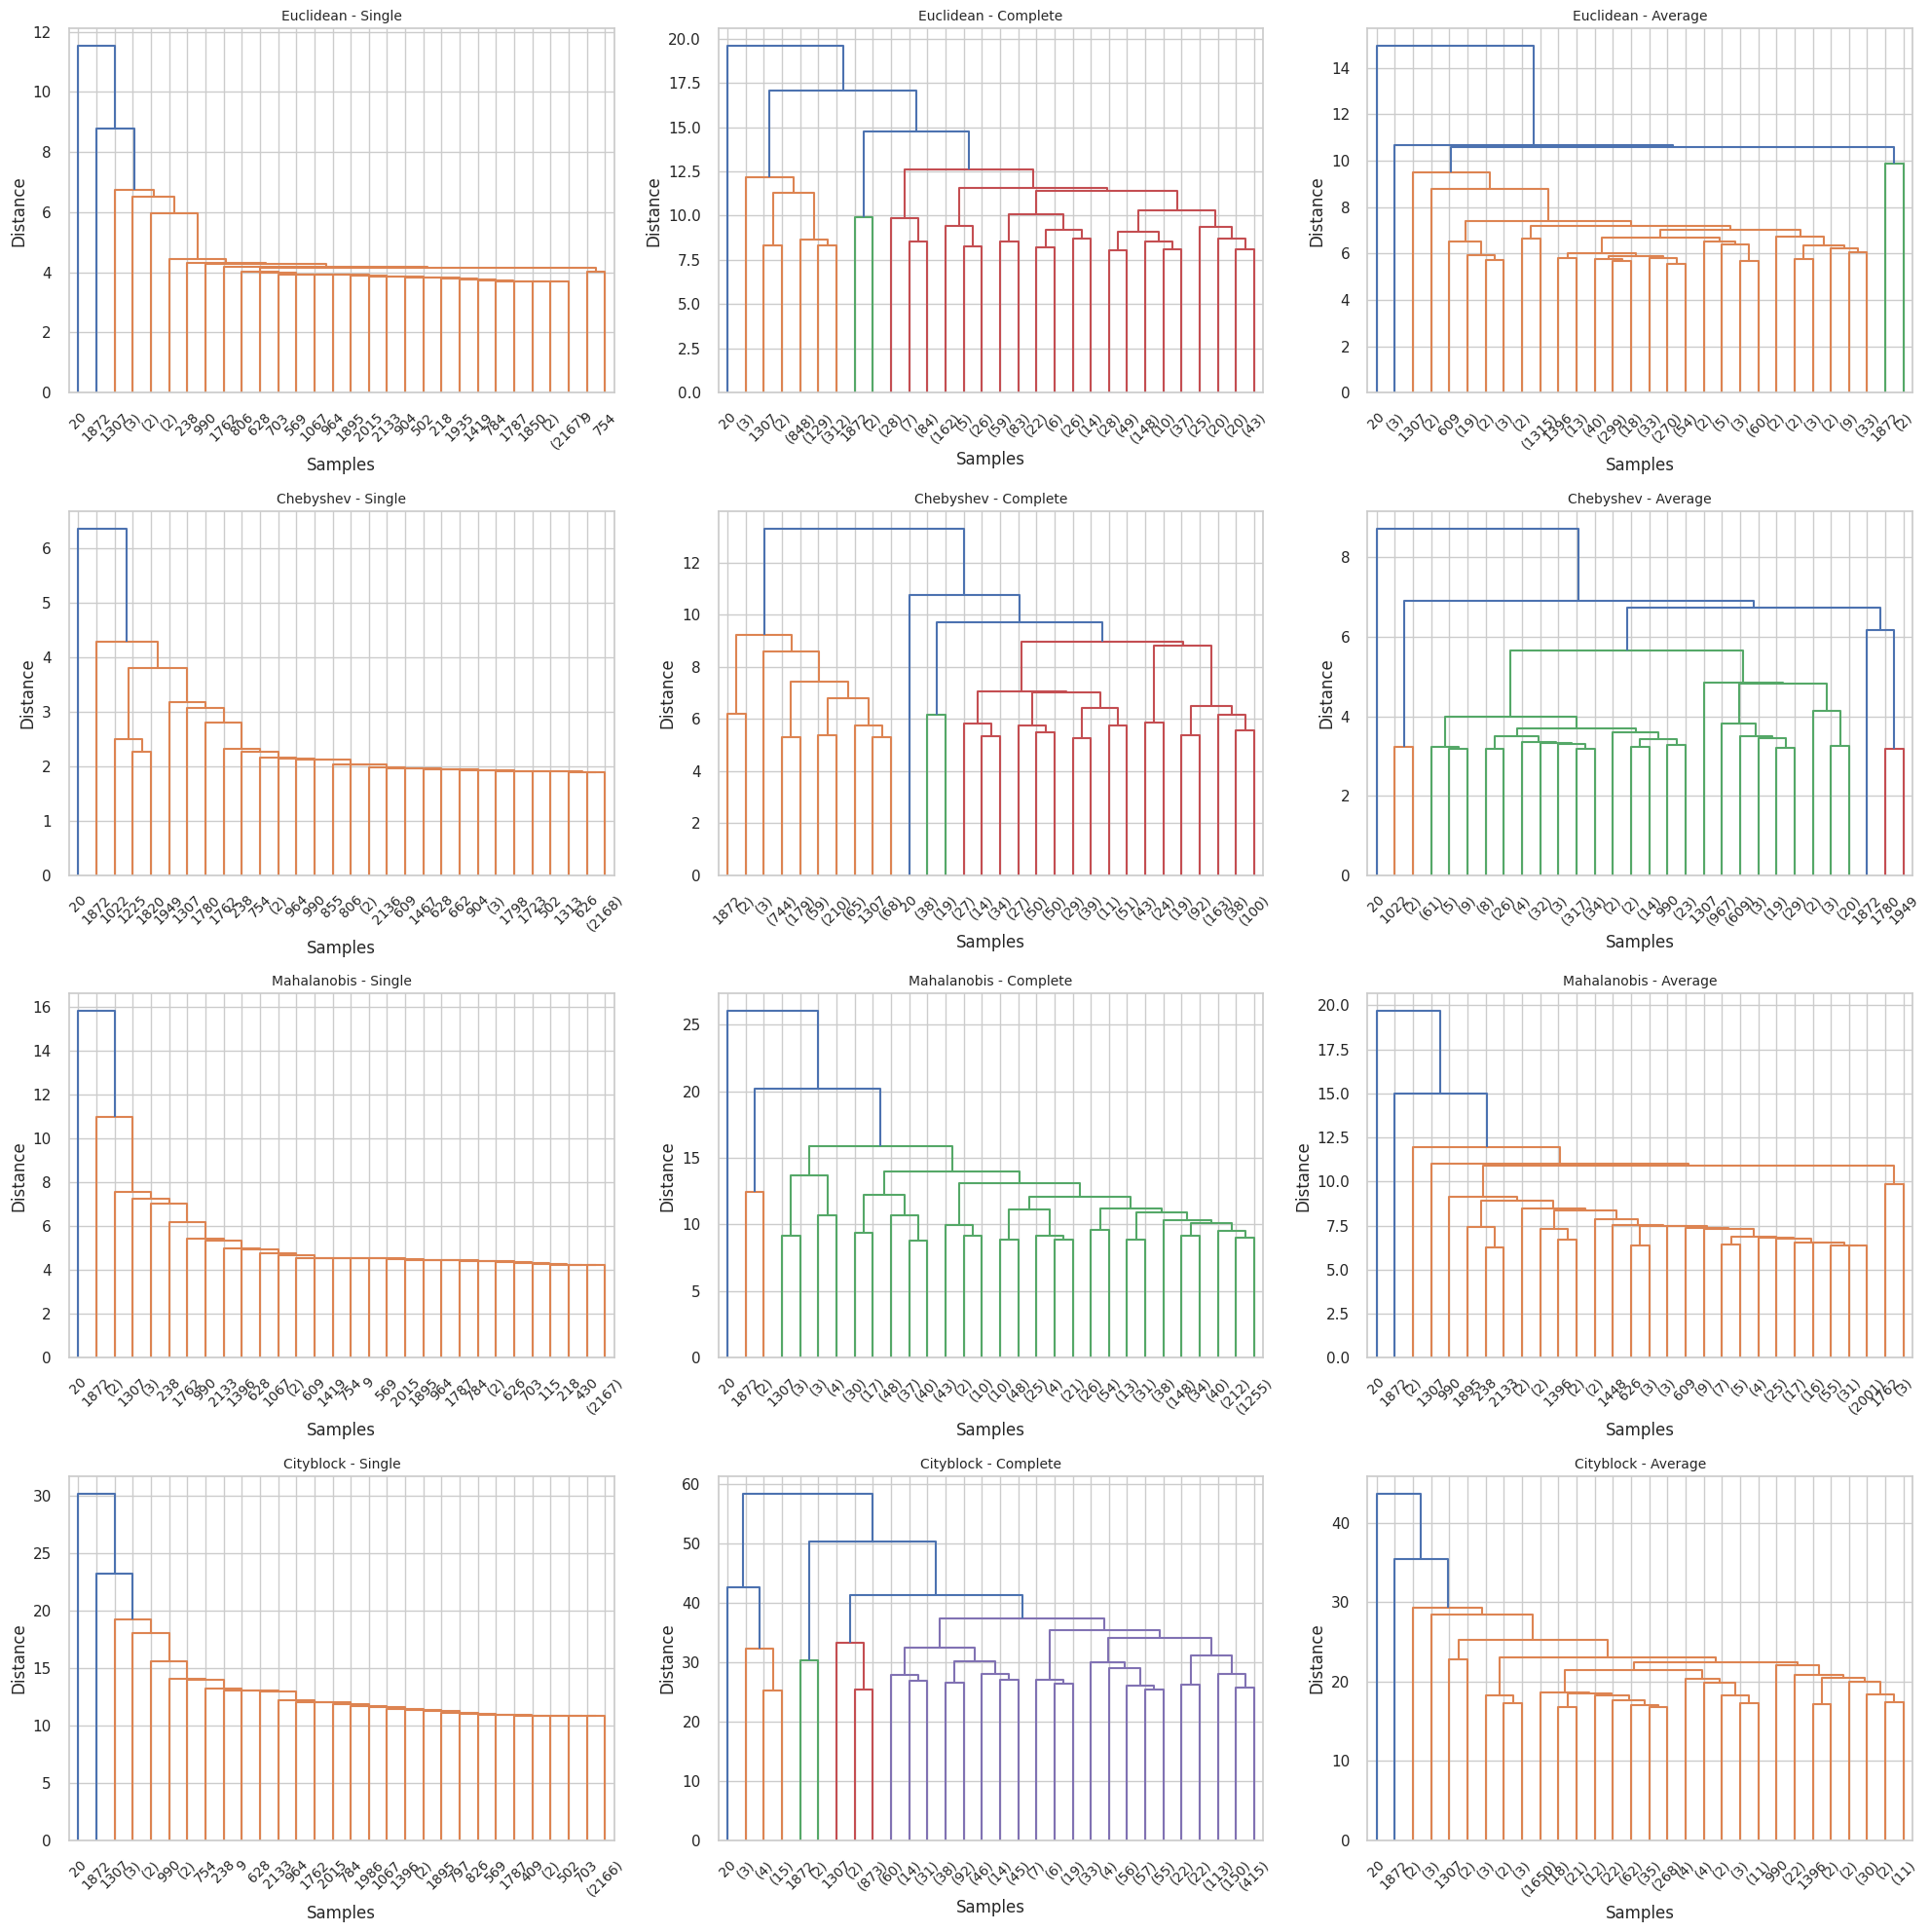

Highest cophenetic correlation is 0.804, obtained with 'Cityblock' distance metric and 'average' linkage method.


In [70]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# Initialize variables to track highest cophenetic correlation and corresponding metrics
highest_cophenetic_corr = -float('inf')  # Start with a very low value
best_distance_metric = None
best_linkage_method = None

# Create a subplot grid: len(distance_metrics) rows and len(linkage_methods) columns
fig, axs = plt.subplots(len(distance_metrics), len(linkage_methods), figsize=(20, 20))

# Iterate over each combination of distance metric and linkage method
for i, distance_metric in enumerate(distance_metrics):
    for j, linkage_method in enumerate(linkage_methods):
        try:
            # Perform hierarchical clustering
            Z = linkage(data_pca, metric=distance_metric, method=linkage_method)

            # Calculate cophenetic correlation
            cophenetic_corr, _ = cophenet(Z, pdist(data_pca))

            # Print the cophenetic correlation for the current combination
            print(f"Cophenetic correlation for '{distance_metric.capitalize()}' distance and '{linkage_method}' linkage is {cophenetic_corr:.3f}.")

            # Update the highest cophenetic correlation and corresponding metrics
            if cophenetic_corr > highest_cophenetic_corr:
                highest_cophenetic_corr = cophenetic_corr
                best_distance_metric = distance_metric
                best_linkage_method = linkage_method

            # Create dendrogram plot with truncated depth
            dendrogram(Z, ax=axs[i, j], truncate_mode='lastp', p=30)  # Limit to 30 clusters
            axs[i, j].set_title(f"{distance_metric.capitalize()} - {linkage_method.capitalize()}", fontsize=10)
            axs[i, j].set_xlabel('Samples')
            axs[i, j].set_ylabel('Distance')
        except Exception as e:
            print(f"Error with {distance_metric} distance and {linkage_method} linkage: {e}")
            axs[i, j].set_visible(False)  # Hide the plot if there's an error

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print the best combination with the highest cophenetic correlation
print(
    f"Highest cophenetic correlation is {highest_cophenetic_corr:.3f}, "
    f"obtained with '{best_distance_metric.capitalize()}' distance metric and '{best_linkage_method}' linkage method."
)

##**Observations and Insights**
###**Overall Trends:**
* The cophenetic correlation values range from 0.595 to 0.804, which indicates a moderate to strong relationship between the original data distances and the distances represented by the dendrogram.
* Higher cophenetic correlations suggest better cluster representations, while lower correlations indicate that the hierarchical clustering does not capture the data structure as effectively.

###**Best Performing Method:**
* The highest cophenetic correlation (0.804) is achieved using the Cityblock distance metric with the average linkage method. This combination most accurately preserves the original distances in the dendrogram, making it the best choice among the options evaluated for this specific dataset.
* Cityblock (Manhattan) Distance: This distance metric calculates the sum of the absolute differences between points, which can be more robust to outliers and may better capture the structure of the data in certain contexts.
* Average Linkage: This method merges clusters based on the average distance between all pairs of points in the two clusters. It often provides a good balance between single and complete linkage methods, avoiding the extremes of chaining (single linkage) and large cluster merging (complete linkage).

###**Other Notable Results:**
* Euclidean Distance with Average Linkage: The second-highest cophenetic correlation is 0.783, obtained with Euclidean distance and average linkage. This suggests that the average linkage method generally works well across different distance metrics.
* Chebyshev and Mahalanobis Distances: Both metrics showed slightly lower cophenetic correlations, indicating that they might not be as effective for this dataset when combined with the linkage methods tested. However, Chebyshev distance combined with average linkage still performed reasonably well with a cophenetic correlation of 0.758.
* Complete Linkage: In general, complete linkage showed lower cophenetic correlations compared to average and single linkage, indicating that it may not be as effective in capturing the structure of the data for this specific dataset.

###**Implications for Clustering:**
* Cityblock Distance with Average Linkage is likely the most reliable combination for hierarchical clustering on this dataset, as it best preserves the original data structure.
* Euclidean and Average Linkage also performs well and might be a good alternative, especially if Euclidean distance is more interpretable or relevant for the specific application.
* Complete Linkage methods generally underperformed, suggesting that this method may not be well-suited for this dataset, as it tends to merge clusters that might be more distant from each other, leading to less accurate clustering.
Conclusion:
* The results indicate that for dataset, the Cityblock distance combined with average linkage provides the most faithful representation of the original data structure when performing hierarchical clustering. This method should be preferred if the goal is to accurately reflect the underlying distances in the clustering process.

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?

  * **Yes, each method has clear vertical lines where the cuts should be made.**

- What is the next step in obtaining number of clusters based on the dendrogram?

  * **Determine which method produces the best dendrogram for the analysis. Use additional analytic methods to verify the appropriate cluster amount.**

- Are there any distinct clusters in any of the dendrograms?

  * **Based on the Cityblock method, there are two distinct clusters.**

In [71]:
# Initialize Agglomerative Clustering with affinity (distance) as 'euclidean', linkage as 'ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit on data_pca
HCmodel.fit(data_pca)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [72]:
# Add the cluster labels to data_pca as a new column in a DataFrame
data_pca_df = pd.DataFrame(data_pca)  # Convert to DataFrame
data_pca_df['HC_labels'] = HCmodel.labels_

# Add the cluster labels to df
df['HC_labels'] = HCmodel.labels_

# Add the cluster labels to data_model
data_model['HC_labels'] = HCmodel.labels_

# Check the distribution of clusters
print(data_pca_df['HC_labels'].value_counts())  # Print from the DataFrame
print(df['HC_labels'].value_counts())
print(data_model['HC_labels'].value_counts())

HC_labels
2    913
1    645
0    643
Name: count, dtype: int64
HC_labels
2    913
1    645
0    643
Name: count, dtype: int64
HC_labels
2    913
1    645
0    643
Name: count, dtype: int64


### **Visualize the clusters using PCA**

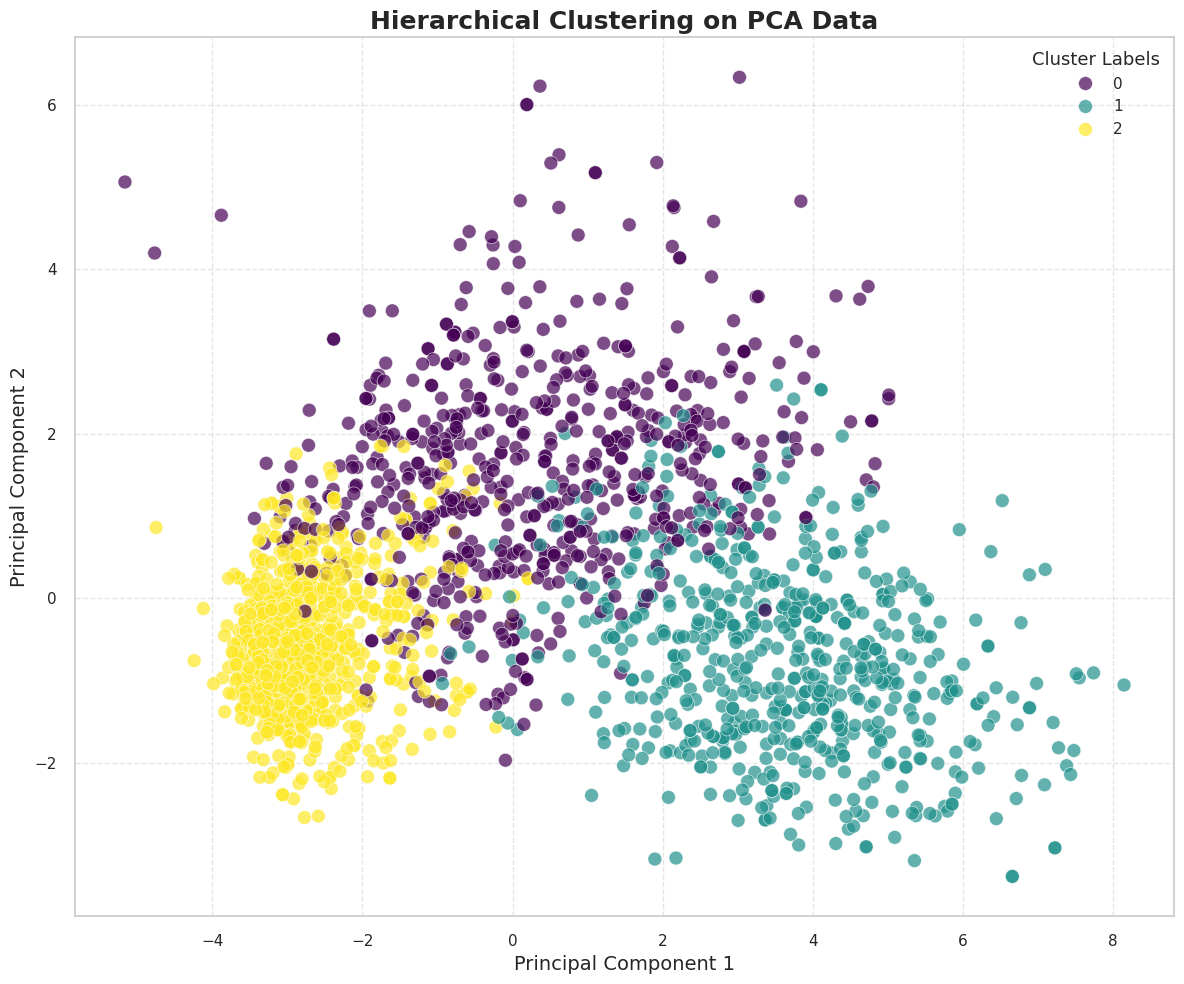

In [73]:
# Set plot size for better visibility
plt.figure(figsize=(12, 10))

# Create scatter plot using Seaborn
scatter_plot = sns.scatterplot(
    x=data_pca_df.iloc[:, 0],         # X-axis: First principal component
    y=data_pca_df.iloc[:, 1],         # Y-axis: Second principal component
    hue=data_pca_df['HC_labels'],     # Color points by cluster labels
    palette='viridis',                # Color palette
    s=100,                            # Marker size
    alpha=0.7,                        # Marker transparency
    edgecolor='w',                    # White edge color for markers
    linewidth=0.5                     # Edge width for markers
)

# Set title and labels with adjusted font sizes
plt.title('Hierarchical Clustering on PCA Data', fontsize=18, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend with a title
plt.legend(title='Cluster Labels', title_fontsize='13', fontsize='11')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()

### **Cluster Profiling**

In [74]:
# Ensure that df only contains numeric data for prediction
numeric_df = df.select_dtypes(include=['number'])

# Calculate the cluster-wise mean of all numeric variables
cluster_means = numeric_df.groupby('HC_labels').mean()

# Display the cluster means
print(cluster_means)

# Highlighting the max average value among all the clusters for each of the variables
cluster_means.style.highlight_max(color="green", axis=0)

                 Income    Recency    MntWines  MntFruits  MntMeatProducts  \
HC_labels                                                                    
0          54252.617418  45.911353  410.430793  18.239502       123.926905   
1          74191.437209  50.198450  581.510078  65.424806       411.989147   
2          33786.652793  50.442497   38.069003   4.509310        20.120482   

           MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
HC_labels                                                                       
0                24.589425         18.362364     54.315708           3.965785   
1                95.153488         67.680620     76.186047           1.401550   
2                 6.187295          4.698795     13.788609           1.800657   

           NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
HC_labels                                                            
0                 6.065319             2.872473           7.004

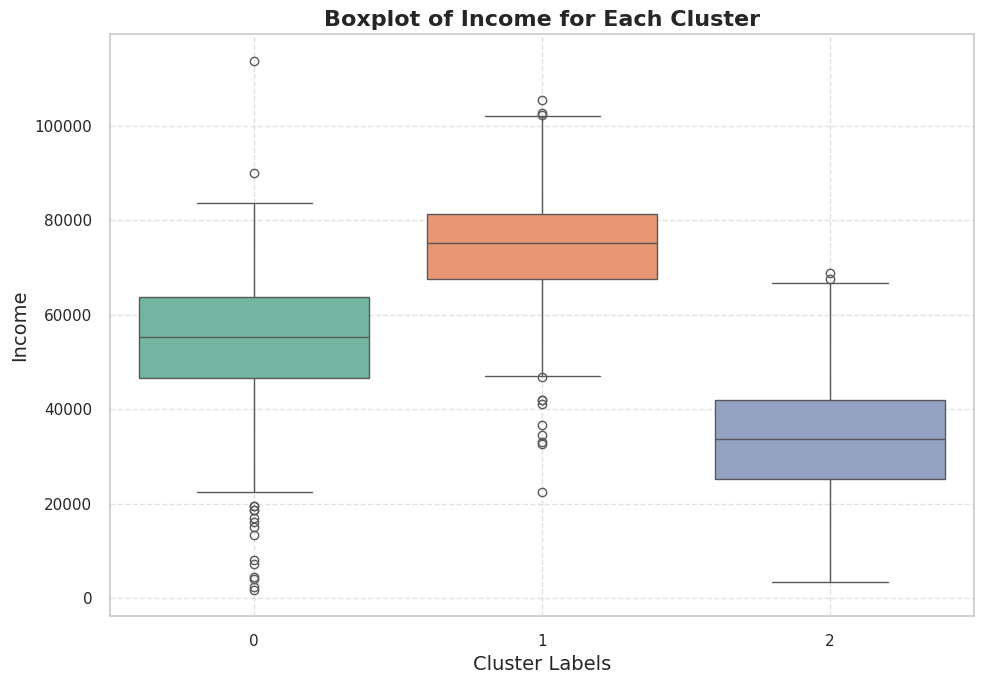

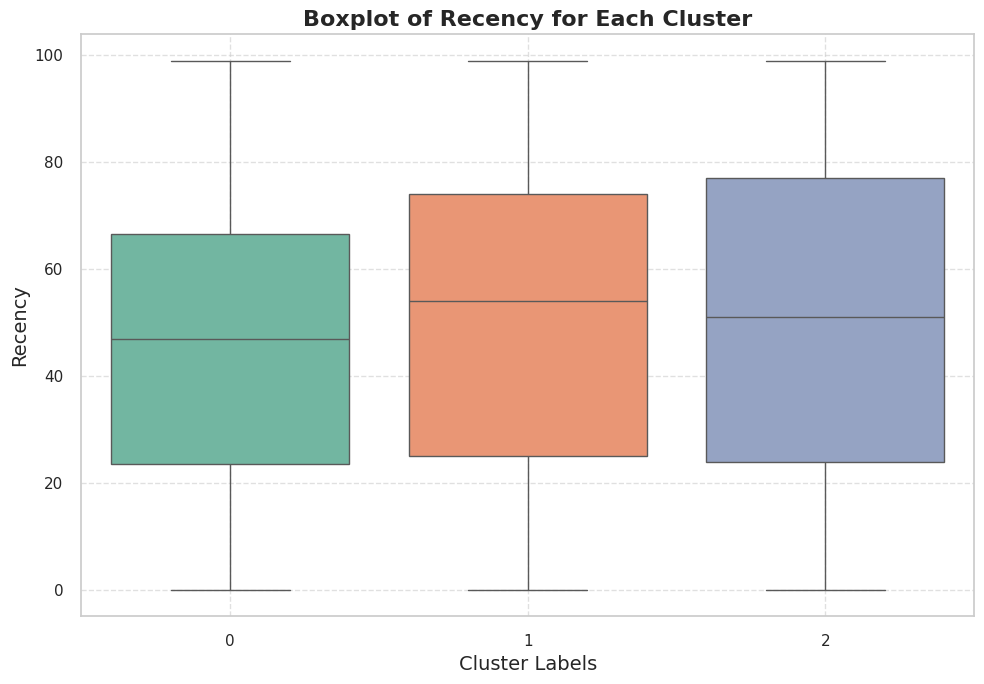

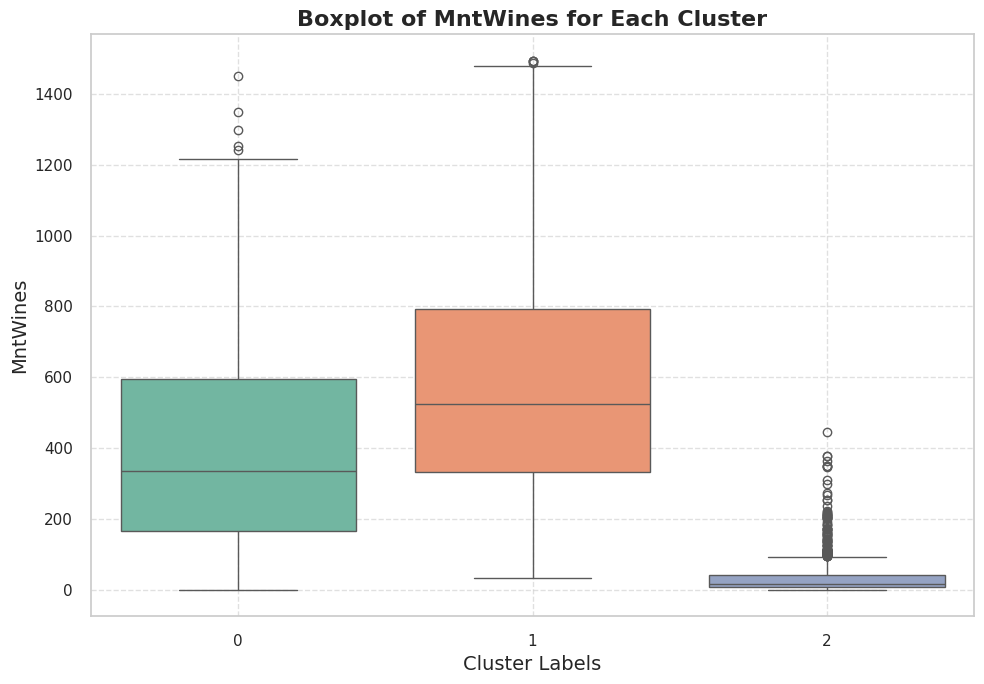

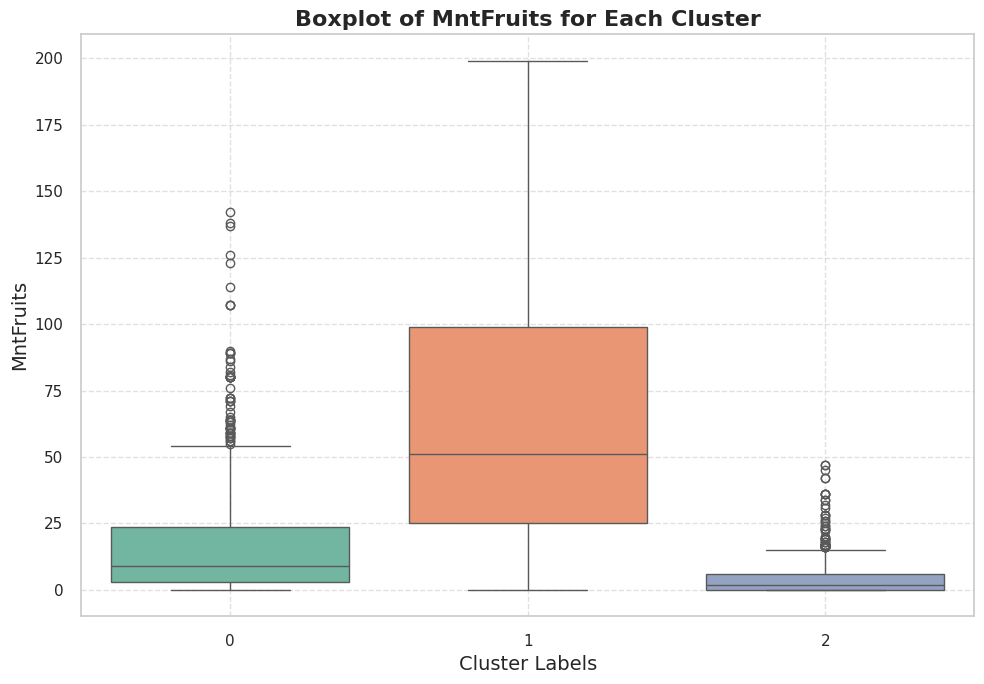

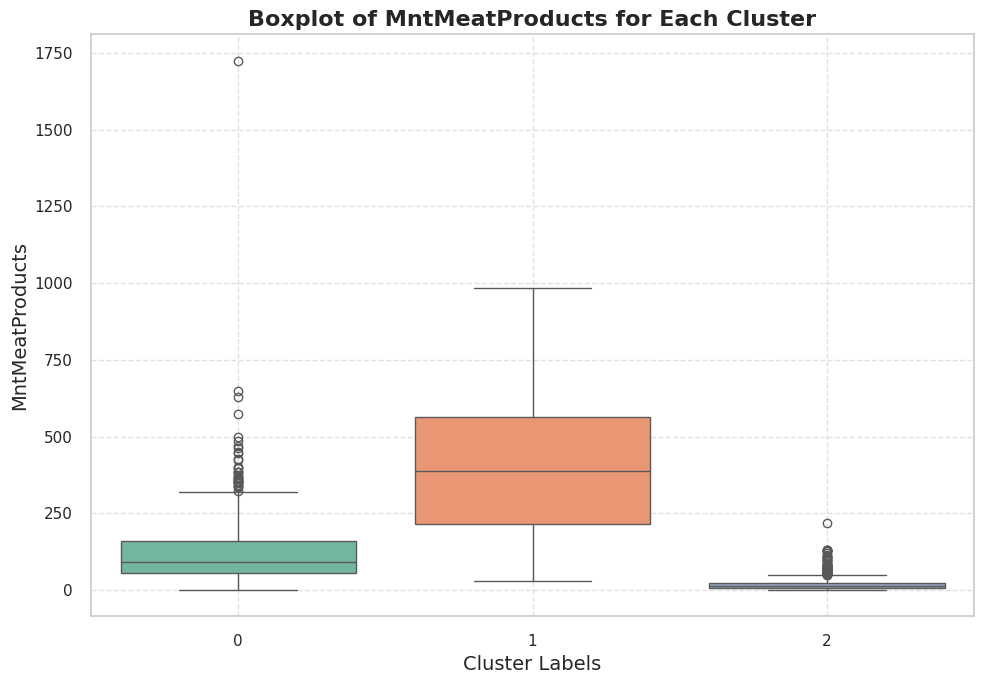

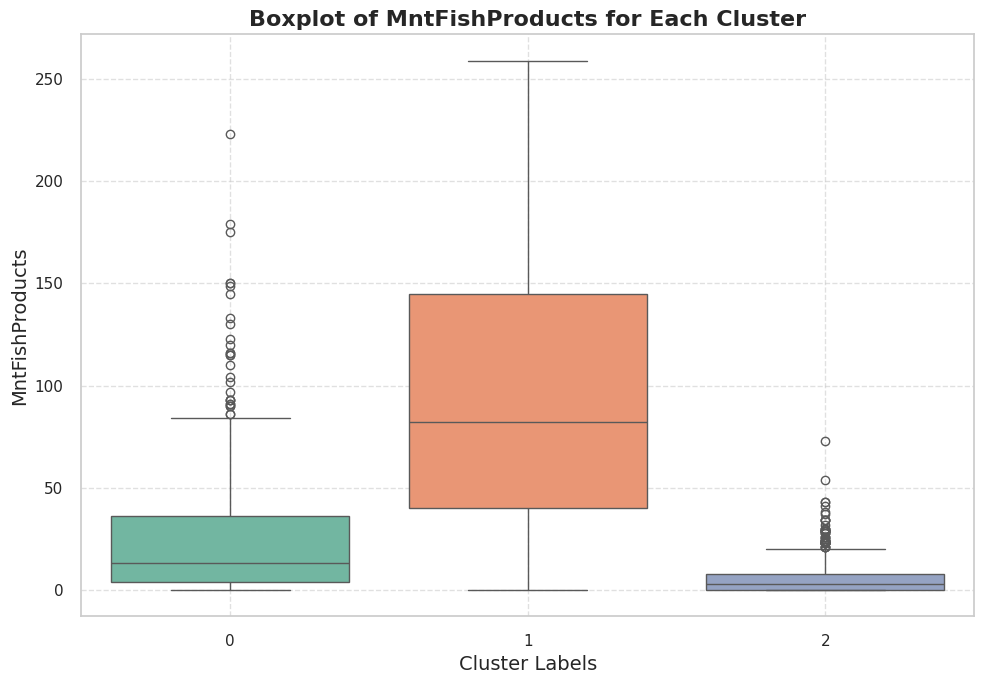

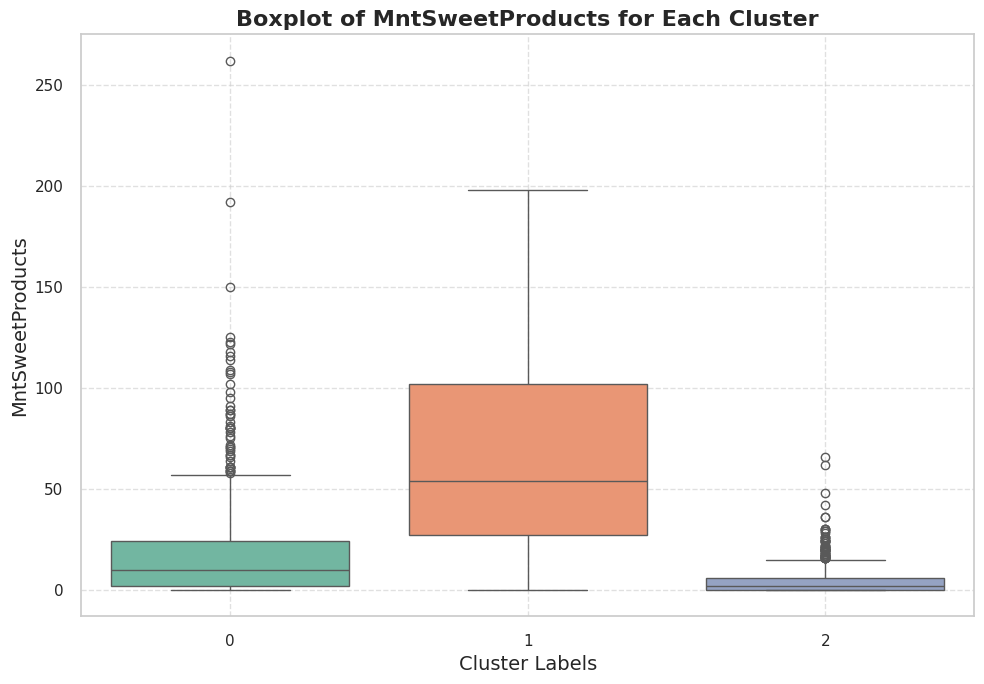

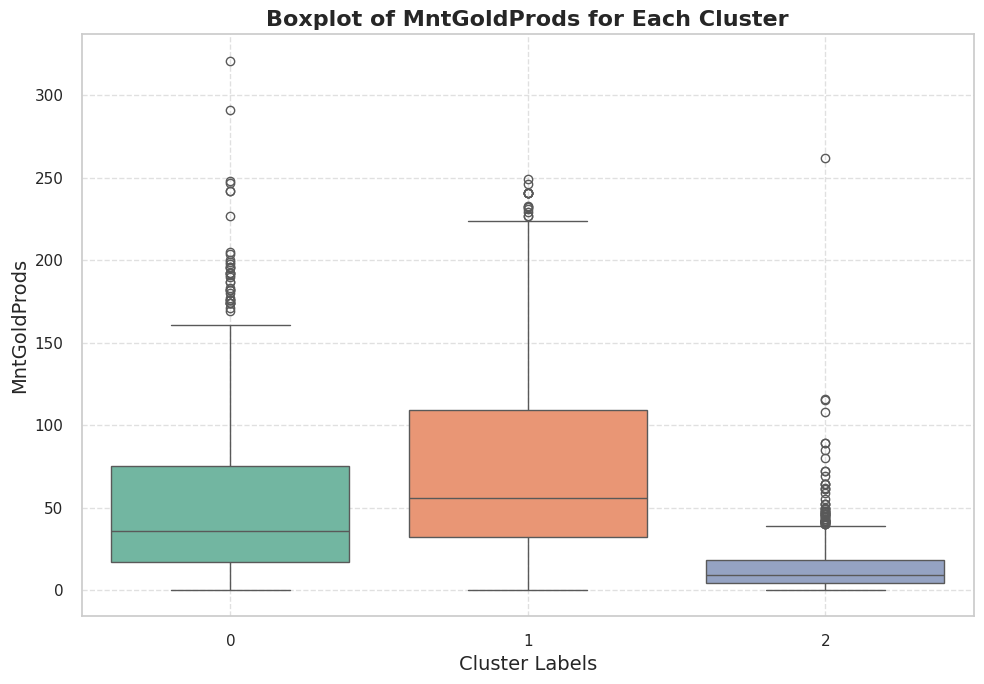

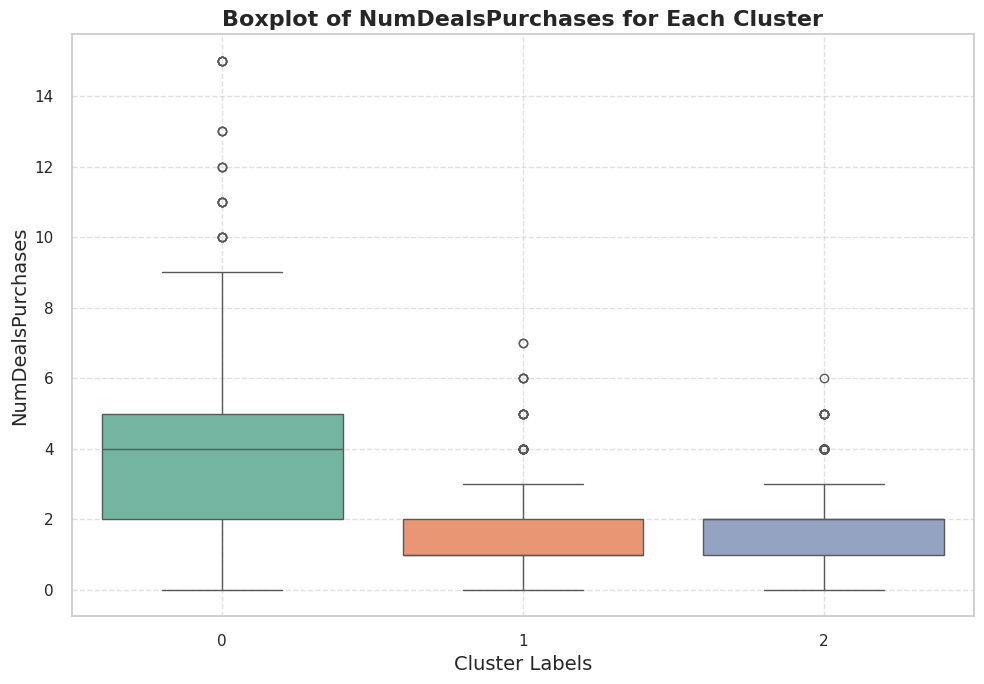

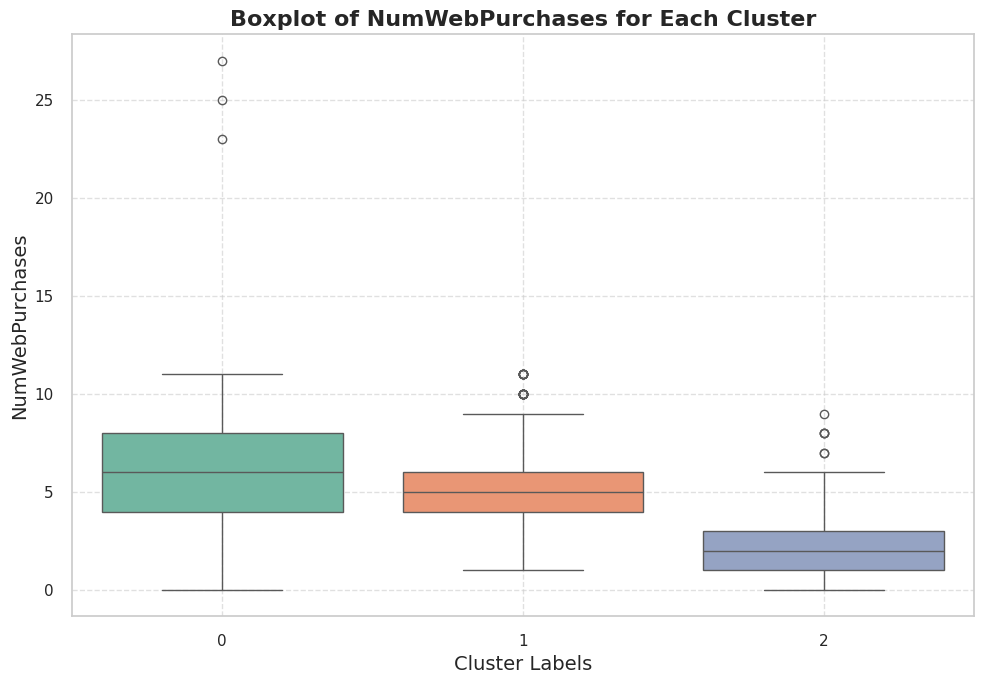

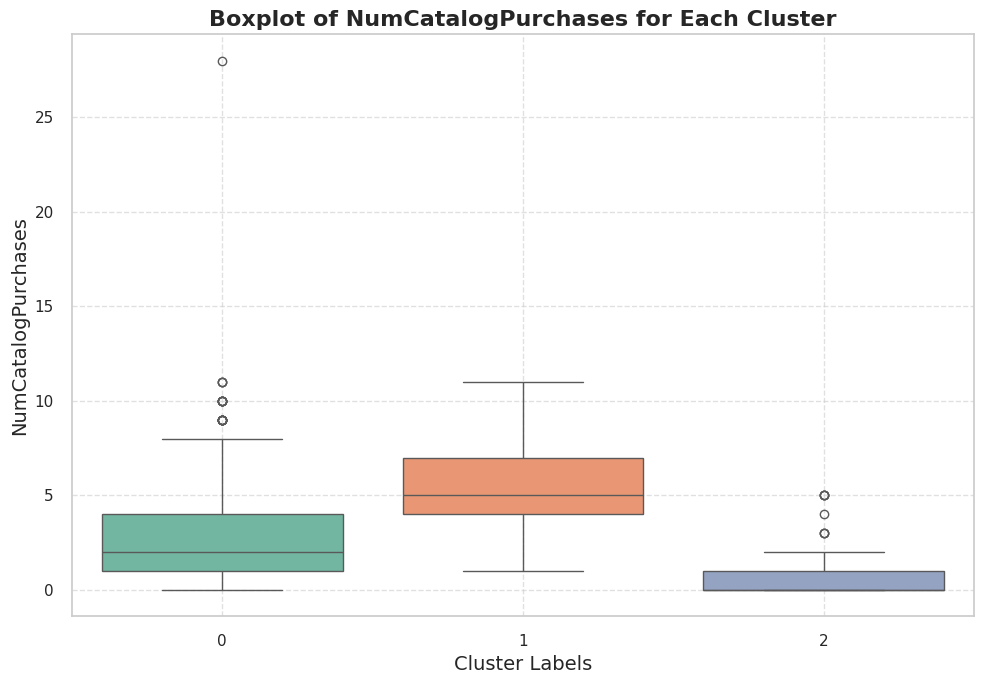

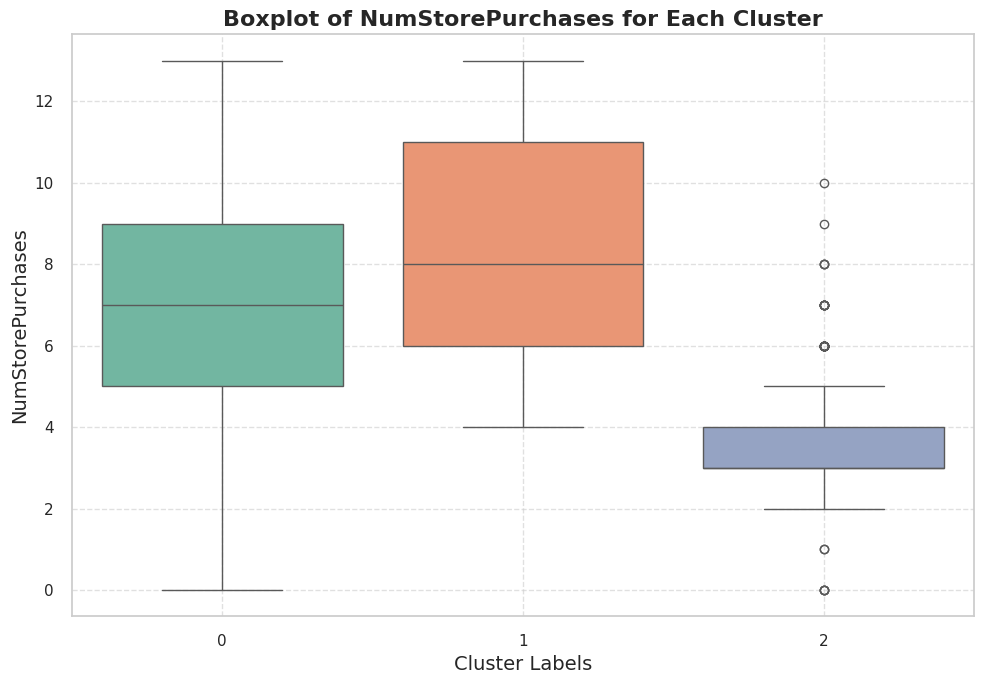

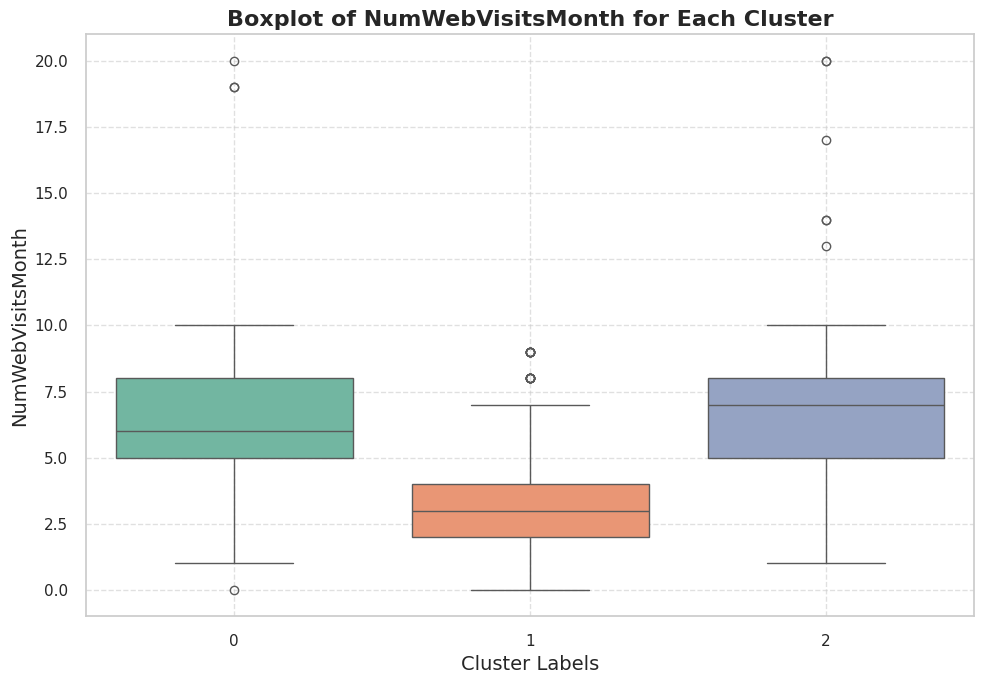

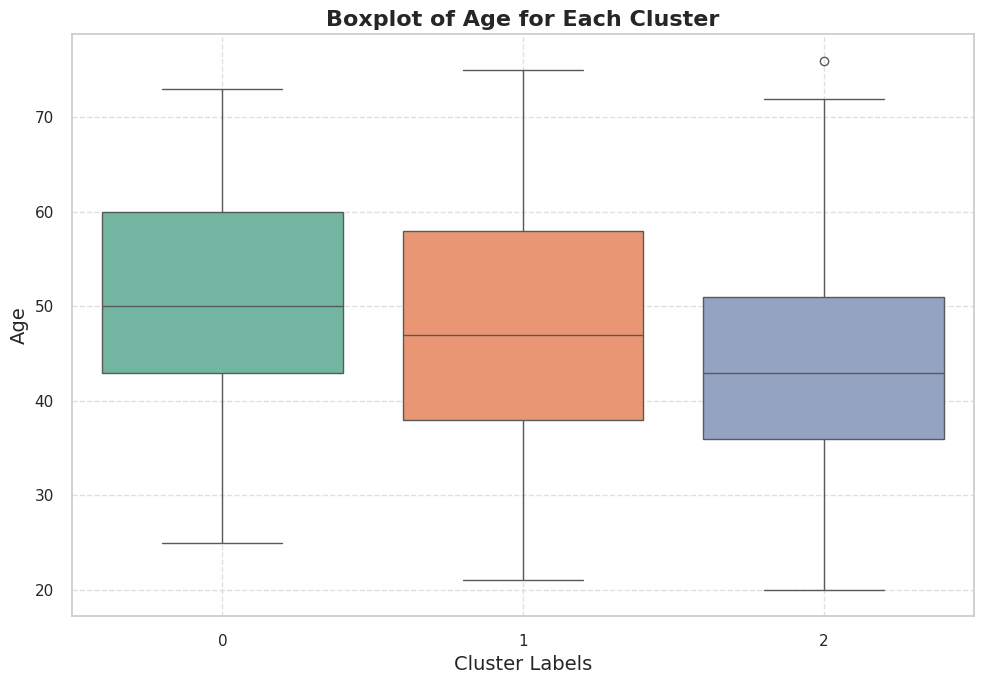

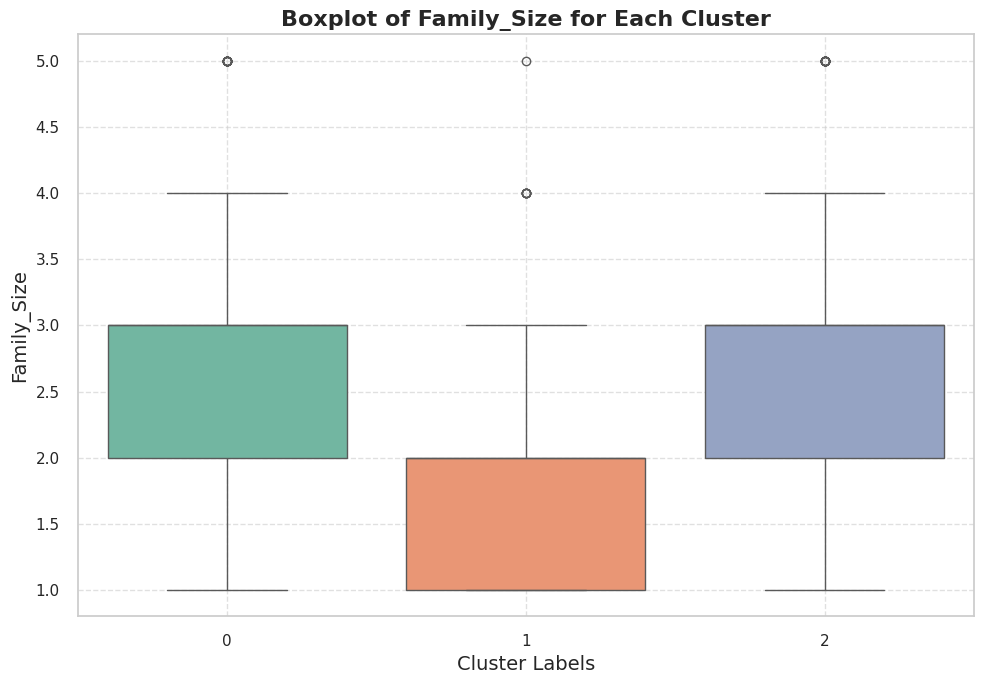

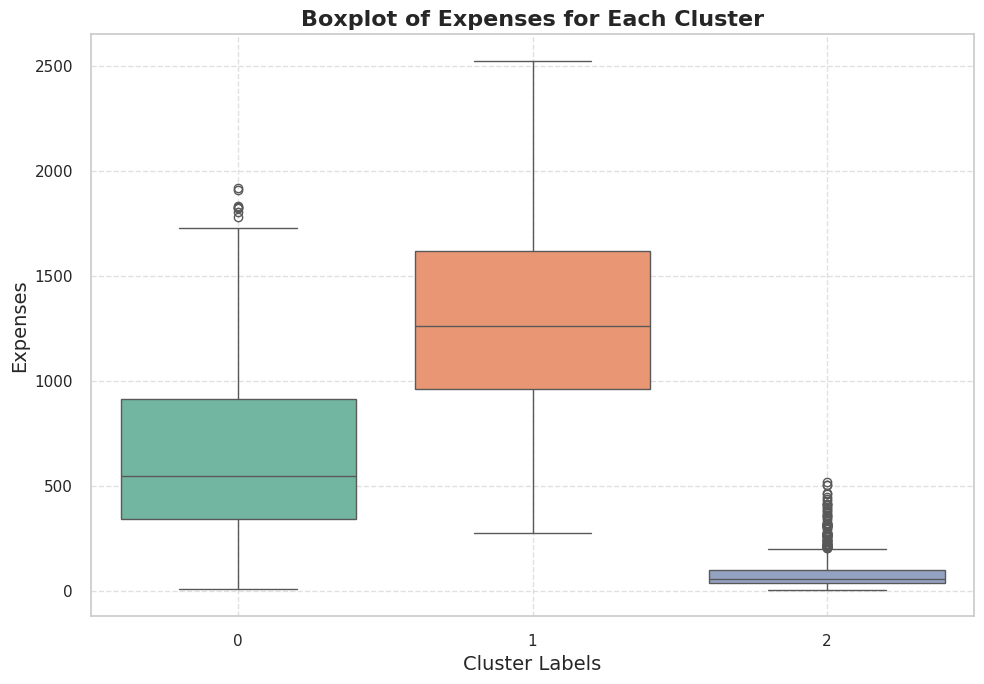

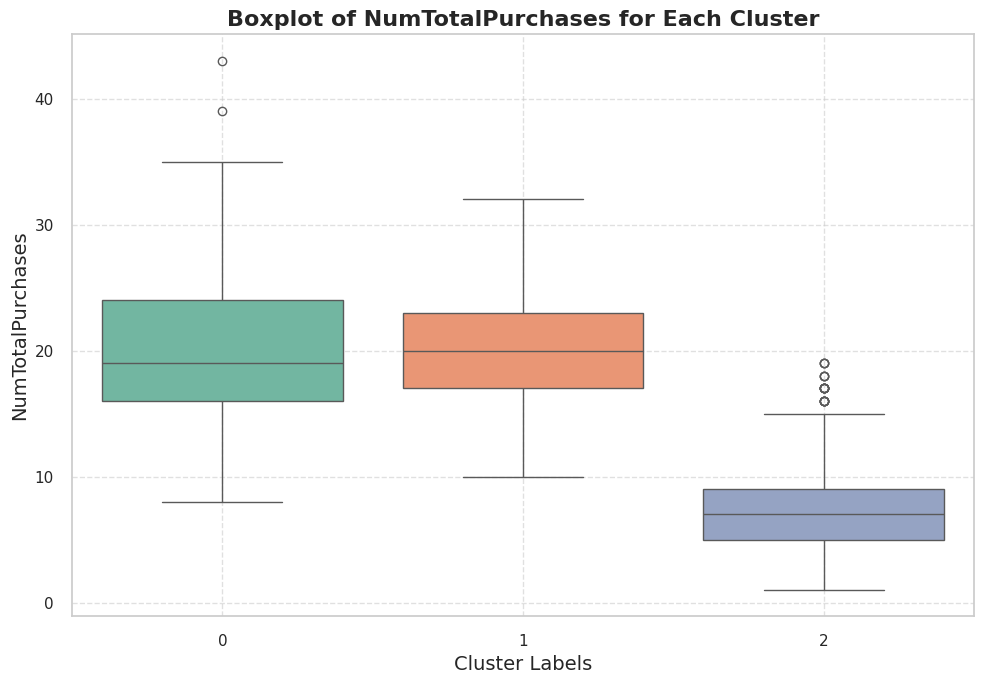

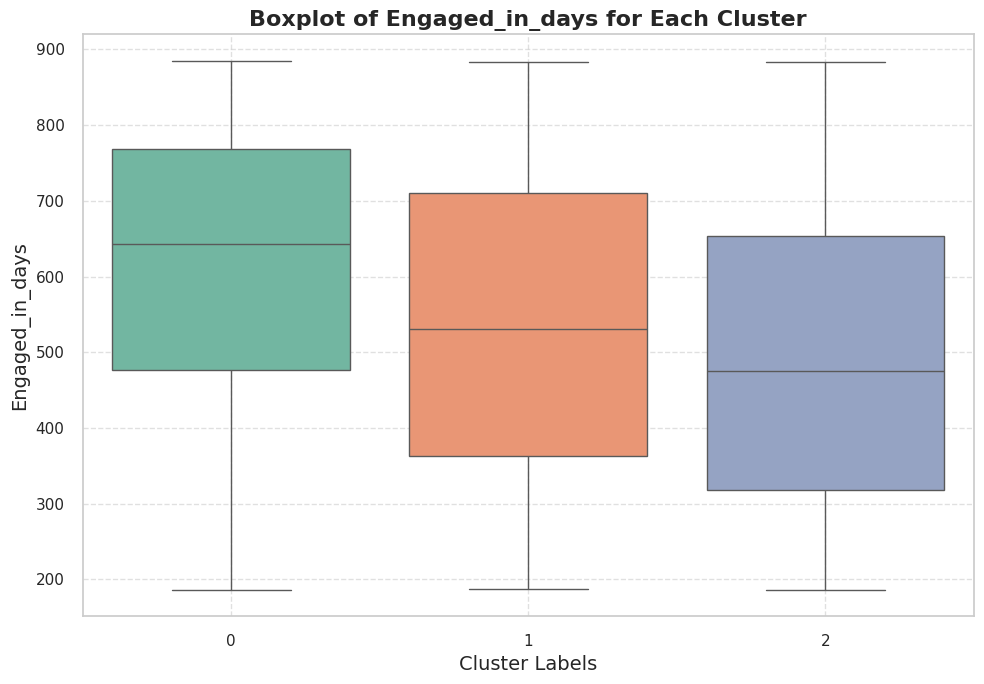

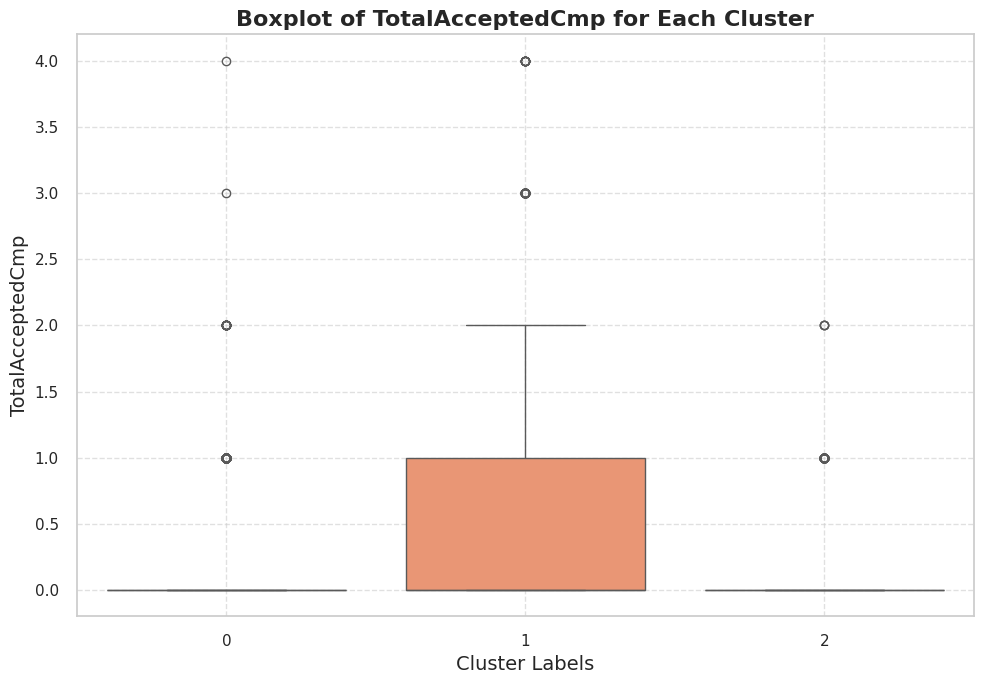

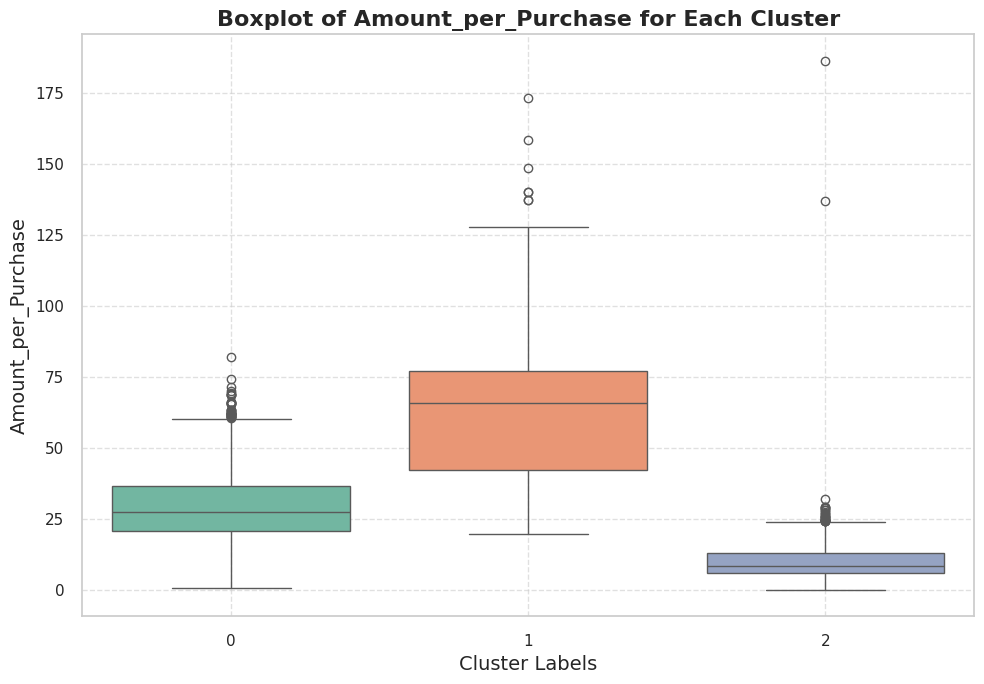

In [75]:
# Create a boxplot for each hierarchical clustering variable
for col in cluster_means.columns:
    plt.figure(figsize=(10, 7))  # Adjust figure size for better visibility
    sns.boxplot(y=df[col], x=df['HC_labels'], palette='Set2')  # Use a color palette for clusters
    plt.title(f'Boxplot of {col} for Each Cluster', fontsize=16, weight='bold')  # Set title with bold font
    plt.xlabel('Cluster Labels', fontsize=14)  # X-axis label
    plt.ylabel(col, fontsize=14)  # Y-axis label with variable name
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()

##**Observations and Insights**
###**Cluster 0:**
* Income: `$54,253` (moderate)
* Recency: 45.91 (average)

**Spending:**
* MntWines: `$410.43` (high)
* MntFruits: `$18.24` (moderate)
* MntMeatProducts: `$123.93` (moderate)
* MntFishProducts: `$24.59` (low)
* MntSweetProducts: `$18.36` (moderate)
* MntGoldProds: `$54.32` (moderate)

**Purchasing Behavior:**
* NumDealsPurchases: 3.97 (average)
* NumWebPurchases: 6.07 (high)
* NumCatalogPurchases: 2.87 (average)
* NumStorePurchases: 7.00 (high)

**Engagement:**
* NumWebVisitsMonth: 6.13 (moderate)
* Engaged_in_days: 608 (high)

**Demographics:**
* Age: 50.71 (older)
* Family_Size: 2.94 (small family)
* Expenses: `$649.86` (moderate)
* NumTotalPurchases: 19.91 (high)
* TotalAcceptedCmp: 0.24 (low)
* Amount_per_Purchase: $30.65 (moderate)

###**Cluster 1:**
* Income: `$74,191` (high)
* Recency: 50.20 (average)

**Spending:**
* MntWines: `$581.51` (high)
* MntFruits: `$65.42` (high)
* MntMeatProducts: `$411.99` (very high)
* MntFishProducts: `$95.15` (high)
* MntSweetProducts: `$67.68` (high)
* MntGoldProds: `$76.19` (high)

**Purchasing Behavior:**
* NumDealsPurchases: 1.40 (low)
* NumWebPurchases: 5.12 (average)
* NumCatalogPurchases: 5.47 (high)
* NumStorePurchases: 8.43 (high)

**Engagement:**
* NumWebVisitsMonth: 3.02 (low)
* Engaged_in_days: 535 (average)

**Demographics:**
* Age: 47.71 (middle-aged)
* Family_Size: 1.93 (small family)
* Expenses: `$1,297.94` (high)
* NumTotalPurchases: 20.42 (high)
* TotalAcceptedCmp: 0.65 (high)
* Amount_per_Purchase: `$65.68` (high)

###**Cluster 2:**
* Income: `$33,787` (low)
* Recency: `50.44` (average)

**Spending:**
* MntWines: `$38.07` (low)
* MntFruits: `$4.51` (very low)
* MntMeatProducts: `$20.12` (low)
* MntFishProducts: `$6.19` (very low)
* MntSweetProducts: `$4.70` (very low)
* MntGoldProds: `$13.79` (low)

**Purchasing Behavior:**
* NumDealsPurchases: 1.80 (low)
* NumWebPurchases: 1.99 (low)
* NumCatalogPurchases: 0.49 (very low)
* NumStorePurchases: 3.15 (low)

**Engagement:**
* NumWebVisitsMonth: 6.42 (moderate)
* Engaged_in_days: 494 (average)

**Demographics:**
* Age: 44.14 (middle-aged)
* Family_Size: 2.83 (small family)
* Expenses: `$87.37` (low)
* NumTotalPurchases: 7.44 (low)
* TotalAcceptedCmp: 0.09 (very low)
* Amount_per_Purchase: `$10.54` (low)

### **Characteristics of each cluster**

### **HC Cluster Characteristics**

**Cluster 0: Moderate Income, High Engagement**

* This cluster consists of customers with moderate incomes who have high spending on wines and store purchases but moderate spending in other categories. They are highly engaged and visit the web frequently, with a relatively high number of total purchases. They are older with small families.

**Cluster 1: High Income, Moderate Engagement**

* This cluster represents high-income customers with very high spending across all categories, especially on meat products. They make high-value purchases but tend to have fewer deals. Their engagement is moderate, with a high total expenditure and acceptance of promotions.

**Cluster 2: Low Income, Speding, and Engagement**

* This cluster includes customers with lower incomes and minimal spending across all categories. They make fewer purchases and have low engagement with promotions. Their total expenditure and acceptance of campaigns are also quite low.

###**HC Model Performance**
####**Performance**
* The HC model effectively identified three distinct customer segments with varying characteristics, as evidenced by the scatterplot and cluster profiling.
* The model successfully captured the heterogeneity in customer behavior, highlighting differences in income, spending, purchase frequency, and engagement.
* The clusters align with intuitive expectations, suggesting the model's ability to uncover meaningful patterns in the data.

####**Observations**
* **Hyperparameter Tuning:** Explore different distance metrics (e.g., Manhattan, cosine) and linkage methods (e.g., centroid, median) to potentially improve cluster separation and interpretation.
* **Cluster Validation:** Employ internal and external validation metrics (e.g., silhouette score, Calinski-Harabasz index) to assess the quality of the clustering solution and compare different model configurations.
* **Feature Engineering:** Consider creating new features or transforming existing ones to enhance the model's ability to capture relevant customer characteristics.
* **Ensemble Methods:** Explore combining multiple HC models or integrating HC with other clustering techniques to potentially improve robustness and accuracy.


In [76]:
# List of DataFrames to update
dataframes = [df, data_model, data_pca_df]

# Drop 'HC_labels' from each DataFrame
for dataframe in dataframes:
    if 'HC_labels' in dataframe.columns:
        dataframe.drop('HC_labels', axis=1, inplace=True)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [77]:
# Initialize lists to store different hyperparameter combinations and their corresponding silhouette scores
eps_values = []
min_samples_values = []
silhouette_scores = []

# Define ranges for hyperparameters
eps_range = np.arange(0.1, 2.1, 0.1)  # Epsilon values to try
min_samples_range = range(2, 11)  # Minimum samples values to try

# Iterate over different combinations of hyperparameters
for eps in eps_range:
    for min_samples in min_samples_range:
        # Create DBSCAN model with current hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Fit the model to the PCA data
        cluster_labels = dbscan.fit_predict(data_pca)

        # Calculate silhouette score if there are multiple clusters
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(data_pca, cluster_labels)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(-1)  # Assign -1 if only one cluster is found

        # Store hyperparameter values
        eps_values.append(eps)
        min_samples_values.append(min_samples)

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'eps': eps_values,
    'min_samples': min_samples_values,
    'silhouette_score': silhouette_scores
})

# Find the combination with the highest silhouette score
best_params = results_df.loc[results_df['silhouette_score'].idxmax()]
print("Best hyperparameters:", best_params)

# Apply DBSCAN with the best hyperparameters
best_eps = best_params['eps']
best_min_samples = int(best_params['min_samples'])
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
cluster_labels_best = dbscan_best.fit_predict(data_pca)


Best hyperparameters: eps                 2.000000
min_samples         8.000000
silhouette_score    0.317675
Name: 177, dtype: float64


###**Check Distributions**

In [78]:
# Apply DBSCAN labels to df and data_model
df['DBSCAN_labels'] = cluster_labels_best
data_model['DBSCAN_labels'] = cluster_labels_best

# Check the distribution of clusters
print("Distribution of clusters in df:")
print(df['DBSCAN_labels'].value_counts())

print("\nDistribution of clusters in data_pca:")
print(pd.Series(cluster_labels_best).value_counts())

print("\nDistribution of clusters in data_model:")
print(data_model['DBSCAN_labels'].value_counts())


Distribution of clusters in df:
DBSCAN_labels
 0    1212
-1     989
Name: count, dtype: int64

Distribution of clusters in data_pca:
 0    1212
-1     989
Name: count, dtype: int64

Distribution of clusters in data_model:
DBSCAN_labels
 0    1212
-1     989
Name: count, dtype: int64


###**Visualize the Clusters**

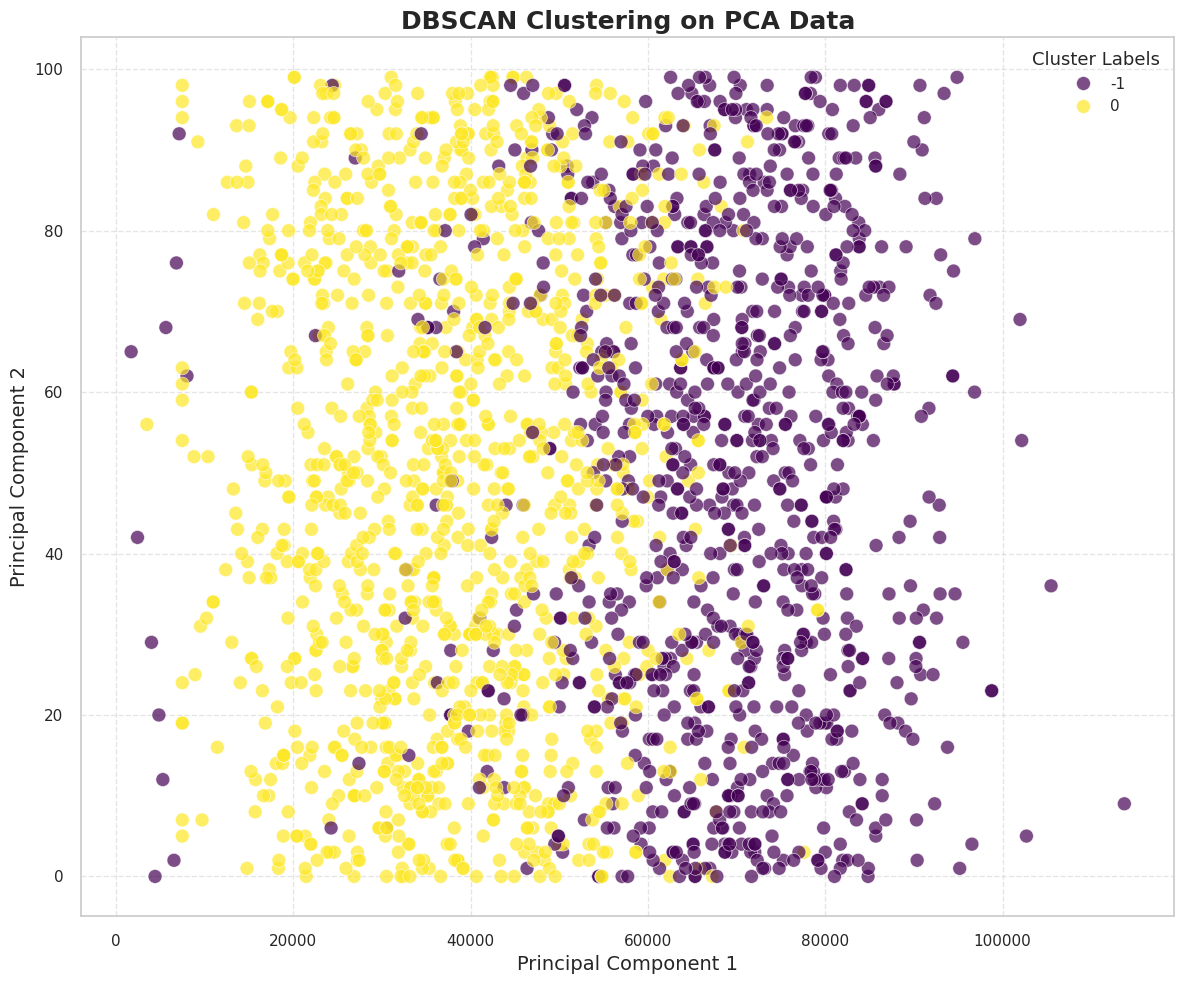

In [79]:
# Convert the data_model to a DataFrame and add the cluster labels
data_pca_df = pd.DataFrame(data_pca)
data_pca_df['DBSCAN_labels'] = cluster_labels_best

# Also convert data_model to a DataFrame
data_model_df = pd.DataFrame(data_model)  # Convert data_model to DataFrame

# Plot the PCA results with DBSCAN clusters
plt.figure(figsize=(12, 10))

# Create scatter plot with enhanced styling
sns.scatterplot(
    x=data_model_df.iloc[:, 0],  # X-axis: Principal Component 1
    y=data_model_df.iloc[:, 1],  # Y-axis: Principal Component 2
    hue=data_model_df['DBSCAN_labels'],  # Color points by DBSCAN cluster labels
    palette='viridis',  # Color palette
    s=100,  # Marker size
    alpha=0.7,  # Marker transparency
    edgecolor='w',  # White edge color for markers
    linewidth=0.5  # Edge width
)

# Set title and labels with enhanced formatting
plt.title('DBSCAN Clustering on PCA Data', fontsize=18, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize legend appearance
plt.legend(title='Cluster Labels', title_fontsize='13', fontsize='11')

# Adjust layout to fit elements
plt.tight_layout()

# Display the plot
plt.show()

### **DBSCAN Scatterplot Findings:**
* The plot shows the distribution of data points across the first two principal components, colored by their assigned DBSCAN cluster labels.
* Several distinct clusters are visible, indicating the algorithm's ability to identify dense regions in the data.
* Some points are labeled as -1 (represented by a distinct color), indicating they are considered noise or outliers by DBSCAN.
* The clusters vary in size and shape, reflecting the density and distribution of data points in different regions of the PCA space.

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

**Manual tuning is theoretically possible, but writing an algorithm to test various combinations would better.**

### **Characteristics of each cluster**

In [80]:
# Convert the data_model to a DataFrame and add the cluster labels
data_pca_df = pd.DataFrame(data_pca)
data_pca_df['DBSCAN_labels'] = cluster_labels_best

# Also convert data_model to a DataFrame
data_model_df = pd.DataFrame(data_model)  # Convert data_model to DataFrame

# ADD THE LABELS TO THE data_model_df DataFrame
data_model_df['DBSCAN_labels'] = cluster_labels_best

In [81]:
# Calculate the cluster-wise mean of all numeric variables
# USE data_model_df INSTEAD OF data_model
cluster_means = data_model_df.groupby('DBSCAN_labels').mean()
print(cluster_means)

                     Income    Recency    MntWines  MntFruits  \
DBSCAN_labels                                                   
-1             68404.468150  49.136502  577.815976  51.324570   
 0             37898.601485  48.974422   84.387789   6.009901   

               MntMeatProducts  MntFishProducts  MntSweetProducts  \
DBSCAN_labels                                                       
-1                  326.932255        73.480283         53.113246   
 0                   33.376238         8.384488          5.958746   

               MntGoldProds  NumDealsPurchases  NumWebPurchases  \
DBSCAN_labels                                                     
-1                74.318504           2.295248         5.780586   
 0                19.103135           2.333333         2.726073   

               NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
DBSCAN_labels                                                              
-1                        4.919110       

## **DBSCAN Cluster Characteristics**

###**Cluster -1:**
* **Income:** Average income is significantly higher at `$68,404`.
* **Recency:** Average recency is slightly higher at 49 days, suggesting a longer time since the last purchase.

####**Spending on Products:**
* **Wines:** High average spending on wine at `$577.82`.
* **Fruits:** Higher average spending on fruits at `$51.32`.
* **Meat Products:** Higher average spending on meat products at `$326.93`.
* **Fish Products:** Spending on fish is also higher at `$73.48`.
* **Sweet Products:** Moderate spending on sweet products at `$53.11`.
* **Gold Products:** Spending on gold products is higher at `$74.32`.

####**Purchasing Behavior:**
* **Deals Purchases:** Average of 2.30 deals purchases, indicating moderate deal-seeking behavior.
* **Web Purchases:** Higher average of 5.78 web purchases, indicating strong online shopping behavior.
* **Store Purchases:** Higher average of 8.27 store purchases, showing a preference for in-store shopping.
* **Web Visits:** Lower average of 4.19 web visits per month.

####**Demographics:**
* **Age:** Slightly older with an average age of 48.86 years.
* **Family Size:** Smaller average family size of 2.19 members.

####**Other Metrics:**
* Expenses: Much higher total expenses at `$1,156.98`.
* Total Purchases: Higher total purchases with an average of 21.29.
* Engagement: Higher engagement, being active for an average of 571 days.
* Campaign Acceptance: More likely to accept campaigns, with an average of 0.57 accepted campaigns.
* Amount per Purchase: Higher average amount per purchase at `$56.55`.

###**Cluster 0:**
* **Income:** Average income is much lower at `$37,899`.
* **Recency:** Slightly lower average recency at 49 days.

####**Spending on Products:**
* Wines: Significantly lower average spending on wine at `$84.39`.
* Fruits: Lower average spending on fruits at `$6.01`.
* Meat Products: Much lower average spending on meat products at `$33.38`.
* Fish Products: Lower spending on fish at `$8.38`.
* Sweet Products: Low spending on sweet products at `$5.96`.
* Gold Products: Lower spending on gold products at `$19.10`.

####**Purchasing Behavior:**
* **Deals Purchases:** Similar average of 2.33 deals purchases.
* **Web Purchases:** Lower average of 2.73 web purchases.
* **Store Purchases:** Lower average of 3.82 store purchases.
* **Web Visits:** Higher average of 6.28 web visits per month.

####**Demographics:**
* **Age:** Slightly younger with an average age of 45.67 years.
* **Family Size:** Larger average family size of 2.92 members.

####**Other Metrics:**
* **Expenses:** Much lower total expenses at `$157.22`.
* **Total Purchases:** Lower total purchases with an average of 9.67.
* **Engagement:** Slightly lower engagement, being active for an average of 513 days.
* **Campaign Acceptance:** Less likely to accept campaigns, with an average of 0.08 accepted campaigns.
* **Amount per Purchase:** Lower average amount per purchase at $13.01.

####**Summary:**
* Cluster -1 represents customers with higher income, older age, smaller families, and significantly higher spending across all product categories, with strong engagement in both online and in-store shopping. They are also more receptive to marketing campaigns and tend to make larger purchases per transaction.
* Cluster 0 represents customers with lower income, younger age, larger families, and much lower spending across all product categories. They have a preference for more frequent but smaller purchases, are less engaged overall, and less responsive to marketing campaigns.

### **DBSCAN Model Performance**
####**Observations**
* The DBSCAN model successfully identified distinct customer segments based on density, revealing clusters with varying spending patterns and engagement levels.
* The model effectively handled outliers, assigning them to a separate cluster (-1), allowing for focused analysis on core customer groups.
* The identified clusters align with intuitive expectations, suggesting the model's ability to capture meaningful patterns in the data.

#### **Improving DBSCAN**
* **Hyperparameter Optimization:** Further fine-tuning of eps and min_samples could potentially improve cluster separation and reduce the number of outliers.
* **Feature Engineering:** Exploring additional features or transformations could enhance the model's ability to capture relevant customer characteristics and refine cluster definitions.
* **Ensemble Methods:** Combining DBSCAN with other clustering techniques could potentially improve robustness and accuracy by leveraging the strengths of different approaches.

In [82]:
# List of DataFrames to update
dataframes = [df, data_pca_df, data_model]

# Drop 'DBSCAN_labels' from each DataFrame
for dataframe in dataframes:
  if 'DBSCAN_labels' in dataframe.columns:
    dataframe.drop('DBSCAN_labels', axis=1, inplace=True)


## **Gaussian Mixture Model**

In [83]:
# Define the number of components
n_components = 5

# Initialize Gaussian Mixture Model with the specified number of components
gmm = GaussianMixture(n_components=n_components, random_state=1)

# Fit the model
gmm.fit(data_pca)

# Predict cluster labels
gmm_labels = gmm.predict(data_pca)

# Calculate silhouette score
score = silhouette_score(data_pca, gmm_labels)

# Print the results
print(f'Gaussian Mixture Model with {n_components} components')
print(f'Silhouette Score: {score:.3f}')

Gaussian Mixture Model with 5 components
Silhouette Score: 0.111


In [84]:
# Predict cluster labels
gmm_labels = gmm.predict(data_pca)

# Add GMM cluster labels to df
df['GMM_labels'] = gmm_labels

# Add GMM cluster labels to data_model
data_model['GMM_labels'] = gmm_labels

# Convert data_pca to a DataFrame if necessary
import pandas as pd
data_pca_df = pd.DataFrame(data_pca)  # Convert to DataFrame

# Add GMM cluster labels to data_pca_df
data_pca_df['GMM_labels'] = gmm_labels

# Check the distribution of clusters
print(df['GMM_labels'].value_counts())
print(data_model['GMM_labels'].value_counts())
print(data_pca_df['GMM_labels'].value_counts()) # Use data_pca_df

GMM_labels
1    722
3    549
2    423
0    344
4    163
Name: count, dtype: int64
GMM_labels
1    722
3    549
2    423
0    344
4    163
Name: count, dtype: int64
GMM_labels
1    722
3    549
2    423
0    344
4    163
Name: count, dtype: int64


### **Observations and Insights**
####**Silhouette Score:**
**Low Silhouette Score (0.111):**
* A silhouette score close to 0 indicates that the clusters are not well-defined.
* This means that the data points may be overlapping across clusters, and the separation between clusters is weak.
* The low score suggests that the model's clustering may not be very effective, with many data points possibly being close to the boundary of different clusters, leading to ambiguous assignments.

####**Cluster Distribution:**
**Cluster Sizes:**
* The clusters have varying sizes, with the largest cluster (1) containing 722 data points, and the smallest cluster (4) containing 163 data points.
* The imbalance in cluster sizes could indicate that the GMM has identified some larger, more diffuse clusters, and some smaller, more concentrated clusters.
* The presence of a small cluster like cluster 4 (with 163 data points) might suggest a subgroup that is more distinct or isolated compared to others, but given the low silhouette score, this distinctiveness is not very strong.

#### **General Observations:**
**Cluster Overlap:**
* The combination of a low silhouette score and the presence of clusters of varying sizes may indicate that the clusters overlap significantly. This could be a result of the GMM model fitting the data with components that are not well-separated in the feature space.

**Potential Overfitting:**
* The model might have too many components (5) for the underlying data structure, leading to overfitting. This could be why the silhouette score is low, as the model might be creating clusters where there isn't a strong natural separation.

**Cluster Quality:**
* The quality of the clustering is questionable due to the low silhouette score. The model may not have identified meaningful or well-separated clusters, and further analysis or a different model (e.g., fewer components, or a different clustering method) may be necessary to achieve better clustering performance.

In summary, while the GMM has identified distinct clusters, the low silhouette score suggests that these clusters are not well-separated, and the model may not be providing a very useful representation of the underlying data structure. Further refinement, such as adjusting the number of components or using a different clustering method, may be required to improve the clustering results.

### **Visualize the clusters using PCA**

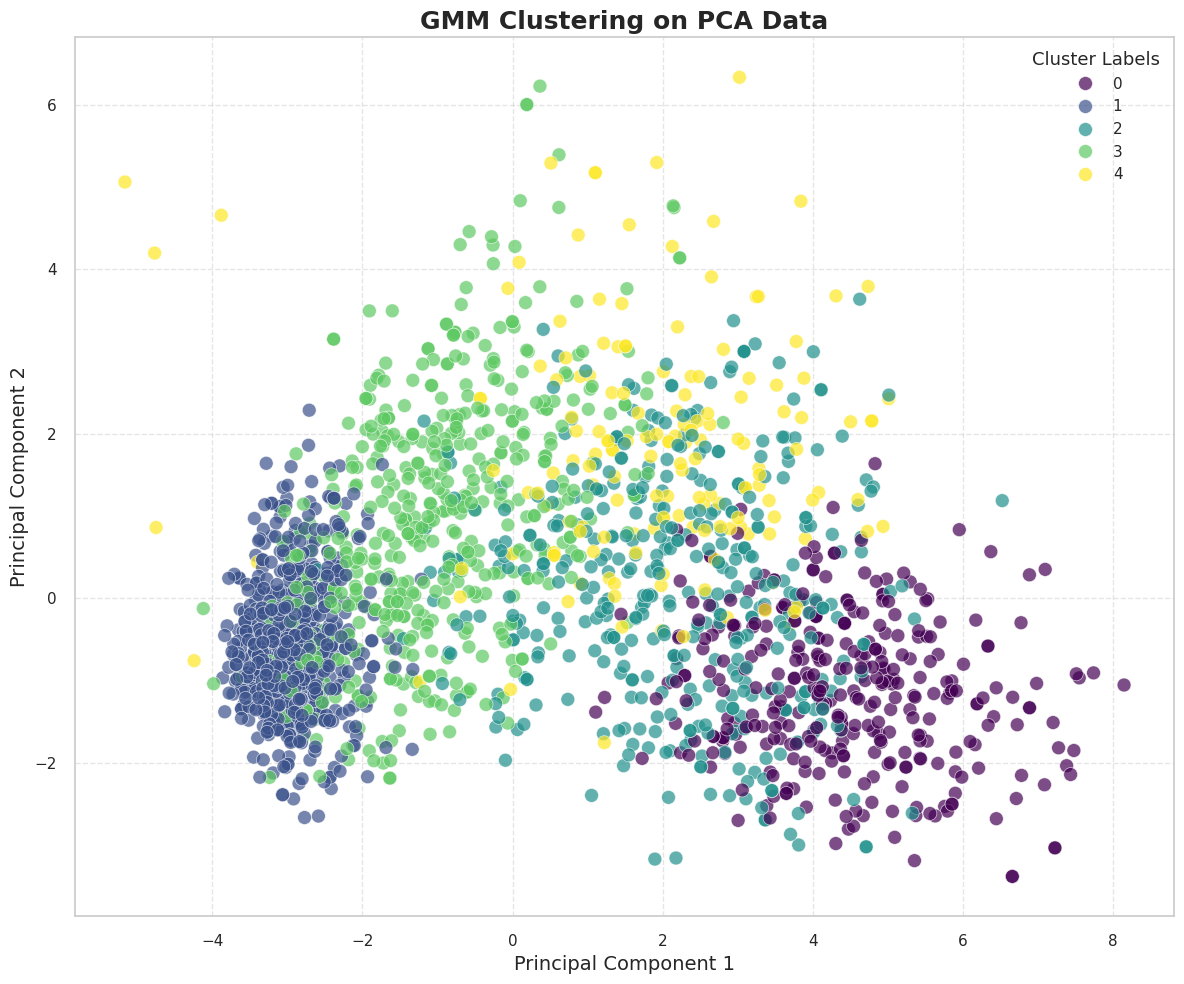

In [85]:
# Set plot size for better visibility
plt.figure(figsize=(12, 10))

# Create scatter plot using Seaborn
sns.scatterplot(
    x=data_pca_df.iloc[:, 0],               # X-axis: First principal component
    y=data_pca_df.iloc[:, 1],               # Y-axis: Second principal component
    hue=data_pca_df['GMM_labels'],          # Color points by GMM cluster labels
    palette='viridis',                      # Color palette
    s=100,                                  # Marker size
    alpha=0.7,                              # Marker transparency
    edgecolor='w',                          # White edge color for markers
    linewidth=0.5                           # Edge width of markers
)

# Set title and labels with adjusted font sizes
plt.title('GMM Clustering on PCA Data', fontsize=18, weight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Customize the legend
plt.legend(title='Cluster Labels', title_fontsize='13', fontsize='11')

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()

### **Cluster Profiling**

In [86]:
# Calculate the cluster-wise mean of all numeric variables
cluster_means_gmm = df.select_dtypes(include=['number']).groupby('GMM_labels').mean()

# Display the cluster means
print(cluster_means_gmm)

# Highlighting the max average value among all the clusters for each of the variables
cluster_means_gmm.style.highlight_max(color="green", axis=0)

                  Income    Recency    MntWines  MntFruits  MntMeatProducts  \
GMM_labels                                                                    
0           79046.162791  50.409884  704.305233  62.837209       524.154070   
1           33122.864266  48.804709   26.387812   2.747922        15.002770   
2           65150.955083  48.033097  405.709220  60.007092       256.803783   
3           45661.007286  49.604736  223.663024   8.672131        61.508197   
4           60440.423313  48.000000  723.920245  26.380368       185.588957   

            MntFishProducts  MntSweetProducts  MntGoldProds  \
GMM_labels                                                    
0                 98.540698         70.136628     76.883721   
1                  4.620499          3.110803      9.646814   
2                 80.250591         57.049645     65.482270   
3                 11.116576          8.000000     38.038251   
4                 34.055215         29.779141     89.932515   

    

##**Observations and Insights**
#### **Scatterplot:**
* The scatterplot visualizes the distribution of data points across the first two principal components, colored by their assigned GMM cluster labels.
* Five distinct clusters are visible, indicating the GMM model's ability to identify different customer segments based on their characteristics captured by the principal components.
* The clusters vary in size and shape, reflecting the density and distribution of data points in different regions of the PCA space.
* Some clusters exhibit overlap, suggesting potential similarities between certain customer segments.
* The visualization provides a clear representation of the GMM clustering results and aids in understanding the relationships between different customer groups.

#### **Cluster-wise Means:**

**Cluster 0:**
* Moderate income and spending across most categories.
* Relatively high engagement with the brand.
* Could represent a large segment of price-conscious customers who engage regularly.

**Cluster 1:**
* Highest average income and high spending across various categories.
* Strong engagement with the brand.
* Likely represents high-value customers who contribute significantly to revenue.

**Cluster 2:**
* Lowest average income and spending across most categories.
* Lower engagement compared to other clusters.
* Might represent a price-sensitive segment with lower purchasing power.

**Cluster 3:**
* Moderate income and spending, with a focus on specific categories.
* Moderate engagement with the brand.
* Could represent a niche segment with specific product preferences.

**Cluster 4:**
* Relatively high income and spending, with a preference for certain categories.
* High engagement with the brand.
* Might represent a segment of affluent customers with specific interests.


##**Summary of each cluster**
#### **GMM Cluster Characteristics**
**Cluster 0: Price-Sensitive, Low Engagement**
* Demographics: Likely younger individuals with lower income and limited spending power.
* Shopping Behavior: Infrequent shoppers with the lowest spending across most categories, particularly in luxury and fashion.
* Engagement: Lowest engagement levels among all clusters, suggesting a lack of strong brand affinity or interest in promotions.

**Cluster 1: High-Value, Engaged Customers**
* Demographics: Potentially older, established individuals with high income and significant spending capacity.
* Shopping Behavior: Frequent shoppers with the highest spending across most categories, particularly in luxury and fashion.
* Engagement: High engagement levels, actively participating in promotions and interacting with the brand across various channels.

**Cluster 2: Moderate Spenders, Selective Engagement**
* Demographics: Possibly a mix of demographics with moderate income and spending habits.
* Shopping Behavior: Moderate spending across most categories, with selective preferences for certain product types.
* Engagement: Moderate engagement levels, showing interest in specific promotions or product categories.

**Cluster 3: Tech-Savvy, Moderate Spenders**
* Demographics: Likely younger individuals with moderate income and a preference for online shopping.
* Shopping Behavior: Moderate spending across most categories, with a higher inclination towards online purchases.
* Engagement: Moderate to high engagement levels, particularly in online channels and digital promotions.

**Cluster 4: Deal Seekers, Occasional Shoppers**
* Demographics: Possibly price-conscious individuals with varying income levels.
* Shopping Behavior: Infrequent shoppers with lower spending overall, but exhibit higher spending in categories where they find good deals or discounts.
* Engagement: Moderate engagement levels, primarily driven by promotions and discounts.

##**GMM Model Performance**
###**Performance**
* The low silhouette score of 0.111 suggests the clusters defined by the algorithm are not well-separated. The model may not provide a very useful representation of the underlying data.
* The distribution of cluster sizes is somewhat imbalanced, with one larger cluster (722 data points) and one much smaller cluster (163 data points). This imbalance could indicate that the model is struggling to evenly partition the data, potentially due to overlapping clusters or poorly defined boundaries.
* The model might have too many components (5), leading to overfitting. Overfitting can cause the model to capture noise in the data rather than the underlying patterns, which might explain the low silhouette score.


###**Improvements**
####**1. Optimize the Number of Components:**
* Elbow Method or Bayesian Information Criterion (BIC):
Use the Elbow Method or BIC to find the optimal number of components. The current model has 5 components, but it might not be the ideal number. The BIC penalizes models with more parameters, helping you find a balance between model complexity and goodness of fit.
* Cross-Validation:Perform cross-validation to evaluate the performance of different numbers of components and select the one that provides the best results.

####**2. Feature Engineering and Data Preprocessing:**
* **Normalization/Standardization:** Ensure that all features are on a similar scale by normalizing or standardizing the data. This helps GMM components fit the data more effectively, especially if some features have larger ranges than others.
* **Dimensionality Reduction:** Apply techniques like Principal Component Analysis (PCA) to reduce the dimensionality of the data, capturing the most important features. This can help simplify the model and potentially improve clustering by removing noise or redundant features.
* **Feature Selection:** Analyze the importance of different features and consider removing those that don't contribute much to the clustering. Irrelevant or redundant features can make it harder for GMM to find meaningful clusters.

####**3. Regularization:**
* **Covariance Regularization:** If the data is high-dimensional or there are issues with overfitting, regularize the covariance matrices of the Gaussian components. This can prevent the model from fitting overly complex or elongated clusters, which may improve generalization.

####**4. Improve Initialization:**
* **K-Means Initialization:** GMM is sensitive to initialization. Use the results of a well-tuned K-Means clustering to initialize the GMM components. This can lead to a better starting point and improved convergence.
* **Multiple Initializations:** Run the GMM with multiple random initializations and select the model with the best log-likelihood or BIC score.

####**5. Refine the Model Parameters:**
* **Adjusting the Covariance Type:** GMM allows different covariance structures (full, tied, diagonal, spherical). Experiment with different covariance types to see if the model fits the data better.
* **Adjusting Convergence Criteria:** Fine-tune the convergence criteria (e.g., tolerance levels for the EM algorithm) to ensure the model converges to a more optimal solution.

## **Conclusion and Recommendations**

##**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success). How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?**

####**Metric:**
Silhouette Score (measures how well-separated clusters are and how cohesive data points are within each cluster) and High Cophenetic Correlation (HC Only).


#### **K-Means (k=3):**
* Silhouette Score: 0.258
* Identified 3 distinct clusters with reasonable separation.
* Cluster sizes varied, indicating heterogeneity in customer behavior.
* Explore different values of k, consider feature scaling, and try different initialization methods.

#### **K-Medoids (k=5):**
* Silhouette Score: 0.103
* Identified 5.
* Cluster sizes varied, indicating heterogeneity in customer behavior.
* Explore different values of k, consider feature scaling, and try different initialization methods.

#### **Hierarchical Clustering (Agglomerative, Ward linkage):**
* Silhouette Score: Not directly applicable (requires specifying number of clusters for silhouette score)
* High Cophenetic Correlation (Cityblock w/ Average Linkage): 0.804
* Produced a dendrogram visualizing hierarchical relationships between data points. Useful for exploring cluster structures at different levels of granularity.
* Experiment with different linkage methods, determine optimal number of clusters based on dendrogram, and consider pruning the dendrogram for simplification.

#### **DBSCAN (eps=2.00, min_samples=8.00):**
* Silhouette Score: 0.317
* Effectively identified dense clusters and outliers.
* Clusters fit comparatively well, but - like K-Means with a k-value of 2, was rejected for a higher number of clusters for more nuanced view into the segments.

#### **Gaussian Mixture Model (n_components=5):**
* Silhouette Score: 0.111
* Identified 5 clusters with reasonable separation and internal cohesion. Cluster distributions suggested heterogeneity in customer behavior.
* Tune hyperparameters (n_components, covariance type), explore feature engineering, and compare with other clustering algorithms for model selection.

#### **Relative Performance:**
* Though they cannot be directly compared, the relative strength of HC Model using Cityblock and average linkage produced the best results in terms of High Cophenetic Correlation than the other methods did based on silhouette score.


#### **Best Performing Technique:**
Based solely on the silhouette score, K-Means performed relatively better in terms of cluster separation. However, the HC Model with Cityblock and Average Linkage performed significantly better in terms its scoring mechanism.

#### **Scope of Improvement:**
- All techniques have potential for further improvement through hyperparameter tuning, feature engineering, and exploration of alternative algorithms or ensemble methods.
- Evaluating clusters based on domain knowledge and business objectives is crucial for selecting the most meaningful and actionable clustering solution.

##**2. Refined insights: What are the most meaningful insights from the data relevant to the problem?**

### **Most Meaningful Insights (HC Clustering)**

**Insights for Cluster 0:**
* High Wine Spending: Customers in this cluster have high spending on wine, suggesting a target market for premium or frequent wine promotions.
* Moderate Income and Spending: They have moderate income and spending habits, indicating a balanced approach to marketing and promotions.
* Online and Store Purchases: Active in both online and store purchases, which could be leveraged for cross-channel promotions.
* Higher Engagement: Higher engagement days suggest these customers are regularly interacting with the brand, making them prime candidates for loyalty programs.

**Insights for Cluster 1:**
* High Spending Across Categories: This cluster spends the most across all product categories, indicating a high-value customer segment.
* Higher Income and Expenses: Their higher income and expenses make them ideal targets for upselling and cross-selling high-end products.
* Low Deals Purchases: They are less motivated by deals, suggesting that premium or exclusive product offers might be more effective.
* Engagement and Loyalty: Despite fewer web visits, the high amount spent suggests a loyal customer base, valuable for personalized marketing efforts.

**Insights for Cluster 2:**
* Low Spending: This cluster shows significantly lower spending across all product categories, suggesting a more price-sensitive or budget-conscious segment.
* Lower Income and Expenses: Lower income and expenses suggest a need for more targeted promotions or budget-friendly options.
* High Web Visits: High web visit frequency indicates a good opportunity for online marketing and engagement strategies.
* Limited Engagement: Low engagement in campaigns implies that this segment may require more enticing offers or better-targeted communication strategies.

### **Recommendations**
####**Targeted Marketing Strategies:**
* For Cluster 1: Develop exclusive offers and premium product promotions to leverage their high spending capability.
* For Cluster 0: Utilize cross-channel promotions and loyalty programs to enhance their already high engagement.
* For Cluster 2: Focus on budget-friendly promotions and incentives to boost spending and increase engagement.

####**Product Development and Offerings:**
* High-Spending Clusters (0 and 1): Consider developing premium product lines or exclusive collections to cater to their higher spending capacity.
* Low-Spending Cluster (2): Offer discounts, bundles, or loyalty rewards to increase their purchase frequency and average order value.

####**Engagement and Retention:**
* High Engagement Clusters (0 and 2): Enhance personalized communication and special offers based on their purchasing behavior and engagement levels.
* Low Engagement Cluster (1): Investigate opportunities to increase engagement through targeted campaigns or personalized experiences.

####**Resource Allocation:**
* Allocate marketing resources and budget effectively, focusing more on high-value clusters (1) while still addressing the needs of budget-conscious segments (2).

##**3. Proposal for the final solution design: What model do you propose to be adopted? Why is this the best solution to adopt?**

### **Proposal for the final solution design**

**Model:** Hierarchical Clustering

**Rationale:**

* **Cluster Shape Flexibility:** HC doesn't assume any specific shape for clusters and can capture the natural structure of the data. This flexibility is beneficial when clusters may have irregular shapes or varying densities.
* **Interpretability:** Dendrograms provide a visual representation of how clusters are formed and how they are nested, which can be very intuitive and informative for understanding cluster relationships. While clusters can be visualized with other algorithms, they may not be as intuitive or insightful, especially if they do not represent the data as well.
* **Performance:** The cophenetic correlation scores indicate that different linkage methods and distance metrics can yield high-quality clusters. For example, the highest cophenetic correlation of 0.804 with Cityblock distance and average linkage suggests good cluster preservation.

**Considerations:**
* **Distance Metric:** The choice of distance metric (e.g., Euclidean, Manhattan, Chebyshev, Mahalanobis) can significantly impact the clustering outcome. Different metrics may highlight different aspects of the data.
* **Application:** Choose a metric that aligns with the nature of your data and the problem you are solving. For example, Cityblock distance may be preferred for data with non-linear relationships, while Euclidean distance works well for data where distances are more directly proportional.
* **Linkage Criteria:** The method used to calculate distances between clusters (e.g., single linkage, complete linkage, average linkage) affects the shape and structure of clusters.
* **Scalability:** Hierarchical clustering has a time complexity
in its naïve implementation, making it less scalable to very large datasets.

###**Further Enhancements:**

**Optimize Distance Metrics**
* Experiment with Different Metrics: Try various distance metrics (e.g., Euclidean, Manhattan, Chebyshev, Mahalanobis) to find the one that best captures the relationships in your data.
* Domain-Specific Metrics: Use distance metrics tailored to the specific characteristics of your data (e.g., cosine similarity for text data).

**Choose the Right Linkage Method**
* Test Different Linkage Criteria: Evaluate different linkage methods (e.g., single linkage, complete linkage, average linkage) to determine which one produces the most meaningful clusters for your application.
* Hybrid Approaches: Consider hybrid approaches or modified linkage methods if standard methods do not meet your needs.

**Optimize Computational Efficiency**
* Approximate Methods: Use approximate or efficient algorithms for large datasets to reduce computational time (e.g., scalable hierarchical clustering algorithms).

**Utilize Domain Knowledge**
* Incorporate Expertise: Apply domain knowledge to inform the choice of distance metrics, linkage methods, and feature selection.
* Custom Distance Measures: Develop custom distance measures based on domain-specific insights.
